In [1]:
df = pd.read_csv('application_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# @title
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
from scipy.stats import gaussian_kde
warnings.filterwarnings("ignore")
df = pd.read_csv('application_train.csv')


In [3]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
# @title
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
# @title
df.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

In [6]:
# @title
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

## ⚙ Special "Gear Box"

In [7]:
# @title
# ------------------------------------------------------
# Pre-Config
# ------------------------------------------------------

# Remove rows where 'CODE_GENDER' equals 'XNA'
df = df[df['CODE_GENDER'] != 'XNA']

# Verify the change
df['CODE_GENDER'].unique()

# Fill missing values in 'OCCUPATION_TYPE' with "N/A"
df["OCCUPATION_TYPE"].fillna("N/A", inplace=True)

# Check the number of missing values after filling
missing_after_fill = df["OCCUPATION_TYPE"].isna().sum()
missing_after_fill

np.int64(0)

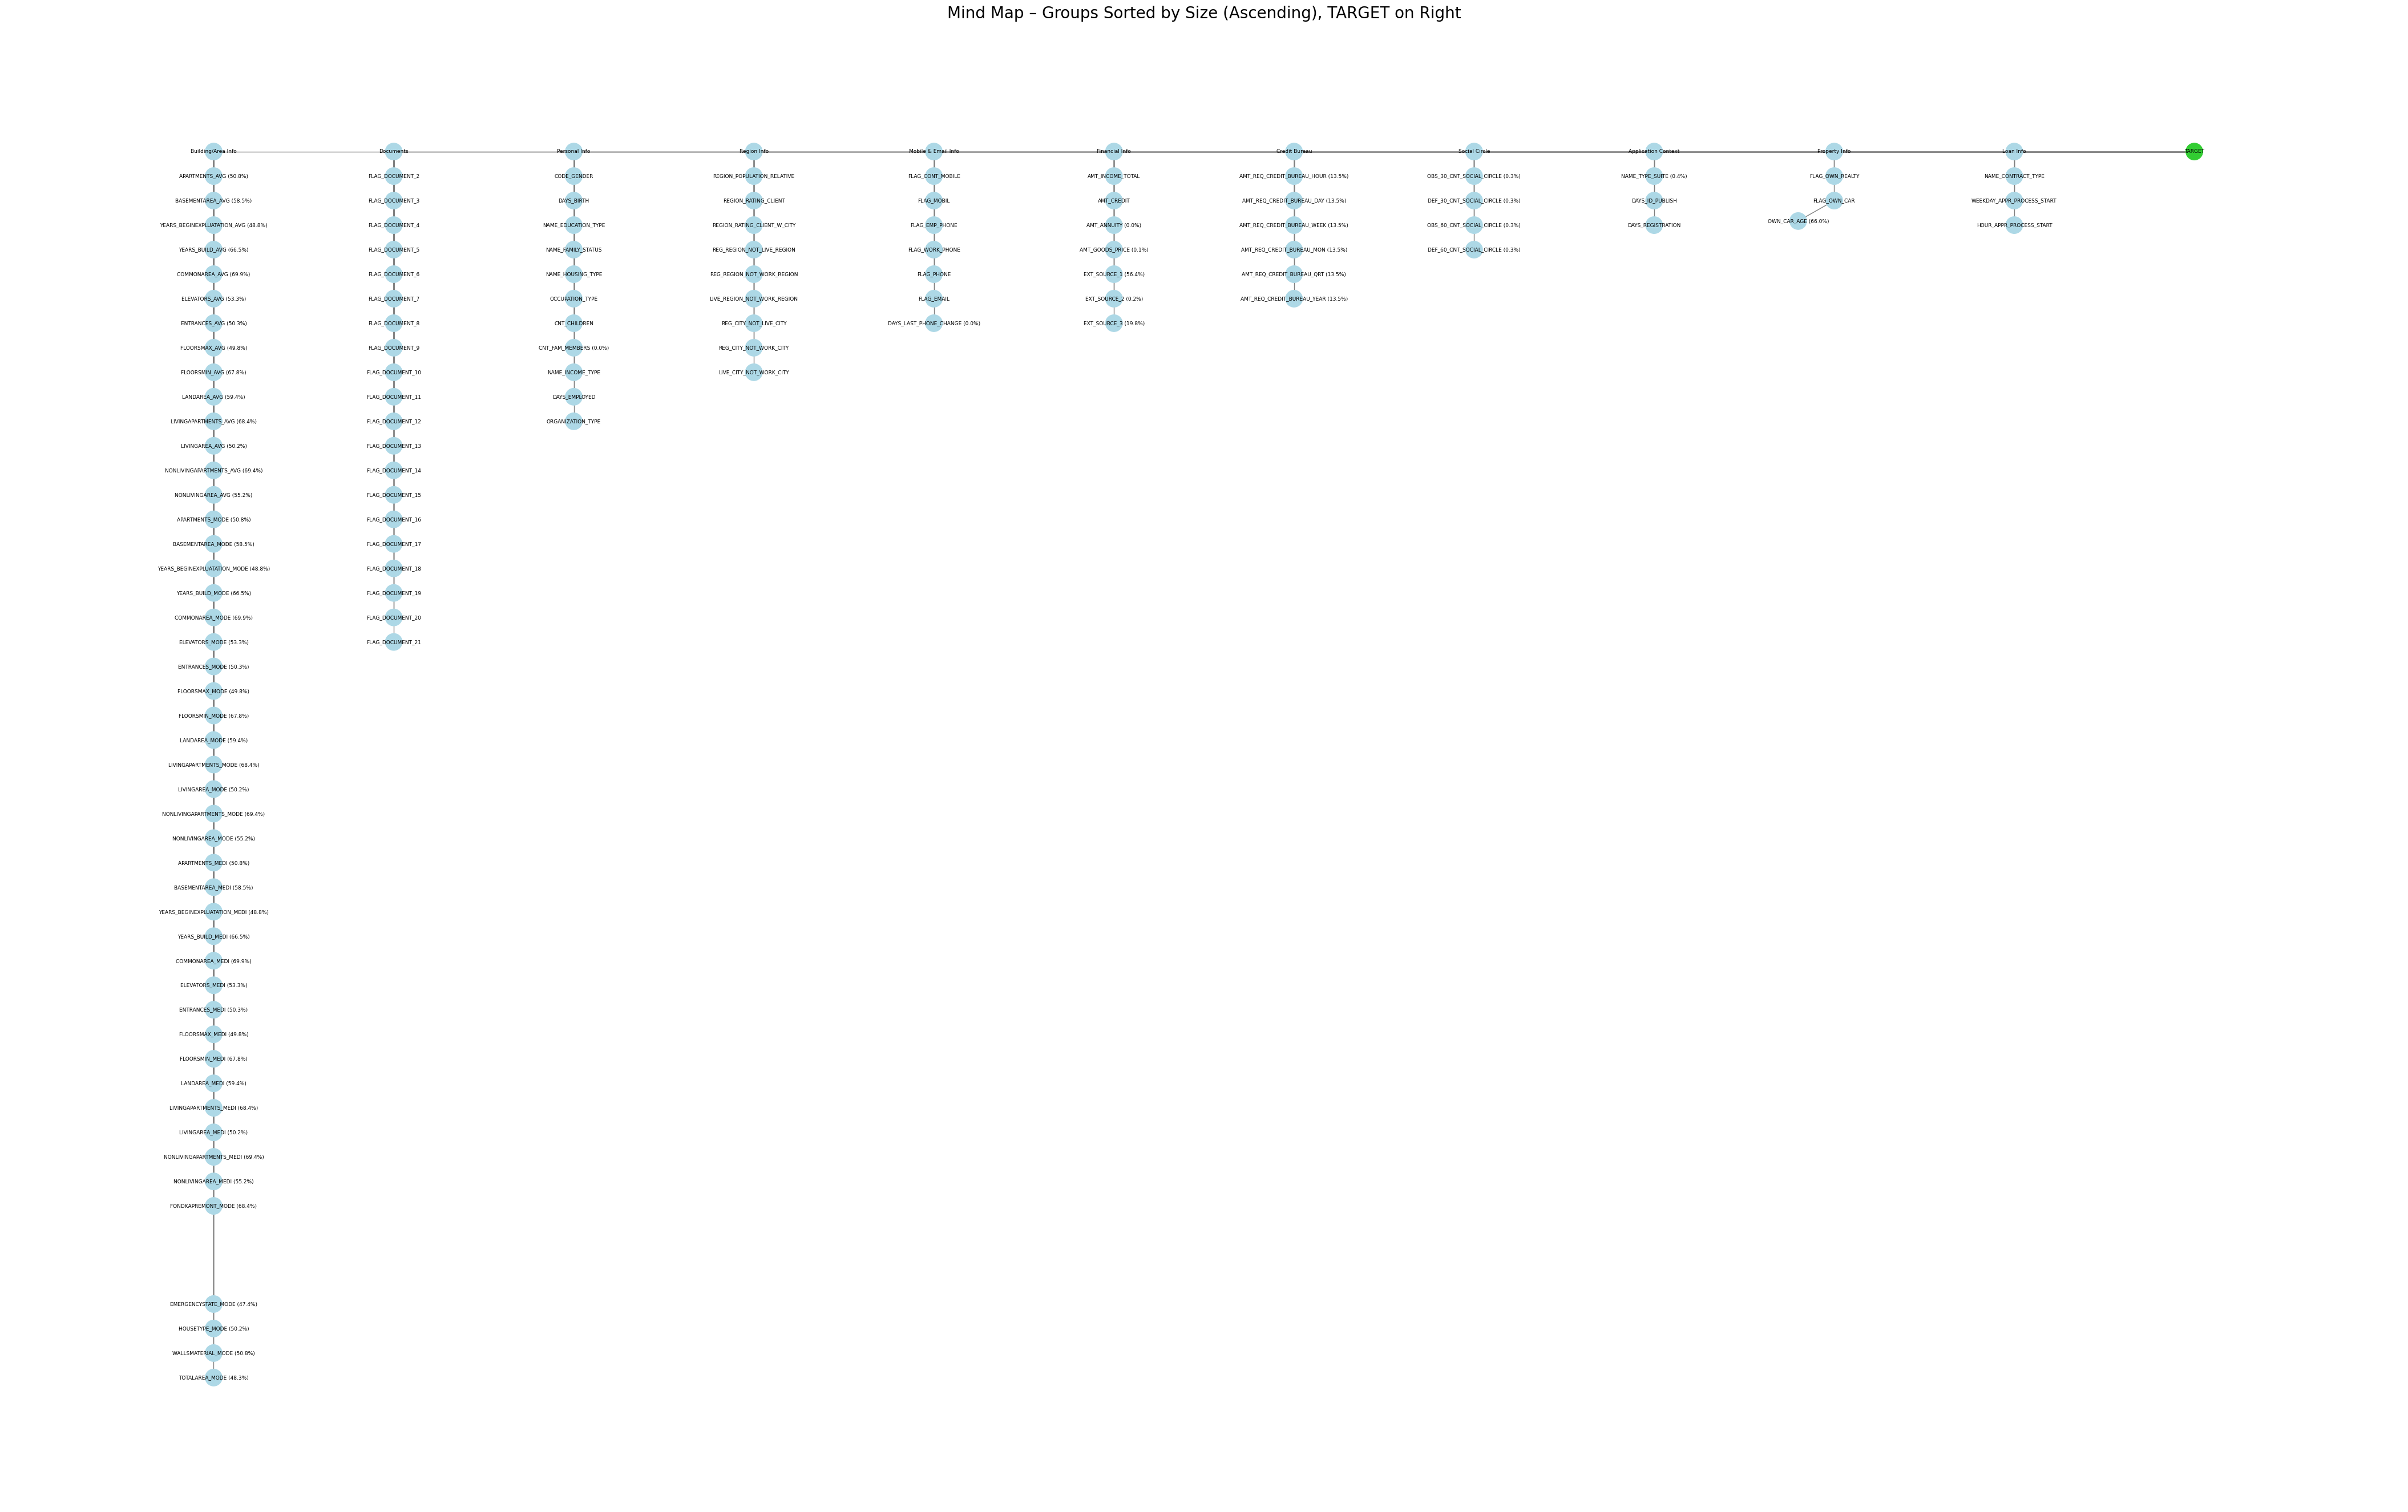

In [8]:
# @title
# ------------------------------------------------------
# 🎯 Mind Map – Full Version
# ------------------------------------------------------


# Calculate missing‑value percentage for each column
missing_percent = df.isnull().mean() * 100

# 3. Define column groups
groups = {
    "Personal Info": [
        "CODE_GENDER", "DAYS_BIRTH", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
        "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "CNT_CHILDREN", "CNT_FAM_MEMBERS",
        "NAME_INCOME_TYPE", "DAYS_EMPLOYED", "ORGANIZATION_TYPE"
    ],
    "Financial Info": [
        "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
        "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"
    ],
    "Loan Info": [
        "NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"
    ],
    "Property Info": [
        "FLAG_OWN_REALTY", "FLAG_OWN_CAR", "OWN_CAR_AGE"
    ],
    "Building/Area Info": [
        *[col for col in df.columns if any(x in col for x in ["AVG", "MODE", "MEDI"])],
        "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "TOTALAREA_MODE"
    ],
    "Region Info": [
        "REGION_POPULATION_RELATIVE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
        "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"
    ],
    "Credit Bureau": [
        "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
        "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"
    ],
    "Documents": [col for col in df.columns if col.startswith("FLAG_DOCUMENT_")],
    "Social Circle": [
        "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
        "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"
    ],
    "Application Context": ["NAME_TYPE_SUITE", "DAYS_ID_PUBLISH", "DAYS_REGISTRATION"],
    "Mobile & Email Info": [
        "FLAG_CONT_MOBILE", "FLAG_MOBIL", "FLAG_EMP_PHONE",
        "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "DAYS_LAST_PHONE_CHANGE"
    ]
}

# 4. Sort groups by ascending number of variables
sorted_groups = sorted(groups.items(), key=lambda item: len(item[1]))

# 5. Build graph: TARGET on the right, groups laid out from right to left
G = nx.Graph()
G.add_node("TARGET")
pos = {"TARGET": (0, 0)}
x_gap = 10
y_gap = 0.6

for i, (group_name, cols) in enumerate(sorted_groups):
    x = -(i + 1) * x_gap
    y = 0
    pos[group_name] = (x, y)
    G.add_node(group_name)
    G.add_edge("TARGET", group_name)

    y_base = y
    for j, col in enumerate(cols):
        if group_name == "Property Info" and col == "OWN_CAR_AGE":
            continue

        miss_pct = missing_percent.get(col, 0)
        label = f"{col} ({miss_pct:.1f}%)" if miss_pct > 0 else col
        y_offset = y_base - (j + 1) * y_gap
        pos[label] = (x, y_offset)
        G.add_node(label)
        G.add_edge(group_name, label)

        # If FLAG_OWN_CAR, attach child node OWN_CAR_AGE
        if group_name == "Property Info" and col == "FLAG_OWN_CAR":
            sub_col = "OWN_CAR_AGE"
            miss_pct = missing_percent.get(sub_col, 0)
            label_sub = f"{sub_col} ({miss_pct:.1f}%)" if miss_pct > 0 else sub_col
            pos[label_sub] = (x - 2, y_offset - 0.5)
            G.add_node(label_sub)
            G.add_edge(label, label_sub)

# 6. Draw the mind map
plt.figure(figsize=(42, 26))
node_colors = ["limegreen" if node == "TARGET" else "lightblue" for node in G.nodes]

nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_size=450,
    font_size=6.5,
    node_color=node_colors,
    edge_color='gray'
)
plt.title("Mind Map – Groups Sorted by Size (Ascending), TARGET on Right", fontsize=20)
plt.axis('off')
plt.show()


In [9]:
# @title
# ------------------------------------------------------
# Summary with icons
# ------------------------------------------------------

# Initialize variables to 0 or empty lists to avoid the NameError
mapped_count = 0
original_count = 0
unmapped_columns = []
extra_mapped_columns = []

# --- Calculate values for summary ---
# 1. Get all columns from the original dataframe
original_columns = df.columns.tolist()
original_count = len(original_columns)

# 2. Get all columns mapped in the mind map
mapped_columns = []
for group_name, cols in groups.items():
    mapped_columns.extend(cols)
mapped_count = len(mapped_columns) # add missing mapped_count and initialize to zero

# 3. Find unmapped and extra mapped columns
unmapped_columns = list(set(original_columns) - set(mapped_columns))
extra_mapped_columns = list(set(mapped_columns) - set(original_columns))


summary = {
    "🗺️  Mind‑map column count": mapped_count,
    "📊  Actual data column count": original_count,
    "❌  Columns not included in mind map": unmapped_columns,
    "⚠️  Extra columns present only in mind map": extra_mapped_columns,
}

for k, v in summary.items():
    print(f"{k}: {v}")

🗺️  Mind‑map column count: 123
📊  Actual data column count: 122
❌  Columns not included in mind map: ['TARGET', 'SK_ID_CURR']
⚠️  Extra columns present only in mind map: []


In [10]:
# @title
# ------------------------------------------------------
# feature_engineering – mark I
# ------------------------------------------------------
def plot_kde_box(
    df: pd.DataFrame,
    column: str,
    log_transform: bool = False,
    title_prefix: str | None = None,
    bw_adjust: float = 2,
    clip_max: float | None = None,
) -> None:

    # Prepare column name after optional log transform
    col = f"LOG_{column}" if log_transform else column
    temp_df = df[[column, "NAME_CONTRACT_TYPE"]].copy()

    # Apply log transform if requested
    temp_df[col] = np.log1p(temp_df[column]) if log_transform else temp_df[column]

    # Remove outliers if a clip_max is provided
    if clip_max is not None:
        temp_df = temp_df[temp_df[col] <= clip_max]

    # Split by contract type
    cash_vals = temp_df[temp_df["NAME_CONTRACT_TYPE"] == "Cash loans"][col]
    revolving_vals = temp_df[temp_df["NAME_CONTRACT_TYPE"] == "Revolving loans"][col]

    # Calculate medians
    cash_median = cash_vals.median()
    revolving_median = revolving_vals.median()

    # Colors
    contract_colors = {
        "Cash loans": "#2ca02c",      # green
        "Revolving loans": "#ff7f0e"  # orange
    }

    # Create figure
    plt.figure(figsize=(12, 12))

    # --- KDE plot ---
    plt.subplot(2, 1, 1)
    sns.kdeplot(
        cash_vals, label="Cash loans",
        linewidth=2, bw_adjust=bw_adjust,
        color=contract_colors["Cash loans"]
    )
    sns.kdeplot(
        revolving_vals, label="Revolving loans",
        linewidth=2, bw_adjust=bw_adjust,
        color=contract_colors["Revolving loans"]
    )
    plt.axvline(
        cash_median, color=contract_colors["Cash loans"],
        linestyle="--", linewidth=2, label="Median (Cash)"
    )
    plt.axvline(
        revolving_median, color=contract_colors["Revolving loans"],
        linestyle="--", linewidth=2, label="Median (Revolving)"
    )
    plt.title(f"KDE of {title_prefix or col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)

    # --- Boxplot ---
    plt.subplot(2, 1, 2)
    sns.boxplot(
        data=temp_df, x="NAME_CONTRACT_TYPE", y=col,
        palette=contract_colors
    )
    plt.title(f"Boxplot of {title_prefix or col} by Contract Type")
    plt.xlabel("Contract Type")
    plt.ylabel(col)
    plt.grid(True)

    plt.tight_layout()
    plt.show()



In [11]:
# @title
# ------------------------------------------------------
# feature_engineering  –  Mark 2
# ------------------------------------------------------

# ---------- ORGANIZATION_TYPE mapping -----------------
ORG_MAPPING = {
    "Enterprise": [
        "Business Entity Type 1", "Business Entity Type 2",
        "Business Entity Type 3", "Self-employed"
    ],
    "Government": ["Government", "Military", "Police", "Security Ministries"],
    "Education": ["School", "University", "Kindergarten"],
    "Healthcare": ["Medicine", "Emergency"],
    "Agriculture": ["Agriculture"],
    "Infrastructure": [
        "Electricity", "Housing", "Cleaning", "Construction", "Realtor",
        "Telecom", "Mobile", "Postal", "Security", "Services"
    ],
    "Hospitality": ["Restaurant", "Hotel"],
    "Finance & Premium Services": [
        "Bank", "Insurance", "Legal Services", "Advertising"
    ],
}
ORG_PREFIX = {
    "Industry":  "Industry",
    "Trade":     "Trade",
    "Transport": "Transport"
}

def map_organization_type(org: str) -> str:
    for grp, vals in ORG_MAPPING.items():
        if org in vals:
            return grp
    for prefix, grp in ORG_PREFIX.items():
        if org.startswith(prefix):
            return grp
    return "Other"

# ---------- Master feature‑engineering pipeline -------
def add_engineered_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Return a new DataFrame with all engineered categorical columns."""
    df = df.copy()

    # Employment years
    df["YEARS_EMPLOYED"] = -df["DAYS_EMPLOYED"] / 365
    df["EMPLOYED_YEAR_GROUP"] = pd.cut(
        df["YEARS_EMPLOYED"],
        bins=[0, 5, 10, 15, 20, np.inf],
        labels=["0-5 yrs", "5-10 yrs", "10-15 yrs", "15-20 yrs", ">20 yrs"]
    )

    # Loan term (months) & grouping
    df["LOAN_TERM_MONTHS"] = df["AMT_CREDIT"] / df["AMT_ANNUITY"]
    df["LOAN_TERM_GROUP"] = pd.cut(
        df["LOAN_TERM_MONTHS"],
        bins=[0, 12, 24, np.inf],
        labels=["0-12 months", "12-24 months", ">24 months"]
    )

    # Children & family size
    df["CNT_CHILDREN_GROUP"] = pd.cut(
        df["CNT_CHILDREN"],
        bins=[-1, 0, 1, 2, 3, np.inf],
        labels=["0", "1", "2", "3", "More than 3"]
    )
    df["CNT_FAM_MEMBERS"] = pd.to_numeric(df["CNT_FAM_MEMBERS"], errors="coerce")
    df["CNT_FAM_MEMBERS_GROUP"] = pd.cut(
        df["CNT_FAM_MEMBERS"],
        bins=[0, 1, 2, 3, 4, np.inf],
        labels=["1", "2", "3", "4", "More than 4"],
        right=True, include_lowest=True
    )

    # Organization
    df["ORG_GROUP_LOGIC"] = df["ORGANIZATION_TYPE"].apply(map_organization_type)

    # Age groups
    df["AGE"] = (-df["DAYS_BIRTH"] / 365).astype(int)
    age_bins = list(range(20, 75, 5))
    age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]
    df["AGE_GROUP"] = pd.cut(df["AGE"], bins=age_bins, labels=age_labels, right=False)

    # Credit amount category
    max_credit = df["AMT_CREDIT"].max()
    credit_bins = [0, 500_000, 1_000_000, 1_500_000, max_credit + 1]
    credit_labels = ["<500K", "500K-1M", "1M-1.5M", ">1.5M"]
    df["AMT_CREDIT_CATEGORY"] = pd.cut(
        df["AMT_CREDIT"], bins=credit_bins, labels=credit_labels, right=False
    )

    # Income category (nếu bạn đã có logic INCOME_GROUP ở nơi khác, đưa vào đây)
    if "INCOME_GROUP" not in df.columns and "AMT_INCOME_TOTAL" in df.columns:
        income_bins = [0, 100_000, 150_000, 250_000, 400_000, np.inf]
        income_labels = ["Very Low", "Low", "Medium", "Fair", "High"]
        df["INCOME_GROUP"] = pd.cut(
            df["AMT_INCOME_TOTAL"], bins=income_bins, labels=income_labels
        )

    return df

df_fe = add_engineered_columns(df)

## Phân Tích Về Các Loại Hợp Đồng Vay

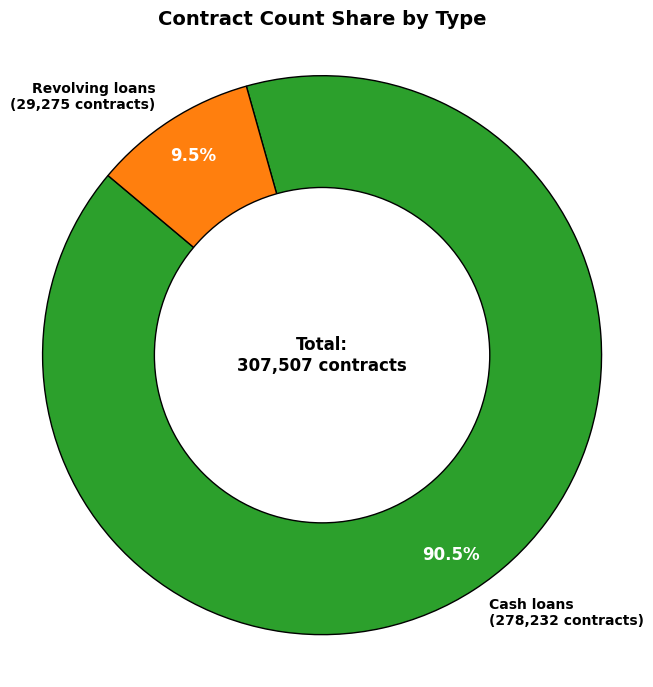

In [12]:
# @title
# ------------------------------------------------------
# Common configuration for donut chart
# ------------------------------------------------------
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 11,
})

INNER_RADIUS     = 0.60
EDGE_WIDTH       = 1.0
CENTER_FONTSIZE  = 12
LABEL_FONTSIZE   = 10
AUTOPCT_FONTSIZE = 12
TITLE_FONTSIZE   = 14

def plot_donut(values, labels_with_counts, title, colors):
    fig, ax = plt.subplots(figsize=(7, 7))

    wedges, texts, autotexts = ax.pie(
        values,
        labels=labels_with_counts,
        autopct="%1.1f%%",
        startangle=140,
        colors=colors,
        pctdistance=0.85,
        wedgeprops={"edgecolor": "black"},
        textprops={"fontsize": LABEL_FONTSIZE, "fontweight": "bold"},
    )

    for autotext in autotexts:
        autotext.set_color("white")
        autotext.set_fontsize(AUTOPCT_FONTSIZE)
        autotext.set_fontweight("bold")

    centre_circle = plt.Circle(
        (0, 0), INNER_RADIUS,
        fc="white", edgecolor="black", linewidth=EDGE_WIDTH
    )
    ax.add_artist(centre_circle)

    ax.set_title(title, fontsize=TITLE_FONTSIZE, fontweight="bold")
    ax.axis("equal")
    plt.tight_layout()
    return ax

# ------------------------------------------------------
# Donut – Contract type distribution
# ------------------------------------------------------
contract_counts = df["NAME_CONTRACT_TYPE"].value_counts()
contract_pct = contract_counts / contract_counts.sum()

# Updated colors: green for Cash loans, orange for Revolving loans
contract_colors = ["#2ca02c", "#ff7f0e"]

contract_labels = [
    f"{typ}\n({contract_counts[typ]:,} contracts)"
    for typ in contract_pct.index
]

ax2 = plot_donut(
    values=contract_pct,
    labels_with_counts=contract_labels,
    title="Contract Count Share by Type",
    colors=contract_colors
)

ax2.text(
    0, 0,
    f"Total:\n{contract_counts.sum():,} contracts",
    ha="center", va="center",
    fontsize=CENTER_FONTSIZE, fontweight="bold"
)

plt.show()


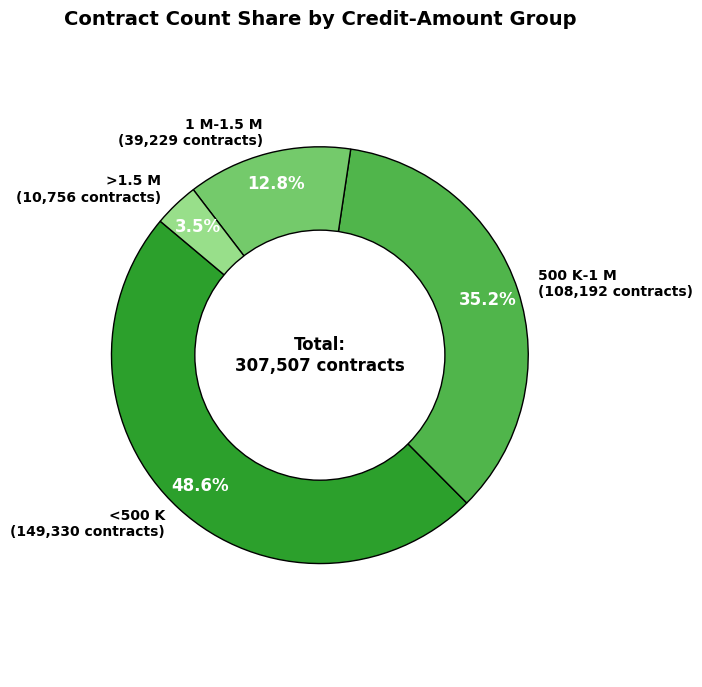

In [13]:
# @title
# ================================================
# 2) Donut – Credit‑amount group
# ================================================
bins   = [0, 500_000, 1_000_000, 1_500_000, float("inf")]
labels = ["<500 K", "500 K‑1 M", "1 M‑1.5 M", ">1.5 M"]

df["CREDIT_GROUP"] = pd.cut(df["AMT_CREDIT"], bins=bins, labels=labels, right=False)

credit_counts = df["CREDIT_GROUP"].value_counts().sort_index()
credit_pct    = (credit_counts / credit_counts.sum()).sort_values(ascending=False)

# green palette anchored at #2ca02c → #98df8a
anchor_colors = ["#2ca02c", "#98df8a"]
if len(credit_pct) <= 2:
    credit_colors = anchor_colors[: len(credit_pct)]
else:
    cmap = mcolors.LinearSegmentedColormap.from_list("green_anchor", anchor_colors)
    credit_colors = [cmap(i / (len(credit_pct) - 1)) for i in range(len(credit_pct))]

credit_labels = [
    f"{grp}\n({credit_counts[grp]:,} contracts)"
    for grp in credit_pct.index
]

ax1 = plot_donut(
    values=credit_pct,
    labels_with_counts=credit_labels,
    title="Contract Count Share by Credit‑Amount Group",
    colors=credit_colors
)

ax1.text(
    0, 0,
    f"Total:\n{credit_counts.sum():,} contracts",
    ha="center", va="center",
    fontsize=CENTER_FONTSIZE, fontweight="bold"
)

plt.show()

📊 Relationship between AMT_CREDIT and AMT_GOODS_PRICE:

✅ Credit > Price : 198,760 (64.64%)
✅ Credit = Price : 108,210 (35.19%)
✅ Credit < Price : 259 (0.08%)
✅ Unknown        : 278 (0.09%)

🔹 Total loans evaluated: 307,507


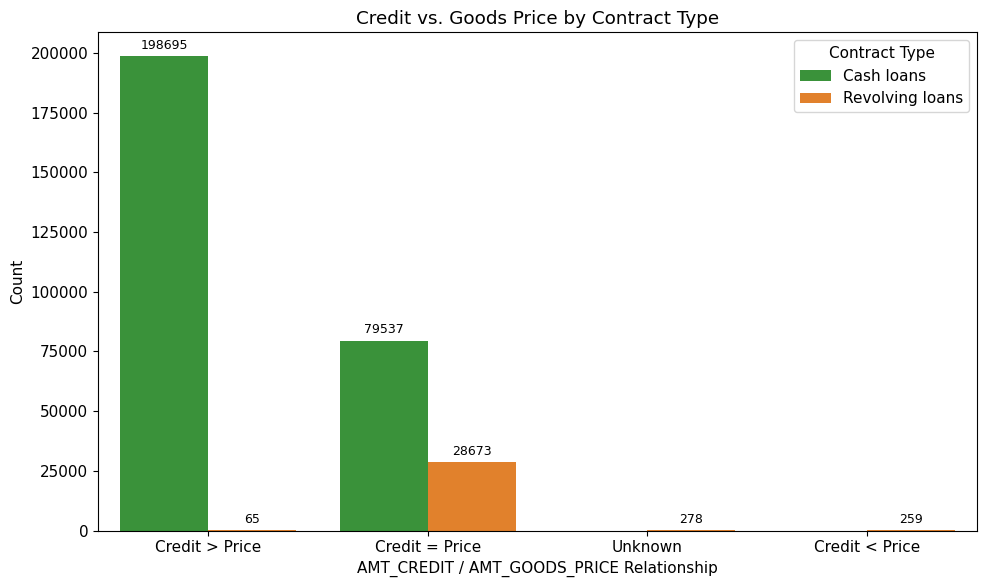

In [14]:
# @title
# -----------------------------------------------
# Classify relationship between AMT_CREDIT and AMT_GOODS_PRICE
# -----------------------------------------------

# Fill in NaN-aware masks
credit_gt_price = df["AMT_CREDIT"] > df["AMT_GOODS_PRICE"]
credit_eq_price = df["AMT_CREDIT"] == df["AMT_GOODS_PRICE"]
credit_lt_price = df["AMT_CREDIT"] < df["AMT_GOODS_PRICE"]

df["CREDIT_GOODS_RELATION"] = np.select(
    condlist=[credit_gt_price, credit_eq_price, credit_lt_price],
    choicelist=["Credit > Price", "Credit = Price", "Credit < Price"],
    default="Unknown"
)

# ----- Summary counts & percentages -----
relation_counts = df["CREDIT_GOODS_RELATION"].value_counts(dropna=False)
total_cases     = len(df)
relation_pct    = relation_counts / total_cases * 100

print("📊 Relationship between AMT_CREDIT and AMT_GOODS_PRICE:\n")
for label in ["Credit > Price", "Credit = Price", "Credit < Price", "Unknown"]:
    cnt = relation_counts.get(label, 0)
    pct = relation_pct.get(label, 0)
    print(f"✅ {label:15}: {cnt:,} ({pct:.2f}%)")

print(f"\n🔹 Total loans evaluated: {total_cases:,}")

# -----------------------------------------------
# Bar chart – relationship split by contract type
# -----------------------------------------------

# Define the colors for Cash loans (green) and Revolving loans (orange)
contract_colors = {
    "Cash loans": "#2ca02c",     # Green for Cash loans
    "Revolving loans": "#ff7f0e" # Orange for Revolving loans
}

# Plot the countplot with the defined colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="CREDIT_GOODS_RELATION",
    hue="NAME_CONTRACT_TYPE",
    palette=contract_colors
)

plt.title("Credit vs. Goods Price by Contract Type")
plt.xlabel("AMT_CREDIT / AMT_GOODS_PRICE Relationship")
plt.ylabel("Count")
plt.legend(title="Contract Type")

# Annotate counts on each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=9, padding=3)

plt.tight_layout()
plt.show()

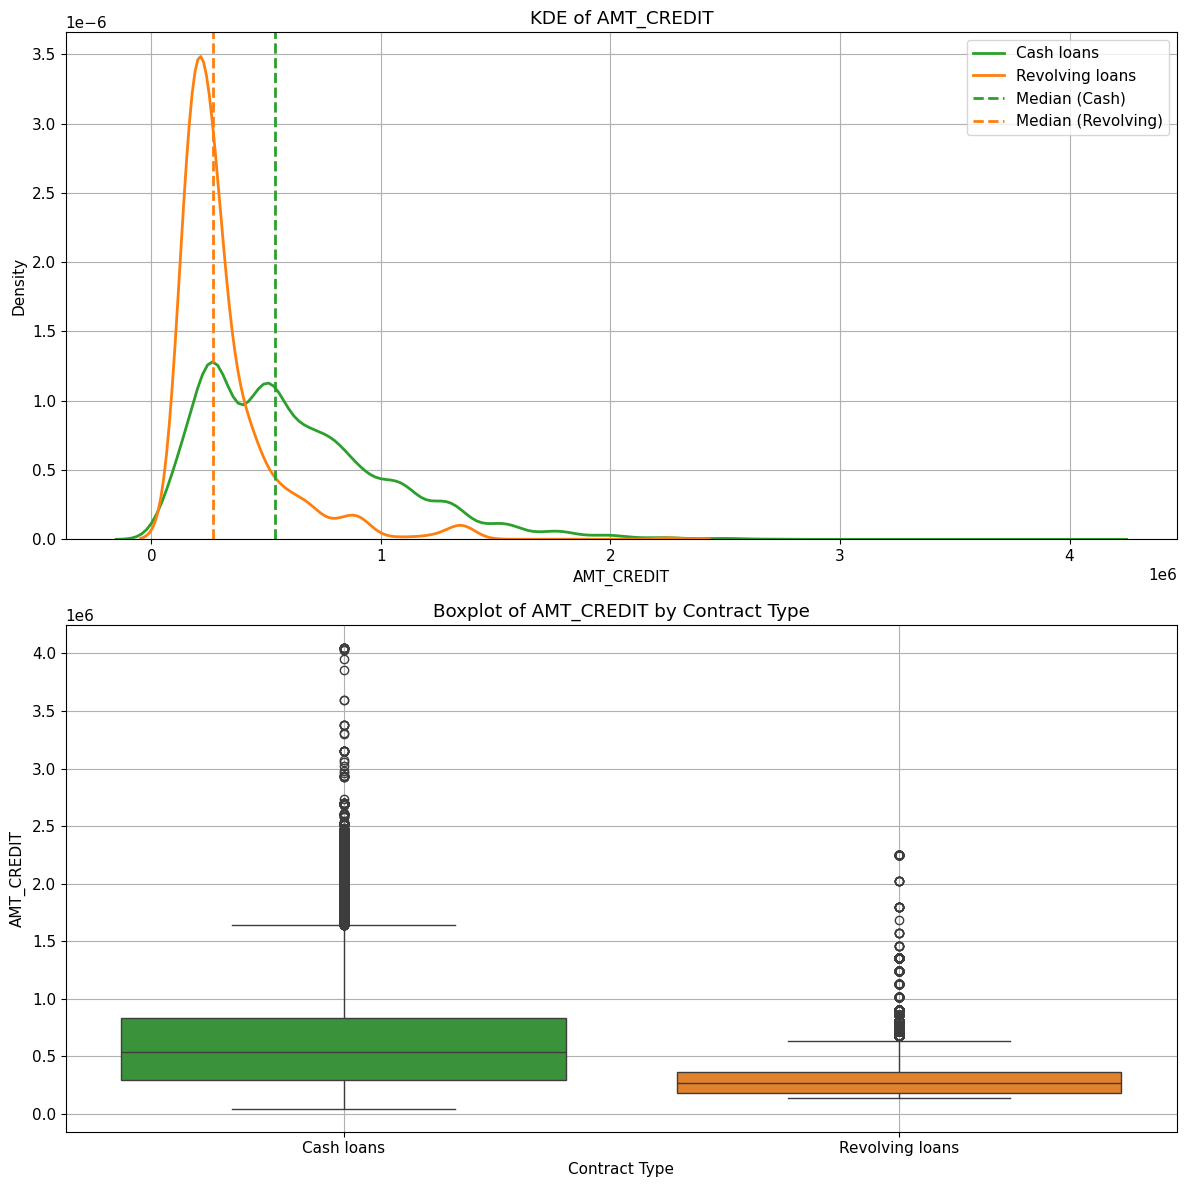

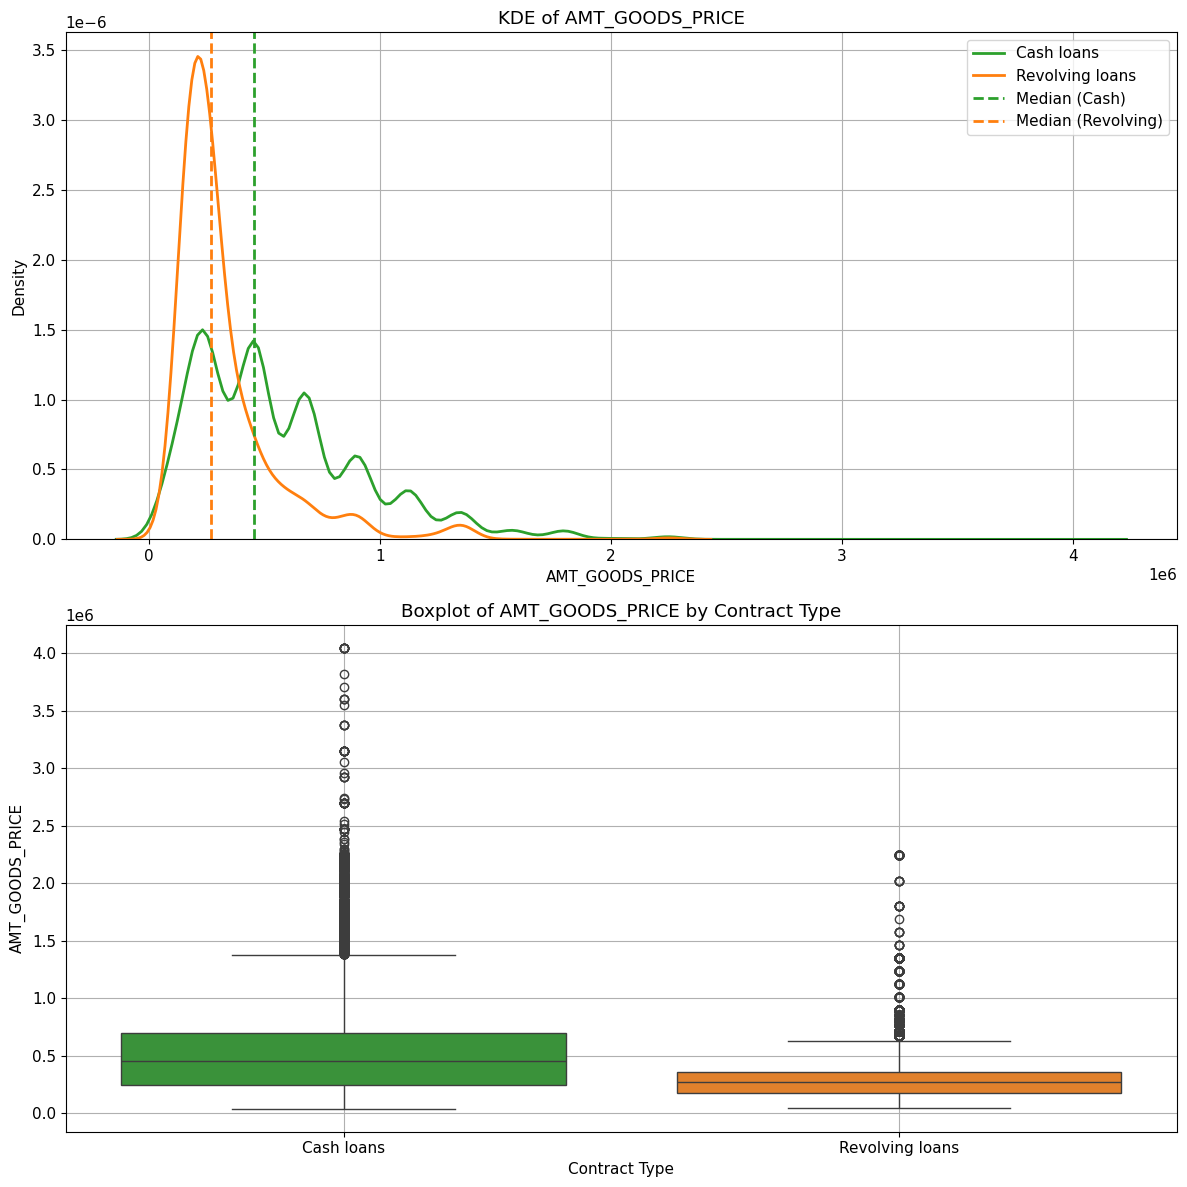

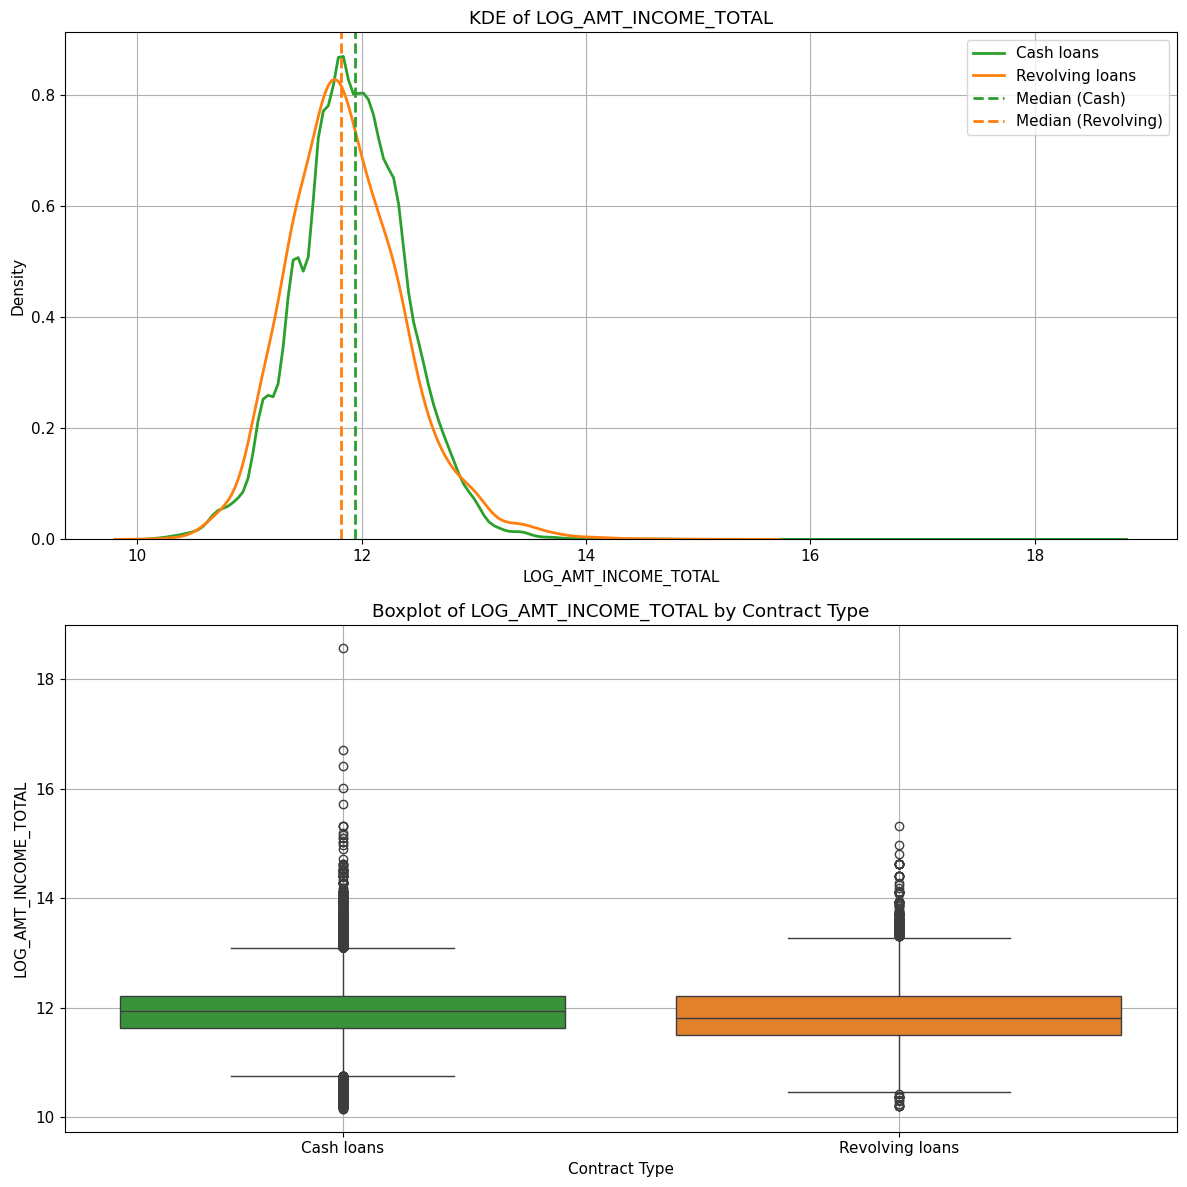

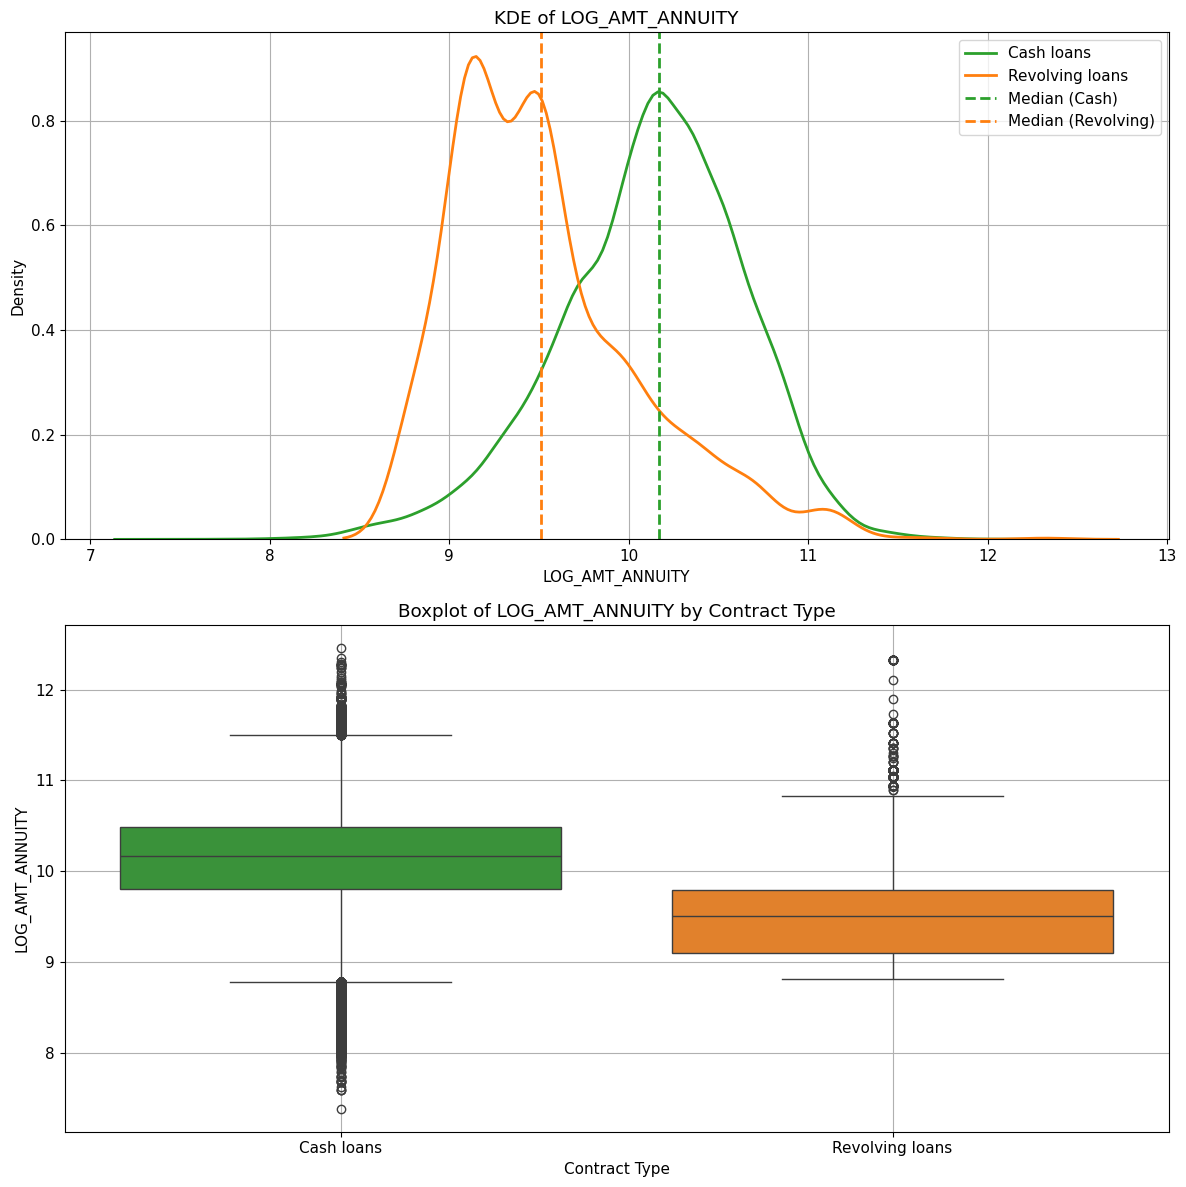

In [15]:
# @title
plot_kde_box(df, "AMT_CREDIT")
plot_kde_box(df, "AMT_GOODS_PRICE")
plot_kde_box(df, "AMT_INCOME_TOTAL", log_transform=True)
plot_kde_box(df, "AMT_ANNUITY", log_transform=True) # Changed this line

In [16]:
# @title
# ------------------------------------------------------
# Filter data for 'Cash loans' group
# ------------------------------------------------------
cash_loans_df = df[df['NAME_CONTRACT_TYPE'] == 'Cash loans']

# Count the number of loans with AMT_GOODS_PRICE = 0 in 'Cash loans' group
zero_goods_price_cash_loans = (cash_loans_df['AMT_GOODS_PRICE'] == 0).sum()

# Print the result
print("📊 Number of 'Cash loans' with `AMT_GOODS_PRICE = 0`:", zero_goods_price_cash_loans)



📊 Number of 'Cash loans' with `AMT_GOODS_PRICE = 0`: 0


In [17]:
# @title
# ------------------------------------------------------
# Filter data for 'Revolving loans' group
# ------------------------------------------------------
revolving_loans_df = df[df['NAME_CONTRACT_TYPE'] == 'Revolving loans']

# Calculate total number of loans and total loan value
total_revolving_loans = len(revolving_loans_df)
total_revolving_credit = revolving_loans_df['AMT_CREDIT'].sum()

# Calculate number and total loan value for loans with `AMT_GOODS_PRICE = 0`
zero_goods_price_loans = revolving_loans_df[revolving_loans_df['AMT_GOODS_PRICE'] == 0]
count_zero_goods_price = len(zero_goods_price_loans)
total_credit_zero_goods_price = zero_goods_price_loans['AMT_CREDIT'].sum()

# Calculate number and total loan value for loans with `AMT_GOODS_PRICE > 0`
non_zero_goods_price_loans = revolving_loans_df[revolving_loans_df['AMT_GOODS_PRICE'] > 0]
count_non_zero_goods_price = len(non_zero_goods_price_loans)
total_credit_non_zero_goods_price = non_zero_goods_price_loans['AMT_CREDIT'].sum()

# Print detailed results
print("📊 Total number and value of loans in the 'Revolving loans' group:")
print(f"✅ Total number of loans: {total_revolving_loans:,} | Total loan value: {total_revolving_credit:,.0f} VND")
print(f"✅ Number of loans with `AMT_GOODS_PRICE = 0`: {count_zero_goods_price:,} | Total loan value: {total_credit_zero_goods_price:,.0f} VND")
print(f"✅ Number of loans with `AMT_GOODS_PRICE > 0`: {count_non_zero_goods_price:,} | Total loan value: {total_credit_non_zero_goods_price:,.0f} VND")

📊 Total number and value of loans in the 'Revolving loans' group:
✅ Total number of loans: 29,275 | Total loan value: 9,485,325,000 VND
✅ Number of loans with `AMT_GOODS_PRICE = 0`: 0 | Total loan value: 0 VND
✅ Number of loans with `AMT_GOODS_PRICE > 0`: 28,997 | Total loan value: 9,407,587,500 VND


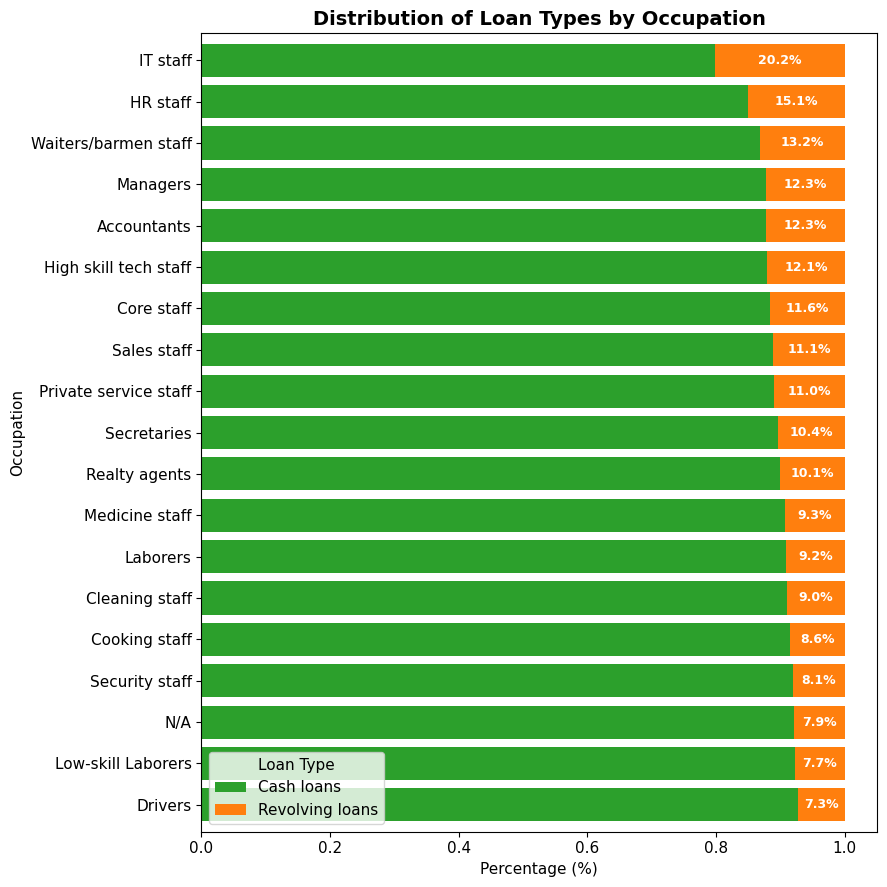

In [18]:
# @title
# ------------------------------------------------------
# Distribution of Loan Types by Occupation
# ------------------------------------------------------
occupation_contract_counts = df.groupby(["OCCUPATION_TYPE", "NAME_CONTRACT_TYPE"]).size().unstack()

# Drop rows with missing occupation
occupation_contract_counts = occupation_contract_counts.dropna()

# Calculate percentage by occupation
occupation_contract_percent = occupation_contract_counts.div(occupation_contract_counts.sum(axis=1), axis=0)

# Sort occupations by % of Revolving loans (descending)
occupation_sorted_by_revolving = occupation_contract_percent["Revolving loans"].sort_values(ascending=True)
occupation_contract_percent_sorted = occupation_contract_percent.loc[occupation_sorted_by_revolving.index]

# Define color palette
contract_colors = {
    "Cash loans": "#2ca02c",        # Green
    "Revolving loans": "#ff7f0e"    # Orange
}

# Plot 100% horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(9, 9))
occupation_contract_percent_sorted.plot(
    kind="barh",
    stacked=True,
    color=[contract_colors["Cash loans"], contract_colors["Revolving loans"]],
    width=0.8,
    ax=ax
)

# Annotate % value of Revolving loans inside the bar
for i, (occupation, pct) in enumerate(occupation_sorted_by_revolving.items()):
    ax.text(
        occupation_contract_percent_sorted.loc[occupation, "Cash loans"] + pct / 2,  # center of orange bar
        i,
        f"{pct*100:.1f}%",
        va='center',
        ha='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title("Distribution of Loan Types by Occupation", fontsize=14, fontweight="bold")
plt.xlabel("Percentage (%)")
plt.ylabel("Occupation")
plt.legend(title="Loan Type", loc="lower left")
plt.tight_layout()
plt.show()

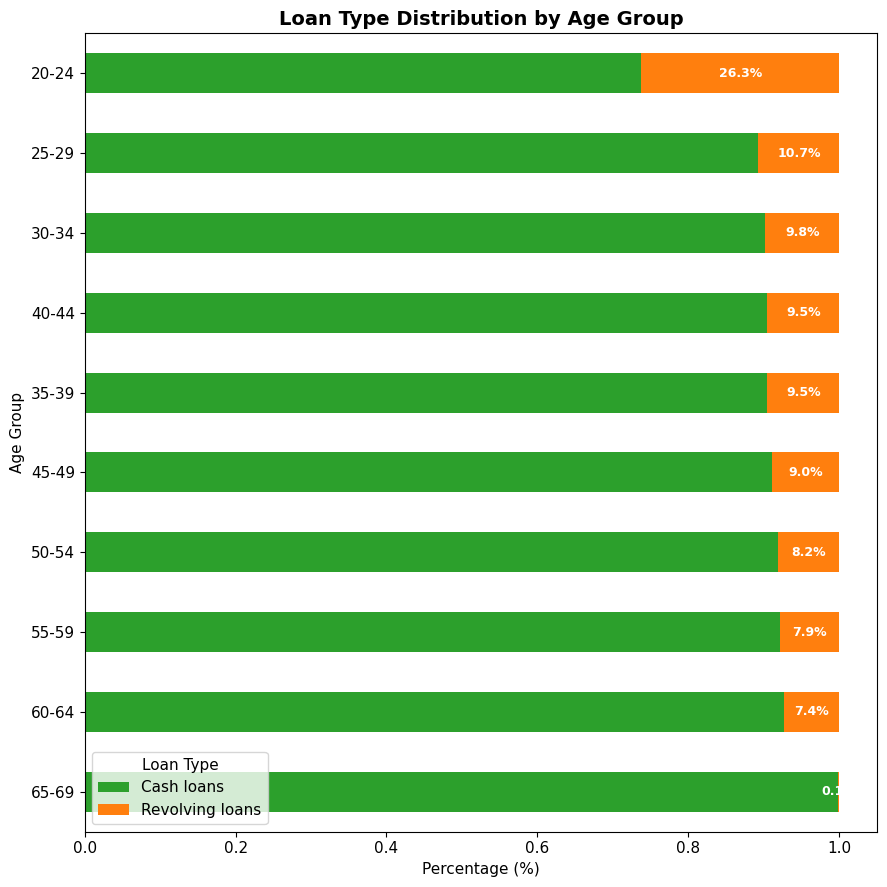

In [19]:
# @title
# ------------------------------------------------------
# Group loan type distribution by age group (5-year bins)
# ------------------------------------------------------
df["AGE"] = (-df["DAYS_BIRTH"] / 365).astype(int)

age_bins = list(range(20, 75, 5))
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=age_bins, labels=age_labels, right=False)

age_contract_counts = df.groupby(["AGE_GROUP", "NAME_CONTRACT_TYPE"]).size().unstack()
age_contract_counts = age_contract_counts.dropna()
age_contract_percent = age_contract_counts.div(age_contract_counts.sum(axis=1), axis=0)

# Sort age groups by Revolving loans ratio descending
sorted_index = age_contract_percent["Revolving loans"].sort_values(ascending=True).index
age_contract_percent_sorted = age_contract_percent.loc[sorted_index]

contract_colors = {
    "Cash loans": "#2ca02c",        # Green
    "Revolving loans": "#ff7f0e"    # Orange
}

fig, ax = plt.subplots(figsize=(9, 9))
age_contract_percent_sorted.plot(
    kind="barh",
    stacked=True,
    color=[contract_colors[col] for col in age_contract_percent_sorted.columns],
    ax=ax
)

plt.title("Loan Type Distribution by Age Group", fontsize=14, fontweight="bold")
plt.xlabel("Percentage (%)")
plt.ylabel("Age Group")
plt.legend(title="Loan Type", loc='lower left')

# Annotate % inside each bar with custom styling
for i, age_group in enumerate(age_contract_percent_sorted.index):
    cumulative = 0
    for contract_type in age_contract_percent_sorted.columns:
        value = age_contract_percent_sorted.loc[age_group, contract_type]
        if pd.notna(value) and value > 0:
            if contract_type == "Revolving loans":
                ax.text(
                    cumulative + value / 2, i,
                    f"{value * 100:.1f}%",
                    va='center',
                    ha='center',
                    fontsize=9,
                    color='white',
                    fontweight='bold'
                )
            cumulative += value

plt.tight_layout()
plt.show()

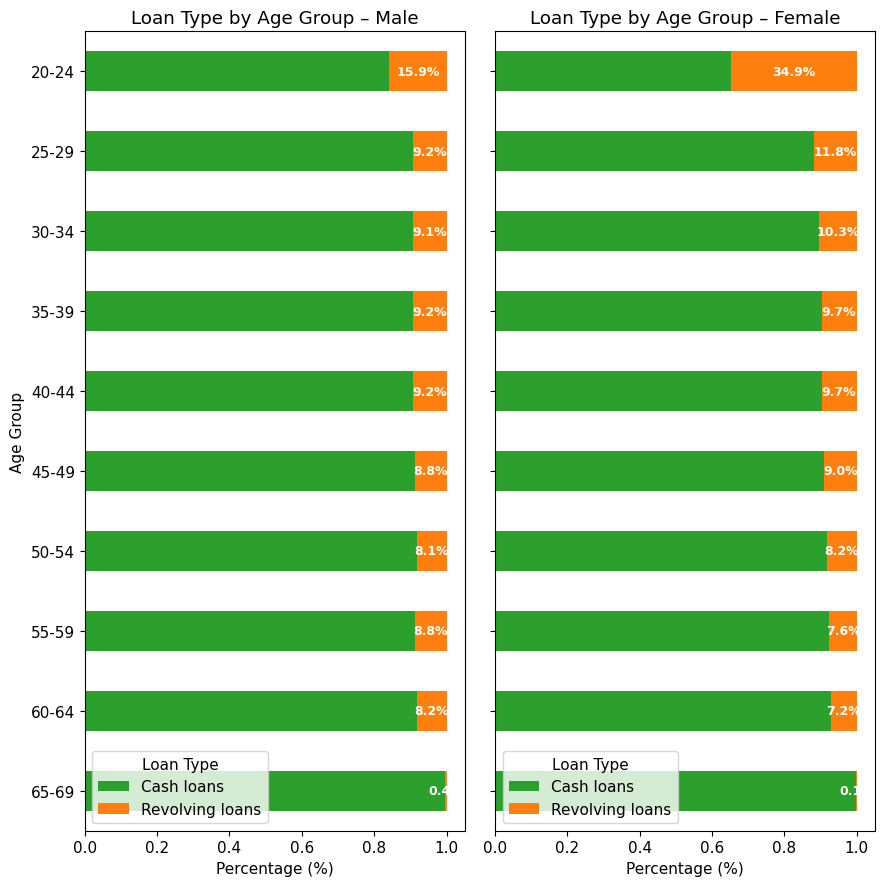

In [20]:
# @title
# ------------------------------------------------------
# Plot loan type distribution by age group and gender
# ------------------------------------------------------
df["AGE"] = (-df["DAYS_BIRTH"] / 365).astype(int)

age_bins = list(range(20, 75, 5))
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=age_bins, labels=age_labels, right=False)

contract_colors = {
    "Cash loans": "#2ca02c",
    "Revolving loans": "#ff7f0e"
}

fig, axes = plt.subplots(1, 2, figsize=(9, 9), sharey=True)

for i, gender in enumerate(["M", "F"]):
    df_gender = df[df["CODE_GENDER"] == gender]
    counts = df_gender.groupby(["AGE_GROUP", "NAME_CONTRACT_TYPE"]).size().unstack()
    counts = counts.dropna()
    percent = counts.div(counts.sum(axis=1), axis=0)
    percent = percent.loc[age_labels]  # ensure consistent age group order

    percent.plot(
        kind="barh",
        stacked=True,
        color=[contract_colors[col] for col in percent.columns],
        ax=axes[i]
    )
    axes[i].invert_yaxis()
    title = "Loan Type by Age Group – " + ("Male" if gender == "M" else "Female")
    axes[i].set_title(title)
    axes[i].set_xlabel("Percentage (%)")
    axes[i].set_ylabel("Age Group" if i == 0 else "")
    axes[i].legend(title="Loan Type", loc='lower left')

    # Annotate only Revolving loans % inside the bar
    for j, age_group in enumerate(percent.index):
        cumulative = 0
        for contract_type in percent.columns:
            value = percent.loc[age_group, contract_type]
            if pd.notna(value) and value > 0:
                if contract_type == "Revolving loans":
                    axes[i].text(
                        cumulative + value / 2, j,
                        f"{value * 100:.1f}%",
                        va='center', ha='center',
                        fontsize=9, color='white', fontweight='bold'
                    )
                cumulative += value

plt.tight_layout()
plt.show()

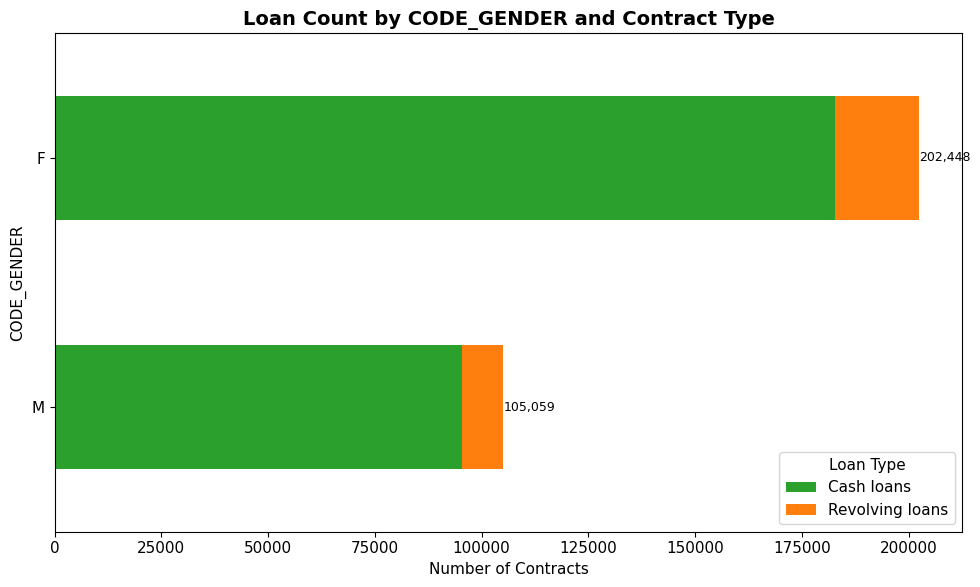

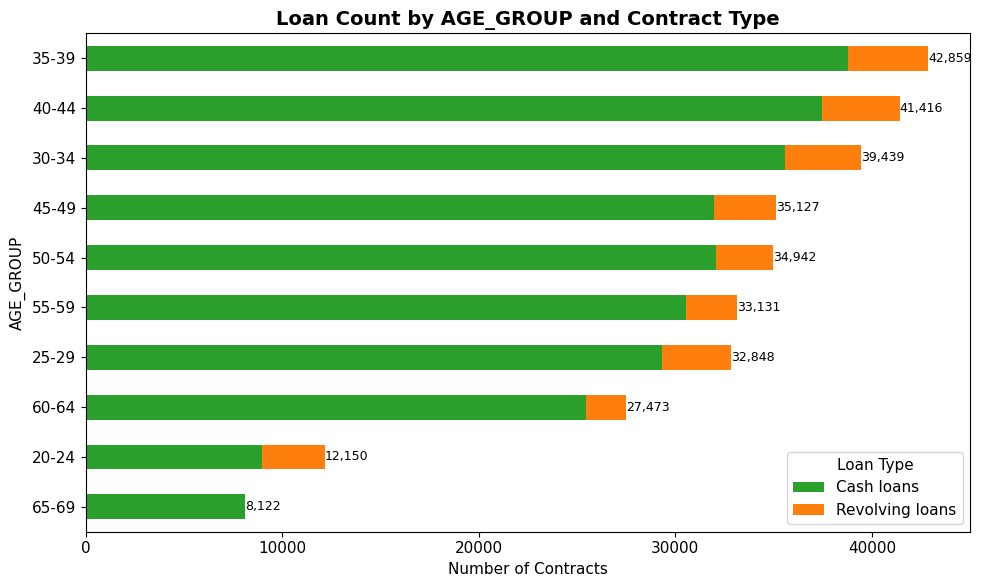

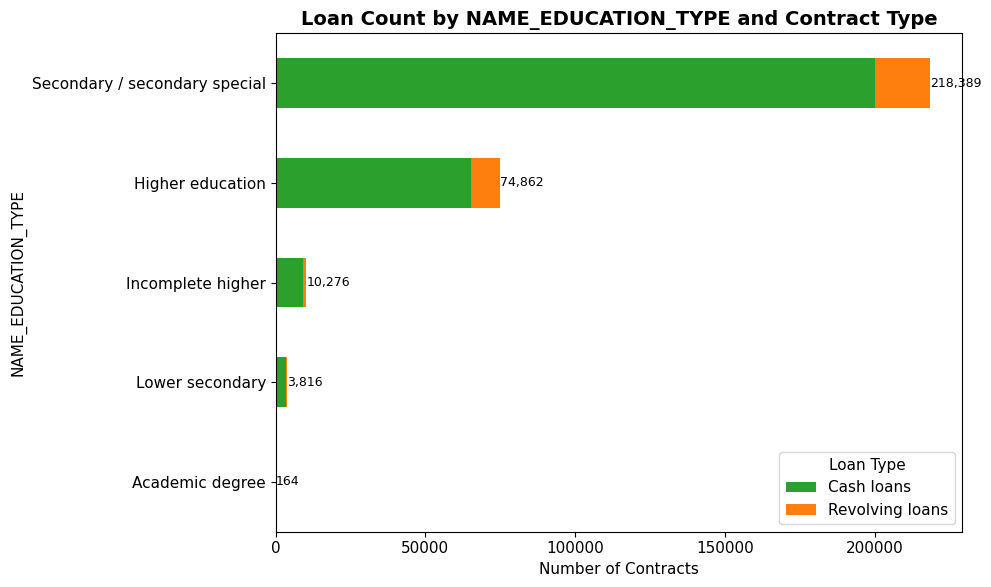

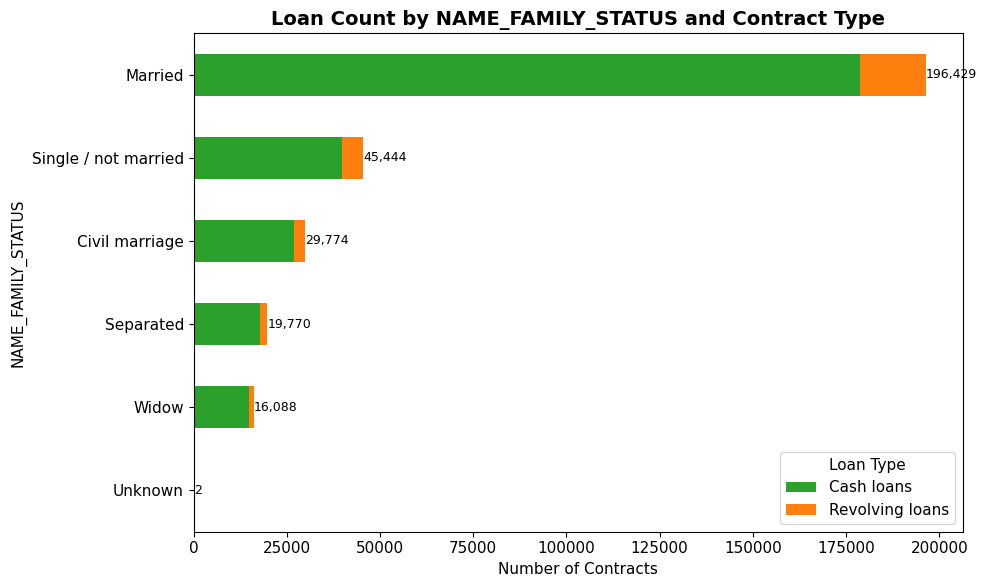

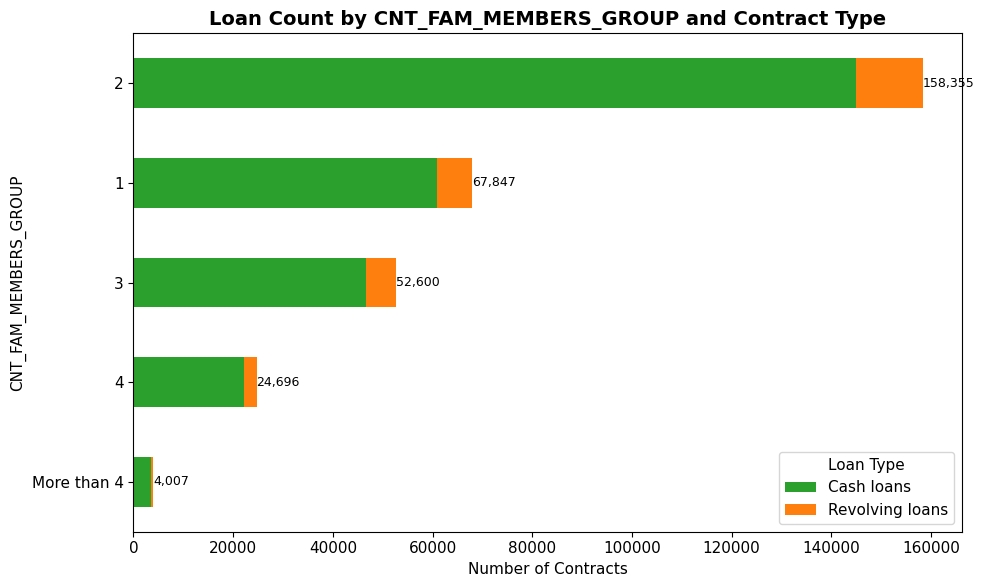

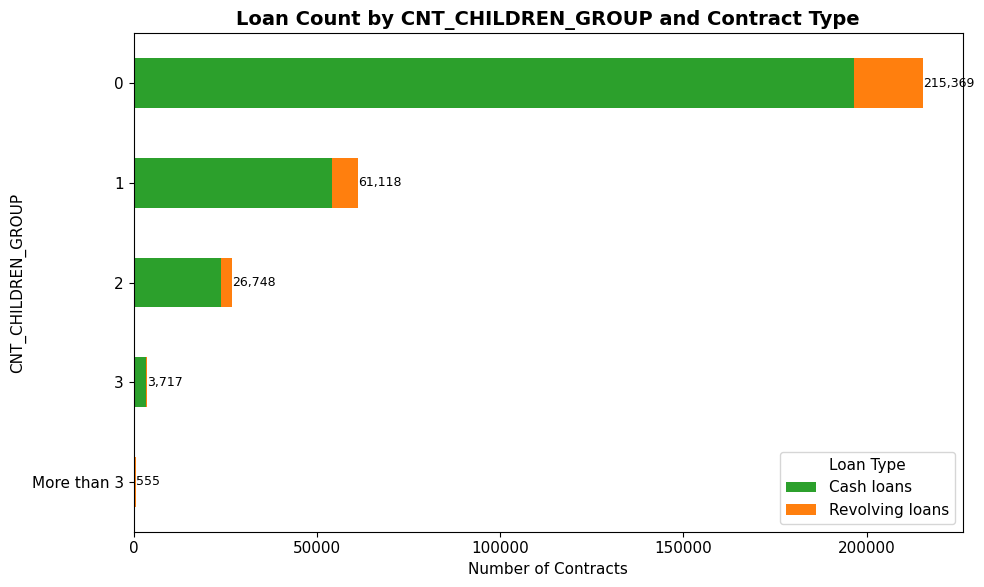

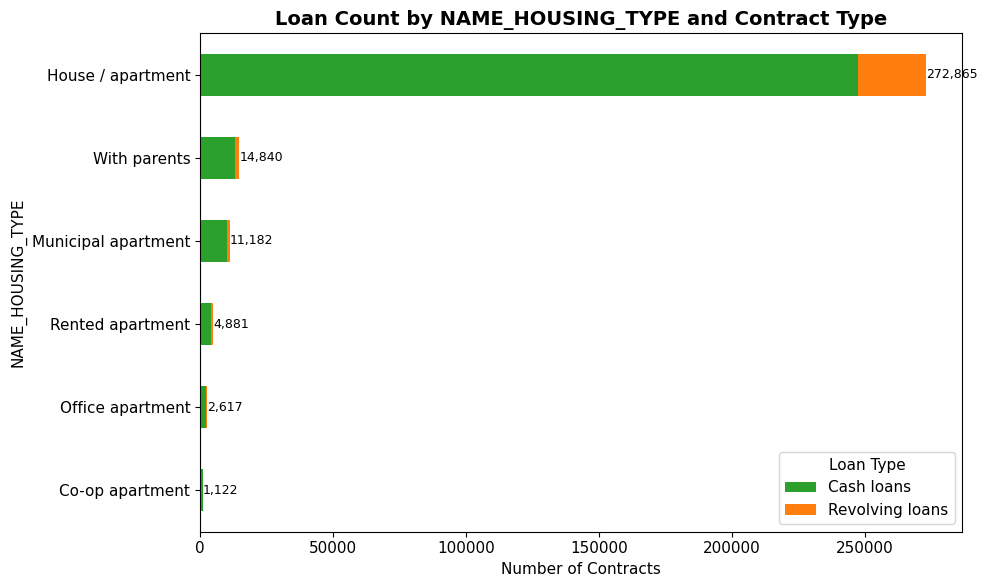

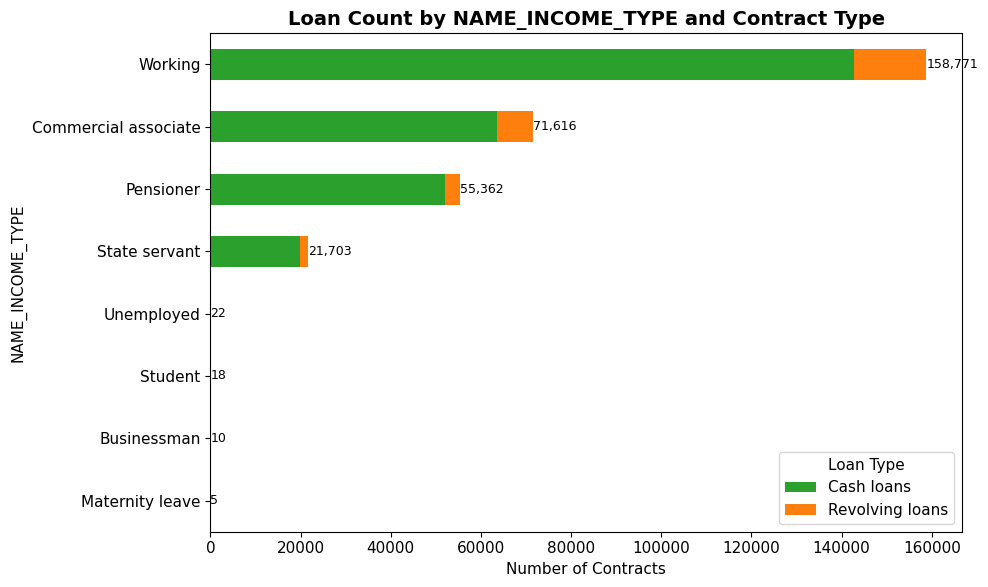

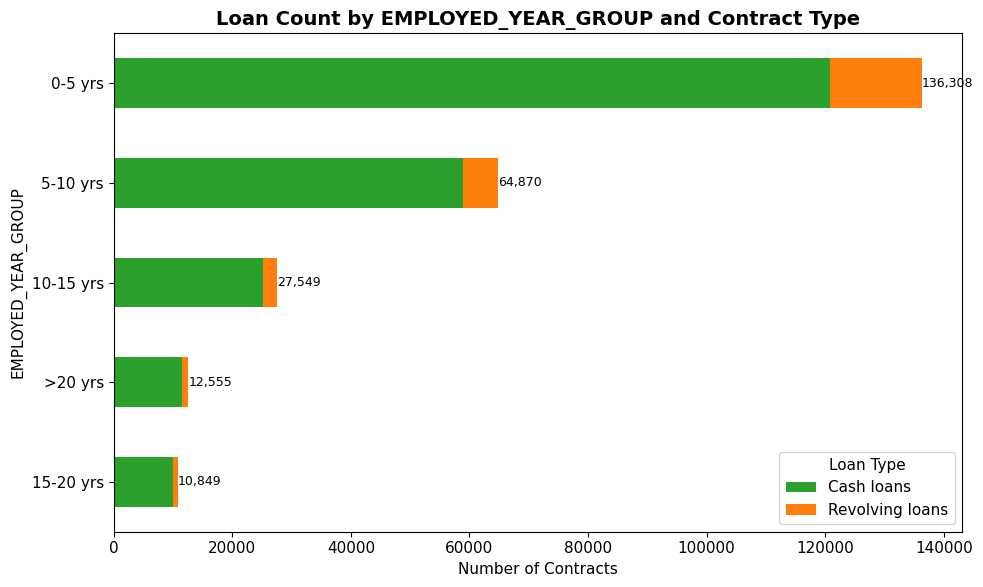

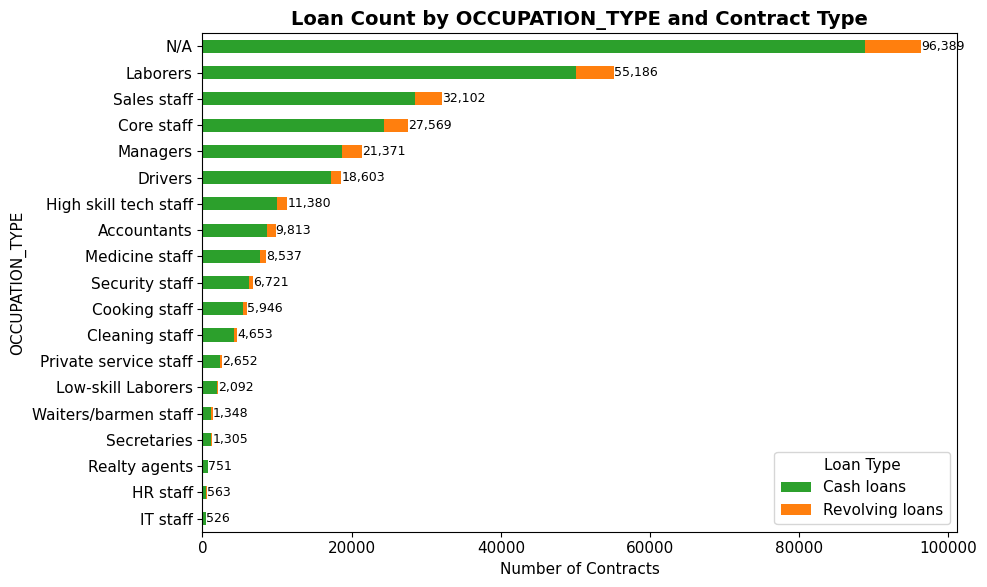

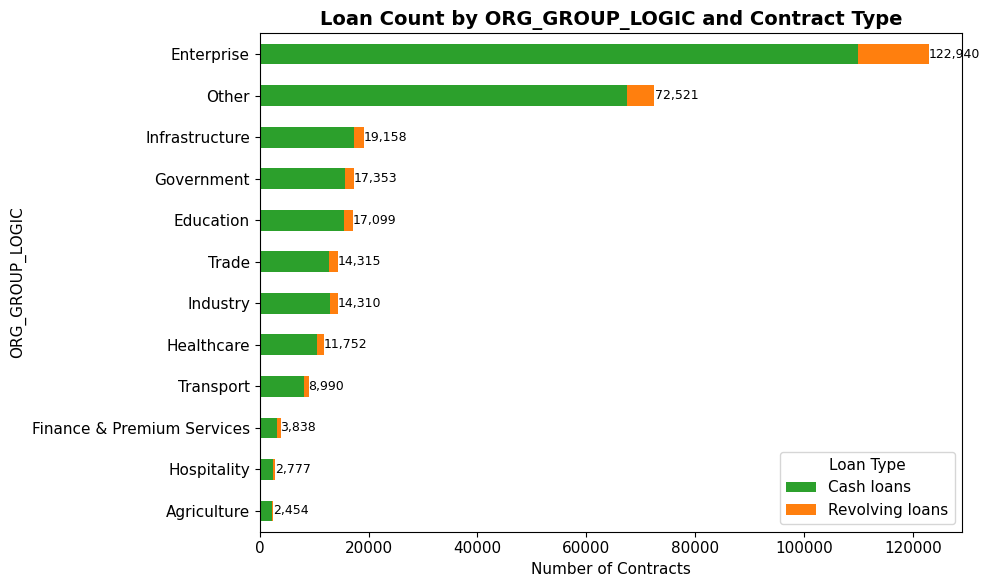

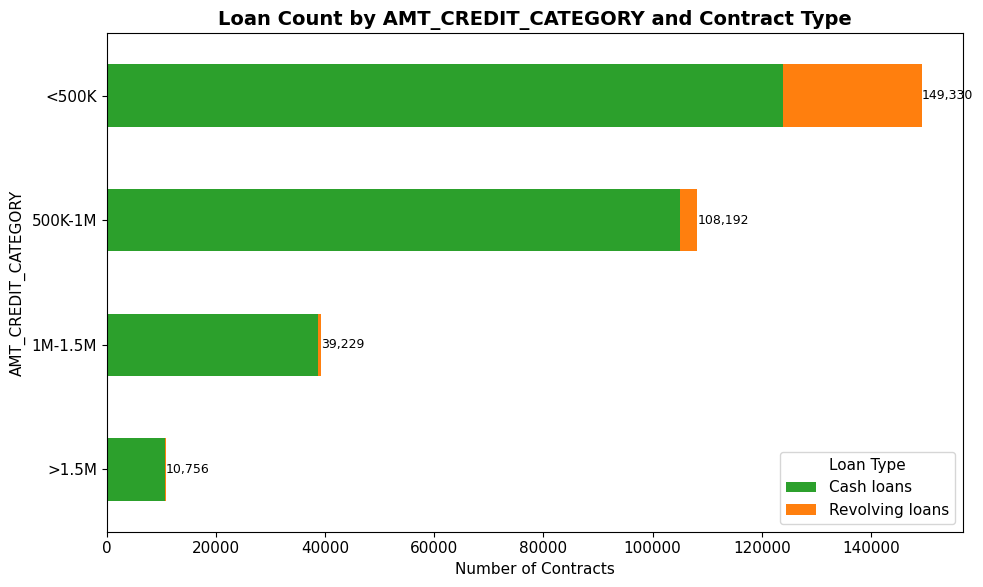

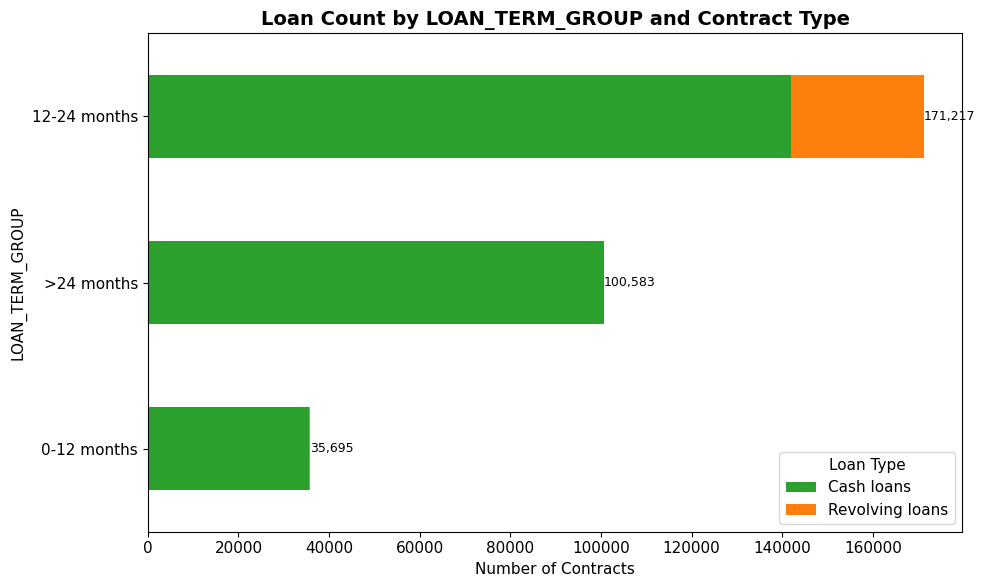

In [21]:
# @title
# ------------------------------------------------------
# Apply feature‑engineering
# ------------------------------------------------------
df_fe = add_engineered_columns(df)
# ------------------------------------------------------
# Plotting utilities
# ------------------------------------------------------
contract_colors = {
    "Cash loans": "#2ca02c",        # Green
    "Revolving loans": "#ff7f0e"    # Orange
}

def plot_stacked_bar_with_totals(df: pd.DataFrame, feature: str) -> None:
    grouped = df.groupby([feature, "NAME_CONTRACT_TYPE"]).size().unstack(fill_value=0)
    totals = grouped.sum(axis=1)
    grouped = grouped.loc[totals.sort_values(ascending=True).index]
    totals = totals.loc[grouped.index]

    ax = grouped.plot(
        kind="barh",
        stacked=True,
        figsize=(10, 6),
        color=[contract_colors.get(col, "#888888") for col in grouped.columns]
    )

    plt.title(f"Loan Count by {feature} and Contract Type", fontsize=14, fontweight="bold")
    plt.xlabel("Number of Contracts")
    plt.ylabel(feature)
    plt.legend(title="Loan Type", loc="best")

    for i, total in enumerate(totals):
        ax.text(total + 5, i, f"{total:,}", va="center", fontsize=9, color="black")

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------
# Draw stacked barh for selected categorical features
# ------------------------------------------------------
categorical_features = [
    # Demographics
    "CODE_GENDER", "AGE_GROUP", "NAME_EDUCATION_TYPE",
    # Family / housing
    "NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS_GROUP",
    "CNT_CHILDREN_GROUP", "NAME_HOUSING_TYPE",
    # Occupation / income
    "NAME_INCOME_TYPE", "EMPLOYED_YEAR_GROUP",
    "OCCUPATION_TYPE", "ORG_GROUP_LOGIC",
    # Credit specifics
    "AMT_CREDIT_CATEGORY", "LOAN_TERM_GROUP"
]

for feat in categorical_features:
    plot_stacked_bar_with_totals(df_fe, feat)


## Phân Tích Khoản Tín Dụng

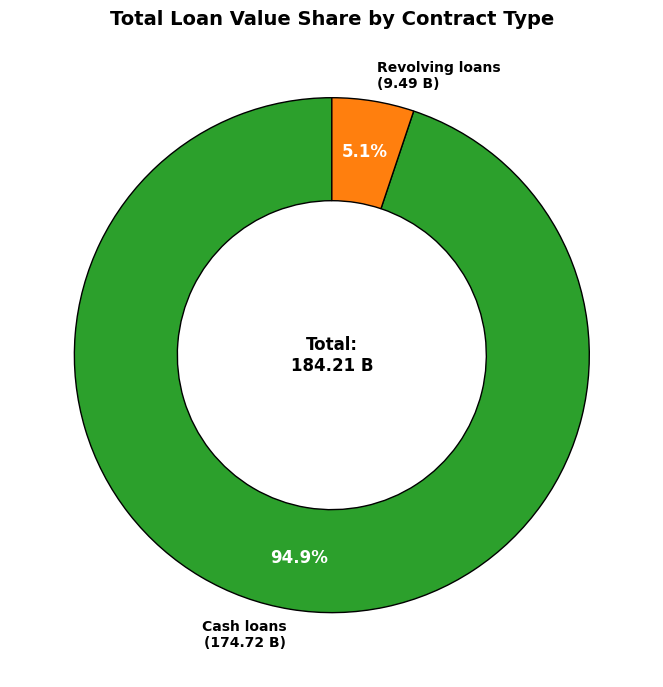

In [22]:
# @title
# ------------------------------------------------------
# Donut chart of total loan value by contract type
# ------------------------------------------------------
contract_type_amounts = df.groupby('NAME_CONTRACT_TYPE')['AMT_CREDIT'].sum()
contract_type_amounts_ratio = contract_type_amounts / contract_type_amounts.sum()
total_credit = contract_type_amounts.sum() / 1e9  # in billions (VND)

labels = contract_type_amounts.index
colors = ['#2ca02c', '#ff7f0e']  # green for Cash loans, orange for Revolving loans

fig, ax = plt.subplots(figsize=(7, 7))

wedges, texts, autotexts = ax.pie(
    contract_type_amounts_ratio,
    labels=[f"{label}\n({contract_type_amounts[label]/1e9:,.2f} B)" for label in labels],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.8,
    wedgeprops=dict(width=0.4, edgecolor='black'),
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax.text(
    0, 0,
    f"Total:\n{total_credit:,.2f} B",
    fontsize=12, fontweight='bold',
    ha='center', va='center'
)

ax.set_title('Total Loan Value Share by Contract Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



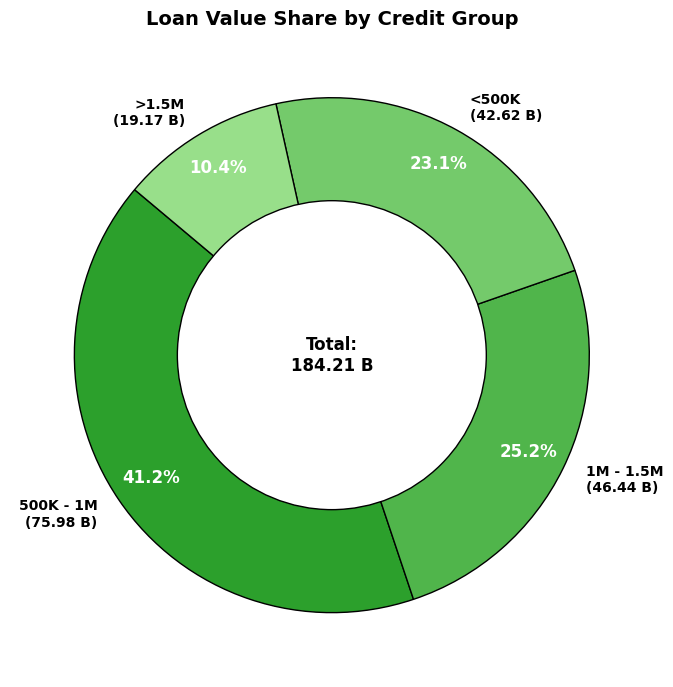

In [23]:
# @title
# ------------------------------------------------------
# Donut chart of loan value share by credit group
# ------------------------------------------------------

# Define bins and labels for credit groups
bins = [0, 500_000, 1_000_000, 1_500_000, float('inf')]
labels = ["<500K", "500K - 1M", "1M - 1.5M", ">1.5M"]
df["CREDIT_GROUP"] = pd.cut(df["AMT_CREDIT"], bins=bins, labels=labels, right=False)

# Compute total loan value per group (in billions VND)
credit_group_totals = df.groupby("CREDIT_GROUP")["AMT_CREDIT"].sum() / 1e9

# Calculate percentage share
percentages = (credit_group_totals / credit_group_totals.sum()).sort_values(ascending=False)

# Generate green gradient palette: #2ca02c → #98df8a
anchor_colors = ["#2ca02c", "#98df8a"]
if len(percentages) <= 2:
    colors_to_use = anchor_colors[:len(percentages)]
else:
    cmap = mcolors.LinearSegmentedColormap.from_list("green_anchor", anchor_colors)
    colors_to_use = [cmap(i / (len(percentages) - 1)) for i in range(len(percentages))]

# Labels with real values (in billion VND)
labels_with_values = [
    f"{cat}\n({credit_group_totals[cat]:.2f} B)" for cat in percentages.index
]

# Compute total for center
total_value = credit_group_totals.sum()

# Create donut chart
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    percentages,
    labels=labels_with_values,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_to_use,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

# Style inner % text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Add white circle in the center
centre_circle = plt.Circle((0, 0), 0.60, fc='white', edgecolor='black', linewidth=1)
ax.add_artist(centre_circle)

# Center text (total loan value)
ax.text(
    0, 0,
    f"Total:\n{total_value:.2f} B",
    ha='center', va='center',
    fontsize=12, fontweight='bold', color='black'
)

ax.set_title("Loan Value Share by Credit Group", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


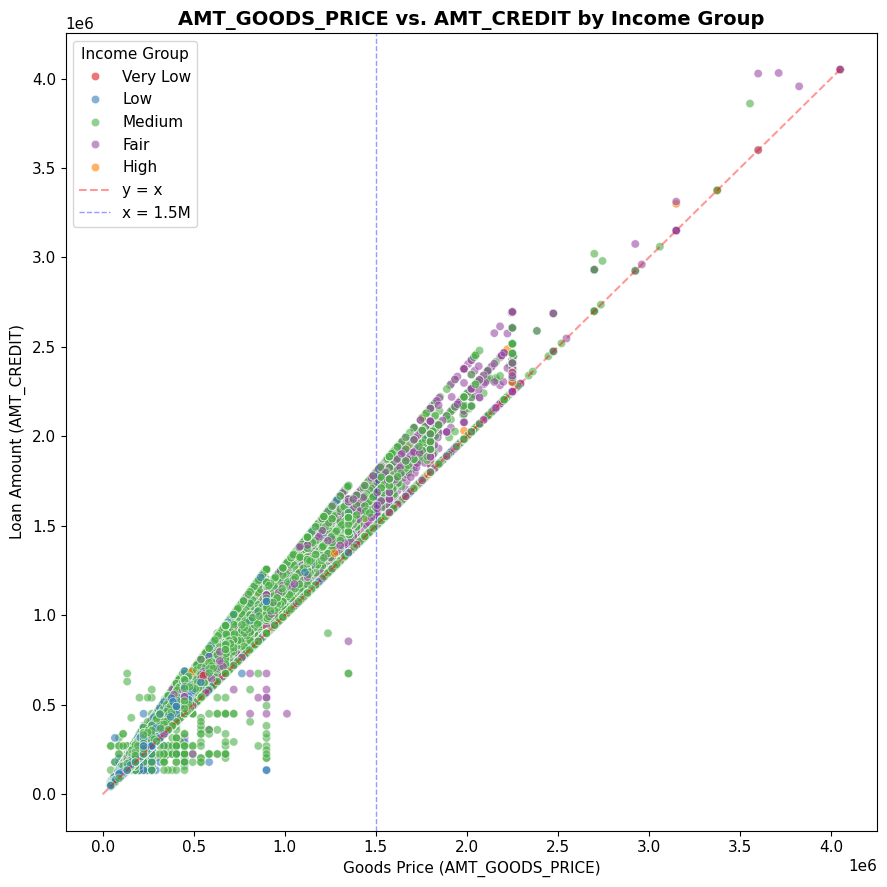

In [24]:
# @title
# ------------------------------------------------------
# Scatterplot: AMT_GOODS_PRICE vs. AMT_CREDIT by Income Group
# ------------------------------------------------------

# Income grouping based on real-world thresholds
income_bins = [0, 40_000, 100_000, 300_000, 800_000, np.inf]
income_labels = ["Very Low", "Low", "Medium", "Fair", "High"]
df["INCOME_GROUP"] = pd.cut(df["AMT_INCOME_TOTAL"], bins=income_bins, labels=income_labels)

# Scatterplot with hue based on income group
plt.figure(figsize=(9, 9))
sns.scatterplot(
    data=df,
    x="AMT_GOODS_PRICE",
    y="AMT_CREDIT",
    hue="INCOME_GROUP",
    palette="Set1",
    alpha=0.6
)

# Reference line y = x
plt.plot(
    [0, df["AMT_GOODS_PRICE"].max()],
    [0, df["AMT_GOODS_PRICE"].max()],
    'r--',
    alpha=0.4,
    label="y = x"
)

# Vertical line at x = 1.5M
plt.axvline(
    x=1_500_000,
    color='blue',
    alpha=0.4,
    linestyle='dashed',
    linewidth=1,
    label='x = 1.5M'
)

# Formatting
plt.title("AMT_GOODS_PRICE vs. AMT_CREDIT by Income Group", fontsize=14, fontweight="bold")
plt.xlabel("Goods Price (AMT_GOODS_PRICE)")
plt.ylabel("Loan Amount (AMT_CREDIT)")
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

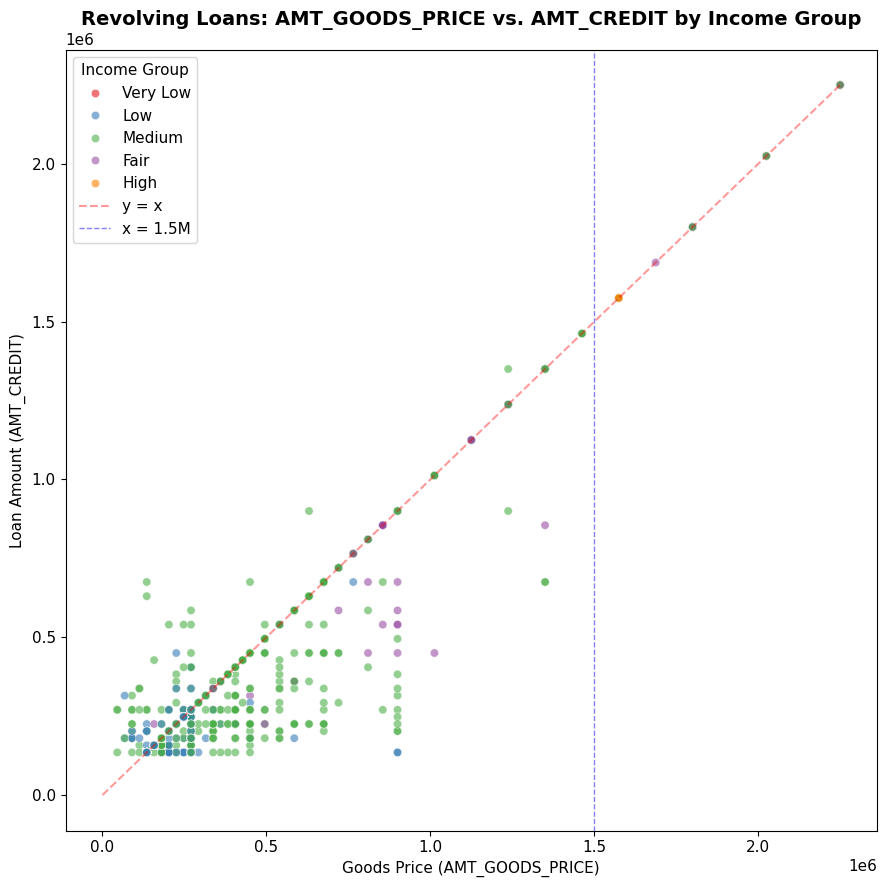

In [25]:
# @title
# ------------------------------------------------------
# Scatterplot (Revolving loans only): AMT_GOODS_PRICE vs. AMT_CREDIT by Income Group
# ------------------------------------------------------
# Ensure income group column exists
income_bins = [0, 40_000, 100_000, 300_000, 800_000, np.inf]
income_labels = ["Very Low", "Low", "Medium", "Fair", "High"]
df["INCOME_GROUP"] = pd.cut(df["AMT_INCOME_TOTAL"], bins=income_bins, labels=income_labels)

# Filter only Revolving loans
revolving_df = df[df["NAME_CONTRACT_TYPE"] == "Revolving loans"]

# Draw scatterplot
plt.figure(figsize=(9, 9))
sns.scatterplot(
    data=revolving_df,
    x="AMT_GOODS_PRICE",
    y="AMT_CREDIT",
    hue="INCOME_GROUP",
    palette="Set1",  #<<< Color
    alpha=0.6
)

# Reference line y = x
plt.plot(
    [0, revolving_df["AMT_GOODS_PRICE"].max()],
    [0, revolving_df["AMT_GOODS_PRICE"].max()],
    'r--',
    alpha=0.4,
    label="y = x"
)

# Vertical reference line
plt.axvline(
    x=1_500_000,
    color='blue',
    alpha=0.5,
    linestyle='dashed',
    linewidth=1,
    label='x = 1.5M'
)

# Axis and legend setup
plt.title("Revolving Loans: AMT_GOODS_PRICE vs. AMT_CREDIT by Income Group", fontsize=14, fontweight="bold")
plt.xlabel("Goods Price (AMT_GOODS_PRICE)")
plt.ylabel("Loan Amount (AMT_CREDIT)")
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

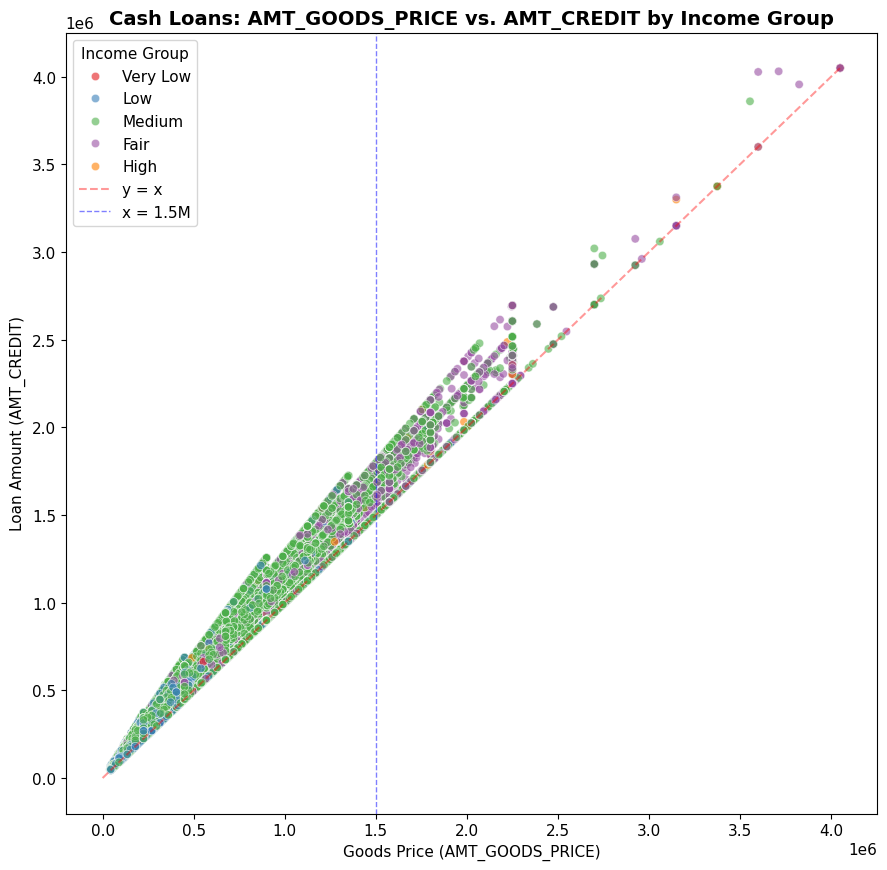

In [26]:
# @title
# ------------------------------------------------------
# Scatterplot (Cash loans only): AMT_GOODS_PRICE vs. AMT_CREDIT by Income Group
# ------------------------------------------------------

# Ensure income group column exists
income_bins = [0, 40_000, 100_000, 300_000, 800_000, np.inf]
income_labels = ["Very Low", "Low", "Medium", "Fair", "High"]
df["INCOME_GROUP"] = pd.cut(df["AMT_INCOME_TOTAL"], bins=income_bins, labels=income_labels)

# Filter only Cash loans
cash_df = df[df["NAME_CONTRACT_TYPE"] == "Cash loans"]

# Draw scatterplot
plt.figure(figsize=(9, 9))
sns.scatterplot(
    data=cash_df,
    x="AMT_GOODS_PRICE",
    y="AMT_CREDIT",
    hue="INCOME_GROUP",
    palette="Set1",
    alpha=0.6
)

# Reference line y = x
plt.plot(
    [0, cash_df["AMT_GOODS_PRICE"].max()],
    [0, cash_df["AMT_GOODS_PRICE"].max()],
    'r--',
    alpha=0.4,
    label="y = x"
)

# Vertical reference line
plt.axvline(
    x=1_500_000,
    color='blue',
    alpha=0.5,
    linestyle='dashed',
    linewidth=1,
    label='x = 1.5M'
)

# Axis and legend setup
plt.title("Cash Loans: AMT_GOODS_PRICE vs. AMT_CREDIT by Income Group", fontsize=14, fontweight="bold")
plt.xlabel("Goods Price (AMT_GOODS_PRICE)")
plt.ylabel("Loan Amount (AMT_CREDIT)")
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()


💰 Total AMT_CREDIT by relation to AMT_GOODS_PRICE:

✅ Credit > Price : 124,808,394,636 (67.75%)
✅ Credit = Price : 59,253,857,060 (32.17%)
✅ Credit < Price : 65,497,500 (0.04%)
✅ Unknown        : 77,737,500 (0.04%)

🔹 Total AMT_CREDIT overall: 184,205,486,696


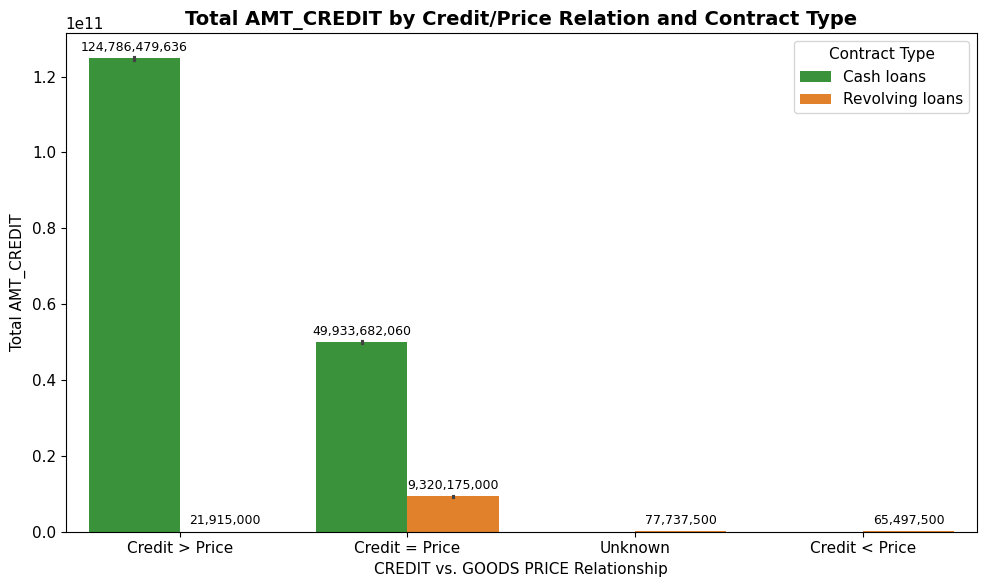

In [27]:
# @title
# ------------------------------------------------------
# Analyze total AMT_CREDIT by relationship to AMT_GOODS_PRICE
# ------------------------------------------------------
df["CREDIT_GOODS_RELATION"] = np.select(
    condlist=[
        df["AMT_CREDIT"] > df["AMT_GOODS_PRICE"],
        df["AMT_CREDIT"] == df["AMT_GOODS_PRICE"],
        df["AMT_CREDIT"] < df["AMT_GOODS_PRICE"]
    ],
    choicelist=["Credit > Price", "Credit = Price", "Credit < Price"],
    default="Unknown"
)

total_credit_by_group = df.groupby("CREDIT_GOODS_RELATION")["AMT_CREDIT"].sum()
total_credit_all = total_credit_by_group.sum()

print("💰 Total AMT_CREDIT by relation to AMT_GOODS_PRICE:\n")
for label in ["Credit > Price", "Credit = Price", "Credit < Price", "Unknown"]:
    amt = total_credit_by_group.get(label, 0)
    pct = (amt / total_credit_all) * 100 if total_credit_all else 0
    print(f"✅ {label:15}: {amt:,.0f} ({pct:.2f}%)")

print(f"\n🔹 Total AMT_CREDIT overall: {total_credit_all:,.0f}")

# ------------------------------------------------------
# Bar chart – total AMT_CREDIT by CREDIT_GOODS_RELATION and contract type
# ------------------------------------------------------
contract_colors = {
    "Cash loans": "#2ca02c",        # Green
    "Revolving loans": "#ff7f0e"    # Orange
}

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x="CREDIT_GOODS_RELATION",
    y="AMT_CREDIT",
    hue="NAME_CONTRACT_TYPE",
    estimator=sum,
    palette=contract_colors
)

plt.title("Total AMT_CREDIT by Credit/Price Relation and Contract Type", fontsize=14, fontweight="bold")
plt.xlabel("CREDIT vs. GOODS PRICE Relationship")
plt.ylabel("Total AMT_CREDIT")
plt.legend(title="Contract Type")

for container in ax.containers:
    ax.bar_label(
        container,
        fmt="{:,.0f}",
        label_type="edge",
        fontsize=9,
        padding=3
    )

plt.tight_layout()
plt.show()

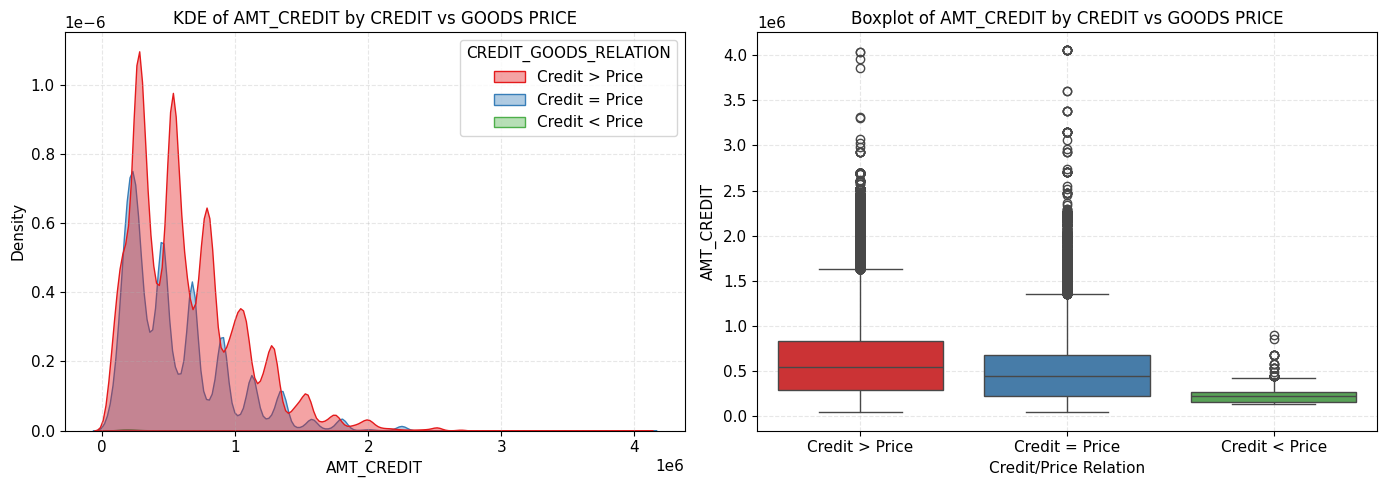

In [28]:
# @title
# Rebuild CREDIT_GOODS_RELATION column
df["CREDIT_GOODS_RELATION"] = np.select(
    condlist=[
        df["AMT_CREDIT"] > df["AMT_GOODS_PRICE"],
        df["AMT_CREDIT"] == df["AMT_GOODS_PRICE"],
        df["AMT_CREDIT"] < df["AMT_GOODS_PRICE"]
    ],
    choicelist=["Credit > Price", "Credit = Price", "Credit < Price"],
    default="Unknown"
)

# Filter only valid and relevant data
relation_order = ["Credit > Price", "Credit = Price", "Credit < Price"]
df_sub = df[df["CREDIT_GOODS_RELATION"].isin(relation_order) & df["AMT_CREDIT"].notna()].copy()

# Set up color palette
palette_relation = sns.color_palette("Set1", n_colors=3)
color_map = dict(zip(relation_order, palette_relation))

# Plot: KDE + Boxplot in subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE Plot
sns.kdeplot(
    data=df_sub,
    x="AMT_CREDIT",
    hue="CREDIT_GOODS_RELATION",
    fill=True,
    palette=color_map,
    alpha=0.4,
    ax=axes[0]
)
axes[0].set_title("KDE of AMT_CREDIT by CREDIT vs GOODS PRICE", fontsize=12)
axes[0].set_xlabel("AMT_CREDIT")
axes[0].set_ylabel("Density")
axes[0].grid(True, linestyle="--", alpha=0.3)

# Boxplot
sns.boxplot(
    data=df_sub,
    x="CREDIT_GOODS_RELATION",
    y="AMT_CREDIT",
    palette=color_map,
    order=relation_order,
    ax=axes[1]
)
axes[1].set_title("Boxplot of AMT_CREDIT by CREDIT vs GOODS PRICE", fontsize=12)
axes[1].set_xlabel("Credit/Price Relation")
axes[1].set_ylabel("AMT_CREDIT")
axes[1].grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()



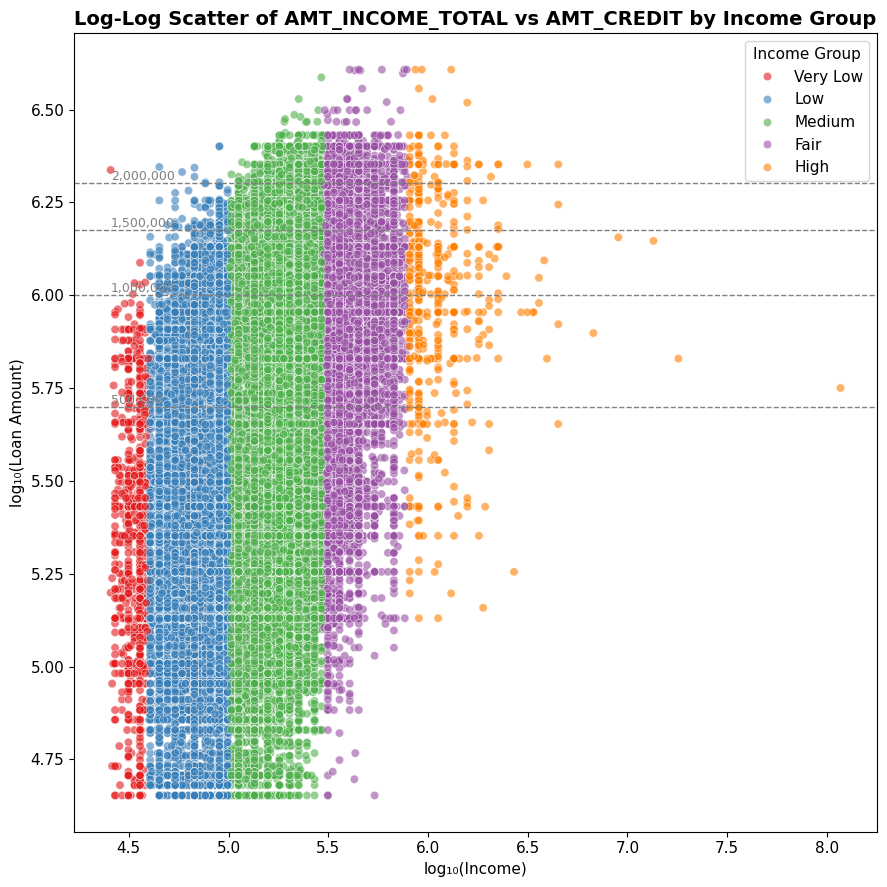

In [29]:
# @title
# ------------------------------------------------------
# Log-Log Scatterplot of AMT_INCOME_TOTAL vs AMT_CREDIT by Income Group
# ------------------------------------------------------

df_log = df[(df["AMT_CREDIT"] > 0) & (df["AMT_INCOME_TOTAL"] > 0)].copy()

income_bins = [0, 40_000, 100_000, 300_000, 800_000, np.inf]
income_labels = ["Very Low", "Low", "Medium", "Fair", "High"]
df_log["INCOME_GROUP"] = pd.cut(df_log["AMT_INCOME_TOTAL"], bins=income_bins, labels=income_labels)

df_log["LOG_CREDIT"] = np.log10(df_log["AMT_CREDIT"])
df_log["LOG_INCOME"] = np.log10(df_log["AMT_INCOME_TOTAL"])

credit_values = [500_000, 1_000_000, 1_500_000, 2_000_000]
log_credit_values = np.log10(credit_values)

plt.figure(figsize=(9, 9))
sns.scatterplot(
    data=df_log,
    x="LOG_INCOME",
    y="LOG_CREDIT",
    hue="INCOME_GROUP",
    palette="Set1",
    alpha=0.6
)

for val, log_val in zip(credit_values, log_credit_values):
    plt.axhline(y=log_val, color='gray', linestyle='--', linewidth=1)
    plt.text(
        df_log["LOG_INCOME"].min(),
        log_val,
        f"{val:,}",
        va='bottom',
        ha='left',
        fontsize=9,
        color='gray'
    )

plt.title("Log-Log Scatter of AMT_INCOME_TOTAL vs AMT_CREDIT by Income Group", fontsize=14, fontweight="bold")
plt.xlabel("log₁₀(Income)")
plt.ylabel("log₁₀(Loan Amount)")
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

In [30]:
# @title
# ------------------------------------------------------
# Analyze relationship between AMT_CREDIT and AMT_INCOME_TOTAL
# ------------------------------------------------------

# Create CREDIT vs. INCOME comparison column using vectorized np.select
conditions = [
    df["AMT_CREDIT"] < df["AMT_INCOME_TOTAL"],
    df["AMT_CREDIT"] == df["AMT_INCOME_TOTAL"],
    df["AMT_CREDIT"] > df["AMT_INCOME_TOTAL"]
]
choices = ["Credit < Income", "Credit = Income", "Credit > Income"]
df["CREDIT_VS_INCOME"] = np.select(conditions, choices, default="Unknown")

# Compute summary statistics by group
count_percent = df["CREDIT_VS_INCOME"].value_counts(normalize=True) * 100
avg_credit = df.groupby("CREDIT_VS_INCOME")["AMT_CREDIT"].mean().round(2)
sum_credit = df.groupby("CREDIT_VS_INCOME")["AMT_CREDIT"].sum().round(2)

# Assemble results table
summary = pd.DataFrame({
    "Customer Share (%)": count_percent.round(2),
    "Average Loan Amount": avg_credit,
    "Total Loan Amount": sum_credit
}).reset_index().rename(columns={"CREDIT_VS_INCOME": "Credit vs. Income Category"})

# Step 4: Print result summary
for _, row in summary.iterrows():
    print(f"✔ Category: {row['Credit vs. Income Category']}")
    print(f"   - Customer share      : {row['Customer Share (%)']:.2f}%")
    print(f"   - Average loan amount : {row['Average Loan Amount']:,.0f}")
    print(f"   - Total loan amount   : {row['Total Loan Amount']:,.0f}\n")



✔ Category: Credit < Income
   - Customer share      : 4.63%
   - Average loan amount : 168,142
   - Total loan amount   : 2,393,999,532

✔ Category: Credit = Income
   - Customer share      : 0.63%
   - Average loan amount : 214,422
   - Total loan amount   : 415,120,500

✔ Category: Credit > Income
   - Customer share      : 94.74%
   - Average loan amount : 622,643
   - Total loan amount   : 181,396,366,664



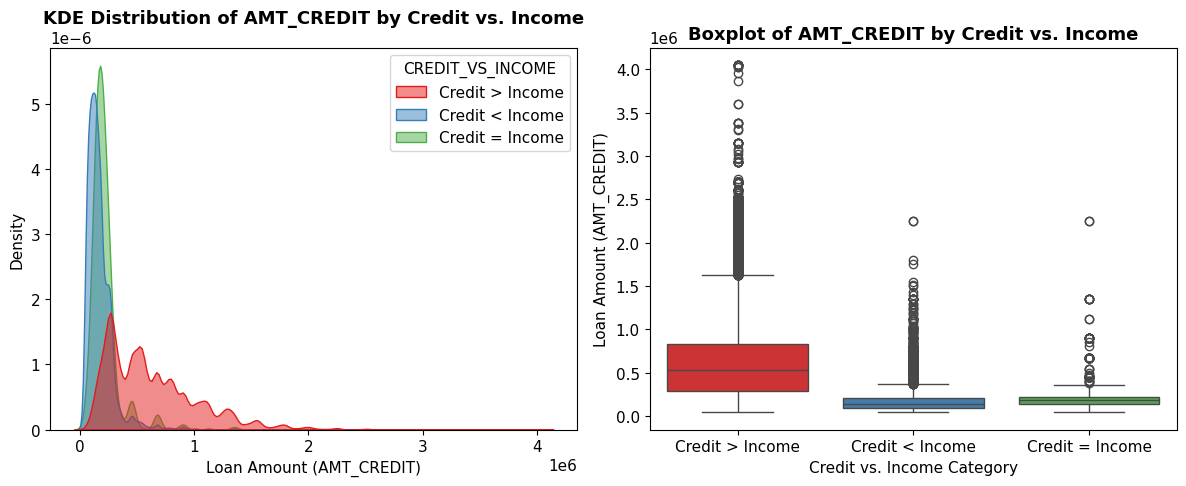

In [31]:
# @title
# ------------------------------------------------------
# KDE and Boxplot of AMT_CREDIT by CREDIT_VS_INCOME Group
# ------------------------------------------------------

# Filter only valid loan amounts
df_valid = df[df["AMT_CREDIT"] > 0]

plt.figure(figsize=(12, 5))

# KDE Plot
plt.subplot(1, 2, 1)
sns.kdeplot(
    data=df_valid,
    x="AMT_CREDIT",
    hue="CREDIT_VS_INCOME",
    fill=True,
    common_norm=False,
    palette="Set1",
    alpha=0.5
)
plt.title("KDE Distribution of AMT_CREDIT by Credit vs. Income", fontsize=13, fontweight="bold")
plt.xlabel("Loan Amount (AMT_CREDIT)")
plt.ylabel("Density")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df_valid,
    x="CREDIT_VS_INCOME",
    y="AMT_CREDIT",
    palette="Set1"
)
plt.title("Boxplot of AMT_CREDIT by Credit vs. Income", fontsize=13, fontweight="bold")
plt.xlabel("Credit vs. Income Category")
plt.ylabel("Loan Amount (AMT_CREDIT)")

plt.tight_layout()
plt.show()


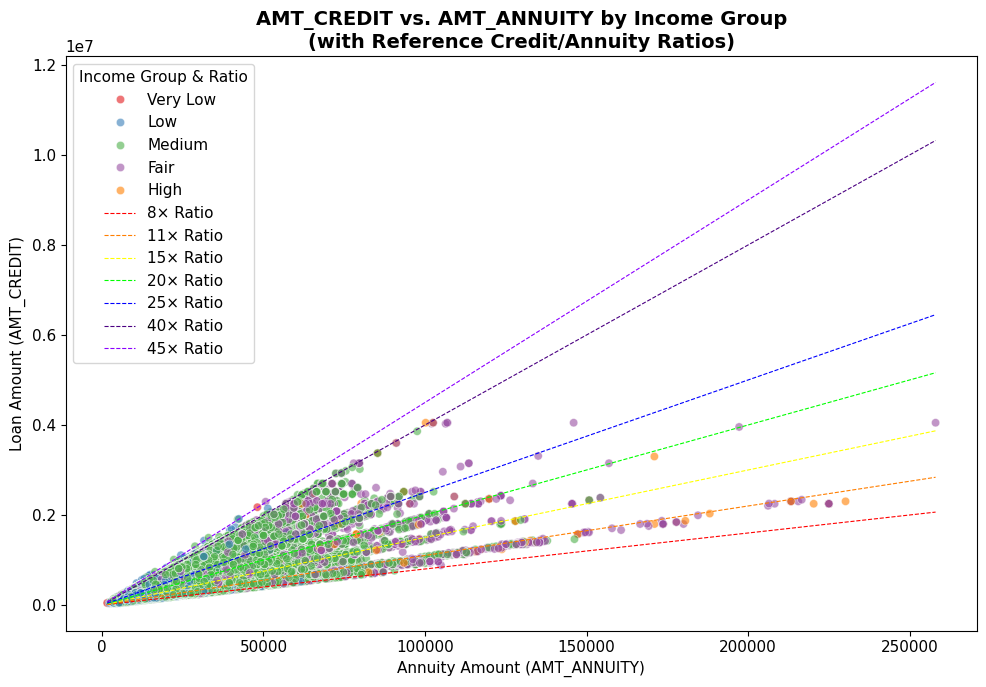

In [32]:
# @title
# ------------------------------------------------------
# Scatterplot: AMT_ANNUITY vs. AMT_CREDIT with Debt Ratio Lines
# ------------------------------------------------------

# Define ratio lines and their colors
ratios = [8, 11, 15, 20, 25, 40, 45]
ccolors = [
    '#FF0000',   # red
    '#FF7F00',   # orange
    '#FFFF00',   # yellow
    '#00FF00',   # green
    '#0000FF',   # blue
    '#4B0082',   # indigo
    '#8B00FF'    # violet
]

# Plot scatter
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x="AMT_ANNUITY",
    y="AMT_CREDIT",
    hue="INCOME_GROUP",
    palette="Set1",  # Strong, high-contrast palette
    alpha=0.6
)

# Add reference ratio lines: CREDIT = ratio × ANNUITY
x_vals = np.array([df["AMT_ANNUITY"].min(), df["AMT_ANNUITY"].max()])
for r, color in zip(ratios, ccolors):
    y_vals = r * x_vals
    plt.plot(
        x_vals, y_vals,
        linestyle='--',
        linewidth=0.8,
        color=color,
        label=f"{r}× Ratio"
    )

# Format chart
plt.title("AMT_CREDIT vs. AMT_ANNUITY by Income Group\n(with Reference Credit/Annuity Ratios)",
          fontsize=14, fontweight="bold")
plt.xlabel("Annuity Amount (AMT_ANNUITY)")
plt.ylabel("Loan Amount (AMT_CREDIT)")
plt.legend(title="Income Group & Ratio", loc="best")
plt.tight_layout()
plt.show()


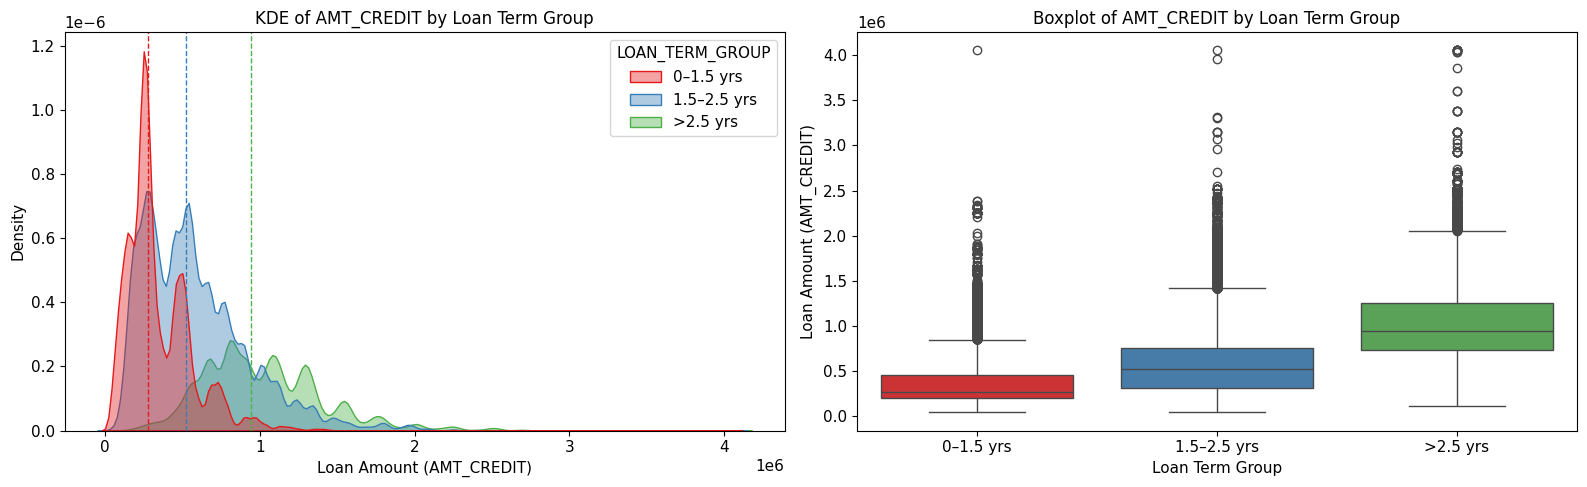

In [33]:
# @title
# ------------------------------------------------------
# KDE & Boxplot of AMT_CREDIT by Loan Term Group (with Set1 palette)
# --------

# Prepare loan term grouping
df["LOAN_TERM_MONTHS"] = df["AMT_CREDIT"] / df["AMT_ANNUITY"]
loan_term_bins = [0, 18, 30, np.inf]
loan_term_labels = ["0–1.5 yrs", "1.5–2.5 yrs", ">2.5 yrs"]
df["LOAN_TERM_GROUP"] = pd.cut(df["LOAN_TERM_MONTHS"], bins=loan_term_bins, labels=loan_term_labels)

# Set1 palette mapping
palette_set1 = sns.color_palette("Set1", n_colors=len(loan_term_labels))
color_mapping = dict(zip(loan_term_labels, palette_set1))

# Create subplot: KDE + Boxplot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# KDE plot
sns.kdeplot(
    data=df,
    x="AMT_CREDIT",
    hue="LOAN_TERM_GROUP",
    fill=True,
    alpha=0.4,
    palette=color_mapping,
    ax=axes[0]
)
axes[0].set_title("KDE of AMT_CREDIT by Loan Term Group", fontsize=12)
axes[0].set_xlabel("Loan Amount (AMT_CREDIT)")
axes[0].set_ylabel("Density")

# Add median lines to KDE
for label in loan_term_labels:
    group_data = df[df["LOAN_TERM_GROUP"] == label]
    if not group_data.empty:
        median_val = group_data["AMT_CREDIT"].median()
        axes[0].axvline(
            median_val,
            color=color_mapping[label],
            linestyle="--",
            linewidth=1,
            label=f"Median {label}"
        )

# Boxplot
sns.boxplot(
    data=df,
    x="LOAN_TERM_GROUP",
    y="AMT_CREDIT",
    palette=color_mapping,
    ax=axes[1]
)
axes[1].set_title("Boxplot of AMT_CREDIT by Loan Term Group", fontsize=12)
axes[1].set_xlabel("Loan Term Group")
axes[1].set_ylabel("Loan Amount (AMT_CREDIT)")

plt.tight_layout()
plt.show()

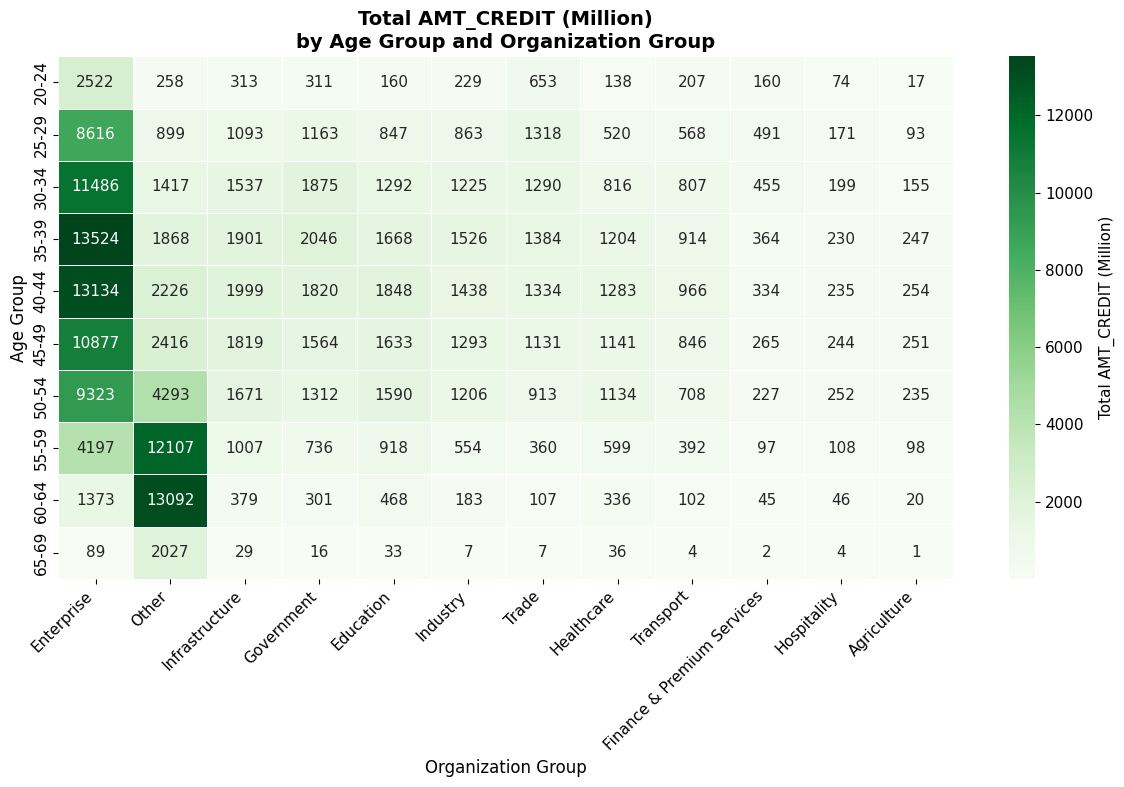

In [34]:
# @title
# ------------------------------------------------------
# Heatmap: Total AMT_CREDIT (in Million)
# by Age Group and Organization Group
# ------------------------------------------------------

# Ensure raw data is available
if df is None:
    raise ValueError("❌ DataFrame `df` is None. Please load your dataset before continuing.")

# Apply feature engineering (adds AGE_GROUP and ORG_GROUP_LOGIC)
df_fe = add_engineered_columns(df)

# Create pivot table of total AMT_CREDIT by age and organization (in million VND)
pivot_million = df_fe.pivot_table(
    index="AGE_GROUP",
    columns="ORG_GROUP_LOGIC",
    values="AMT_CREDIT",
    aggfunc="sum"
) / 1e6  # Convert to million VND

# Check if the result is valid
if pivot_million.empty:
    raise ValueError("❌ Pivot table is empty. Make sure 'AGE_GROUP' and 'ORG_GROUP_LOGIC' columns exist.")

# Round and convert to integers for clean display
pivot_million = pivot_million.round(0).astype(int)

# Sort columns (organization groups) by total descending
sorted_cols = pivot_million.sum(axis=0).sort_values(ascending=False).index
pivot_sorted = pivot_million[sorted_cols]

# Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_sorted,
    annot=True,
    fmt="g",
    cmap="Greens",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Total AMT_CREDIT (Million)"}
)

plt.title("Total AMT_CREDIT (Million)\nby Age Group and Organization Group", fontsize=14, fontweight="bold")
plt.xlabel("Organization Group", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


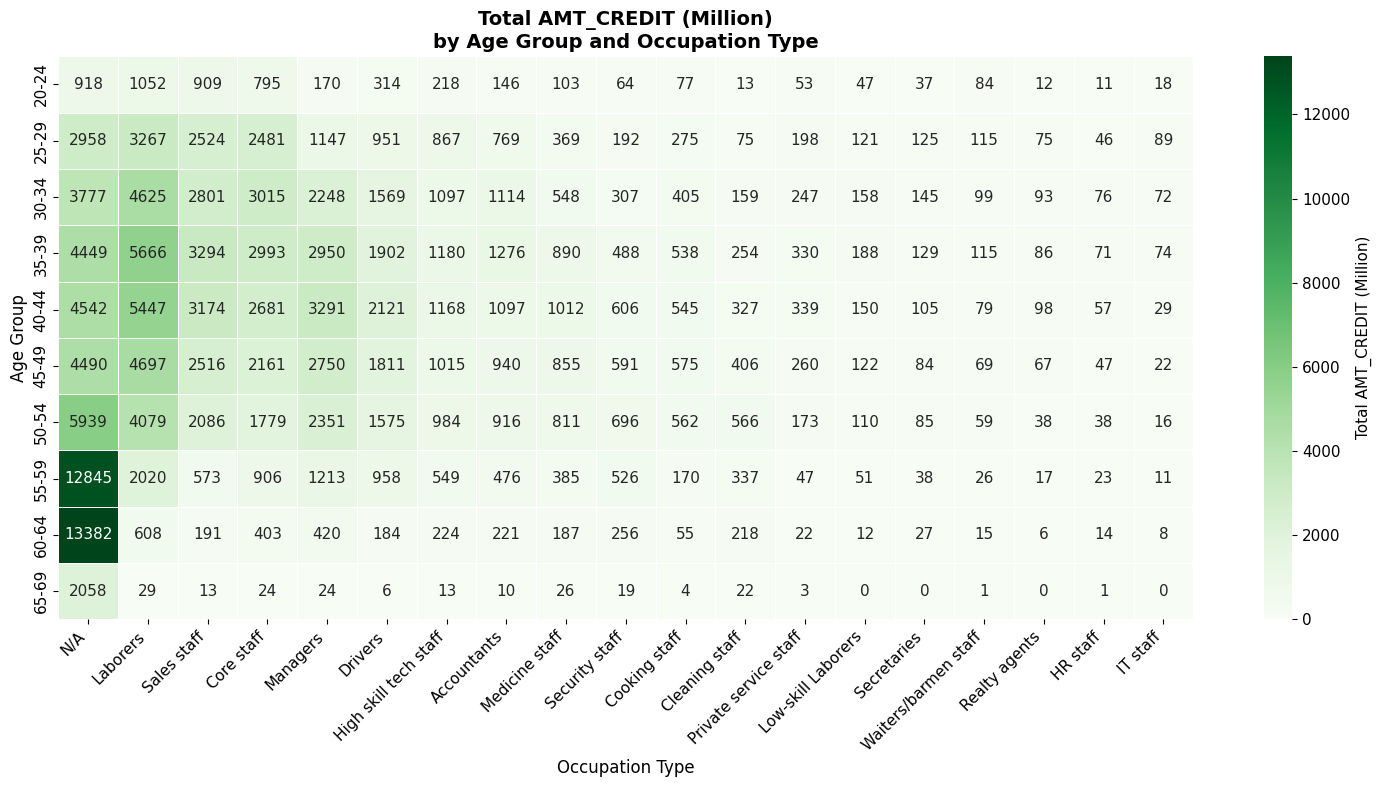

In [35]:
# @title
# ------------------------------------------------------
# Heatmap: Total AMT_CREDIT (in Million VND)
# by Age Group and Occupation Type
# ------------------------------------------------------

# Ensure input data is loaded and processed
if df is None:
    raise ValueError("❌ DataFrame `df` is None. Please load your dataset first.")

# Apply feature engineering to add AGE_GROUP (if not already present)
df_fe = add_engineered_columns(df)

# Create pivot table of total AMT_CREDIT by age and occupation (in million VND)
pivot_million = df_fe.pivot_table(
    index="AGE_GROUP",
    columns="OCCUPATION_TYPE",
    values="AMT_CREDIT",
    aggfunc="sum"
) / 1e6  # Convert to millions

# Validate pivot result
if pivot_million.empty:
    raise ValueError("❌ Pivot table is empty. Check if 'AGE_GROUP' or 'OCCUPATION_TYPE' is missing.")

# Round and format for display
pivot_million = pivot_million.round(0).astype(int)

# Sort columns (occupations) by total descending
sorted_cols = pivot_million.sum(axis=0).sort_values(ascending=False).index
pivot_sorted = pivot_million[sorted_cols]

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    pivot_sorted,
    annot=True,
    fmt="g",
    cmap="Greens",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Total AMT_CREDIT (Million)"}
)

plt.title("Total AMT_CREDIT (Million)\nby Age Group and Occupation Type", fontsize=14, fontweight="bold")
plt.xlabel("Occupation Type", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


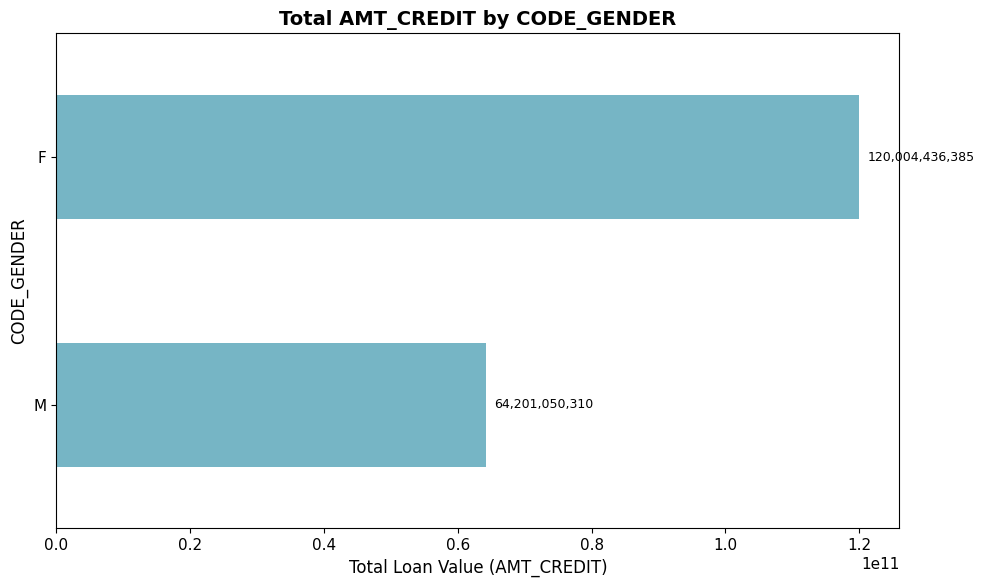

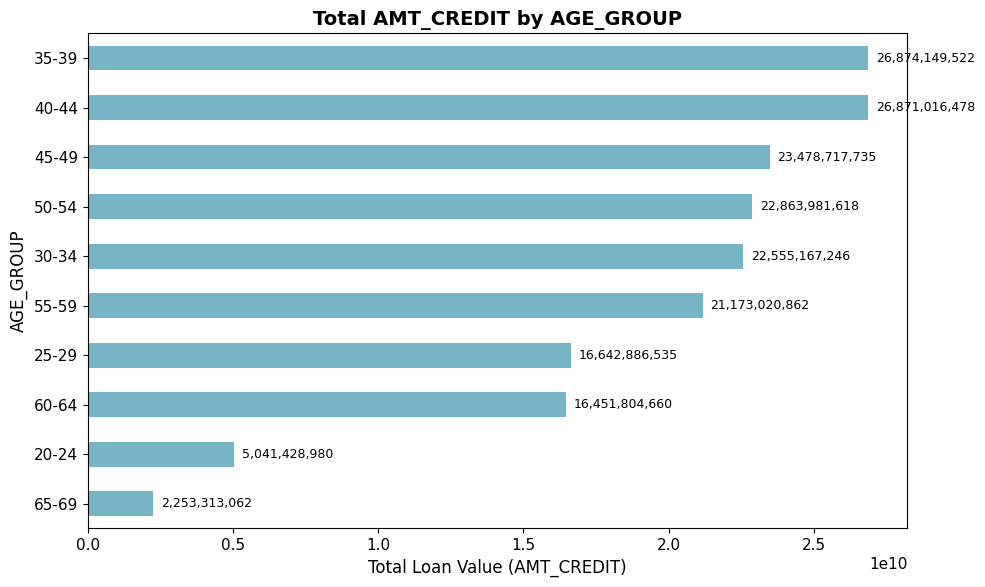

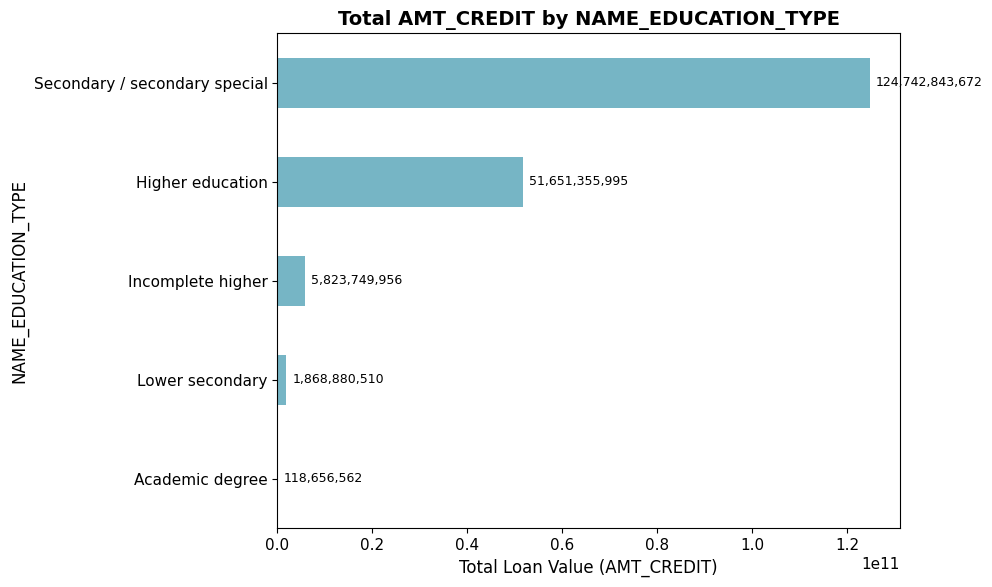

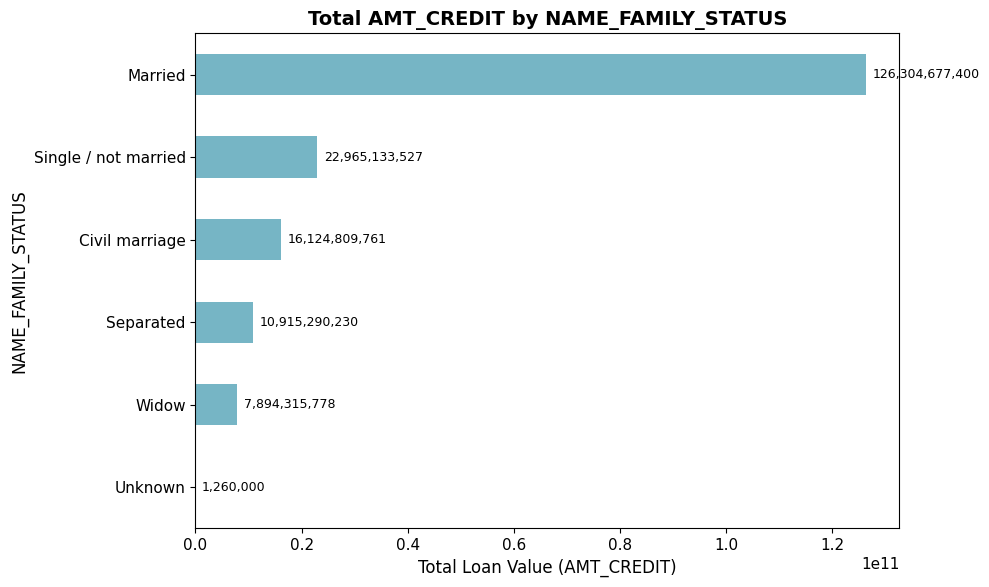

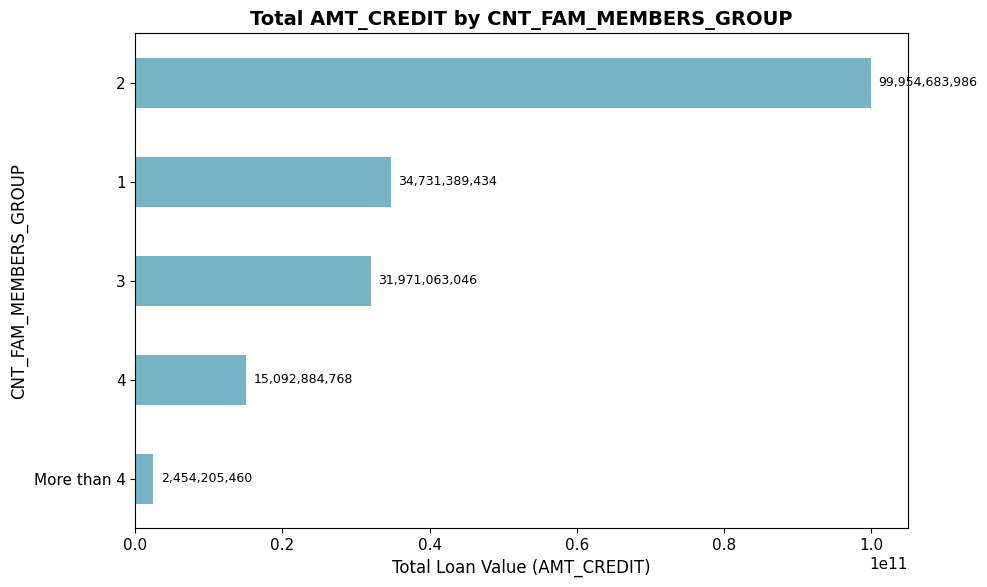

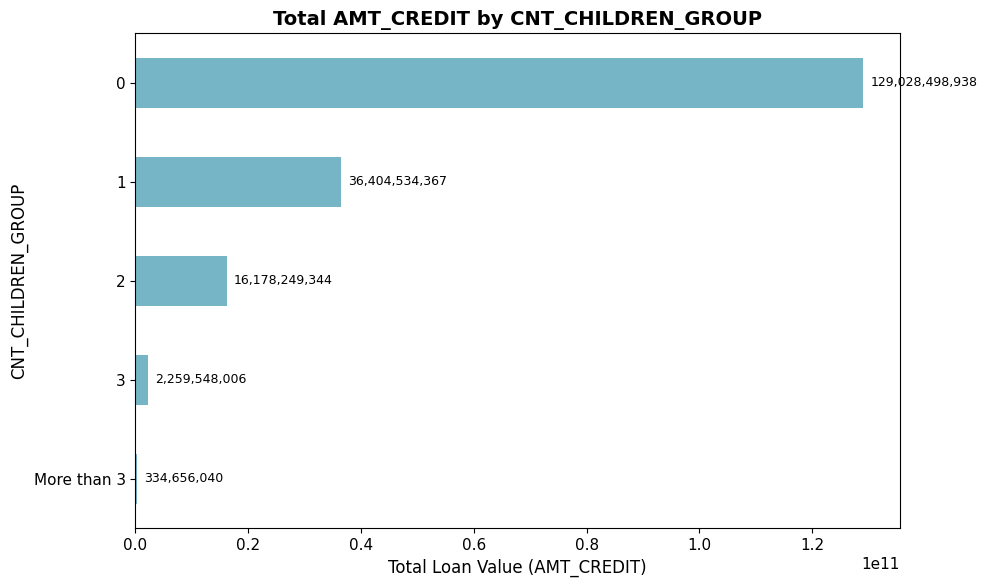

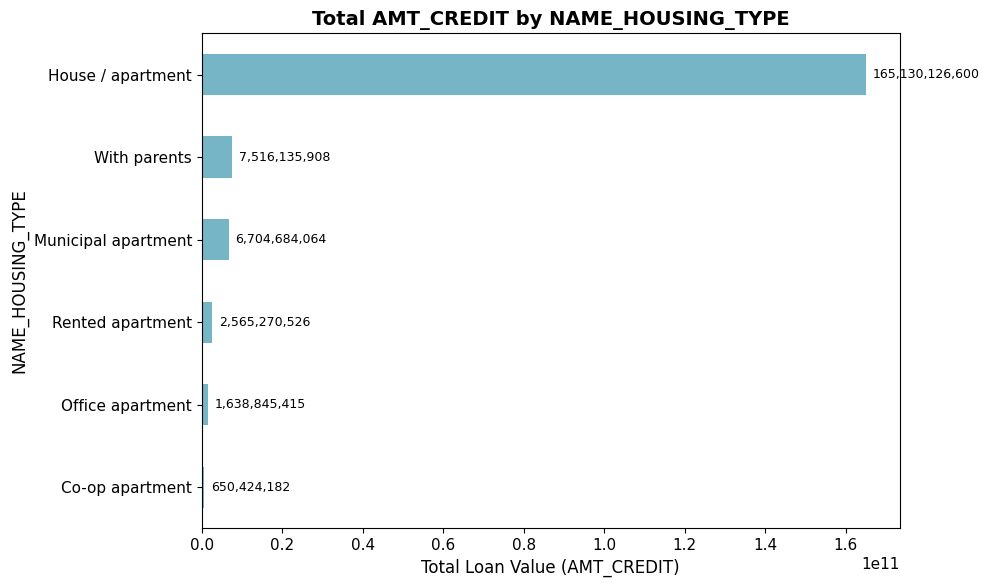

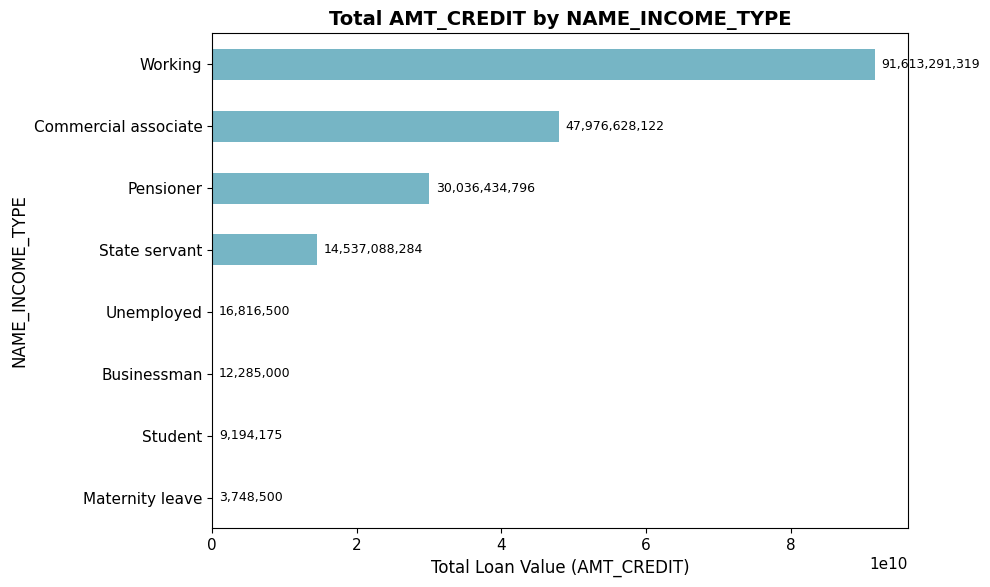

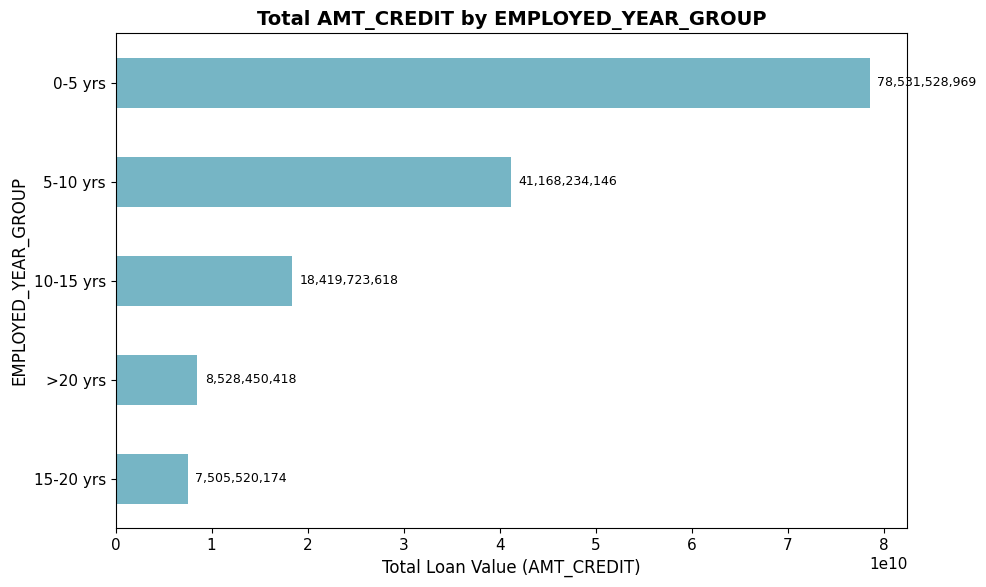

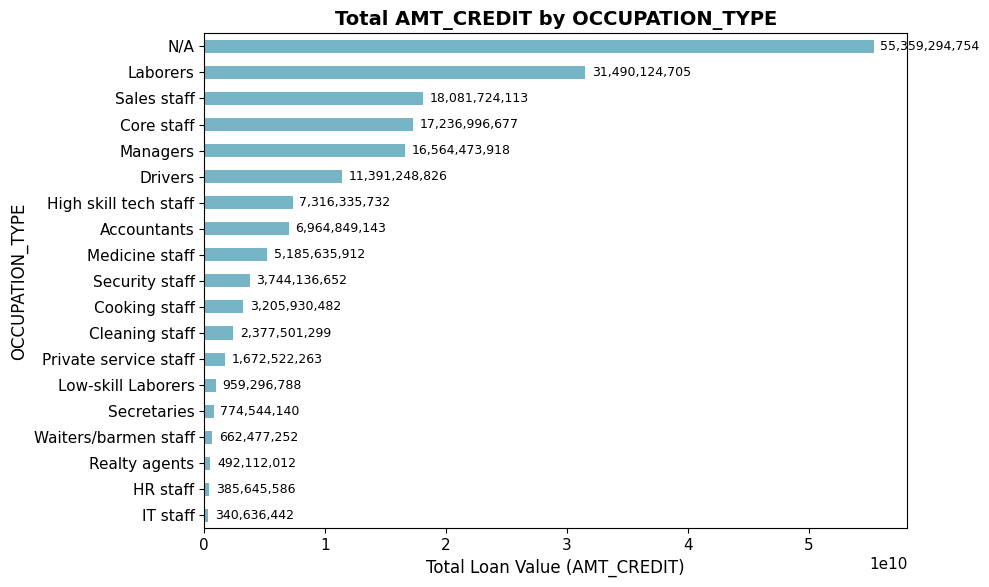

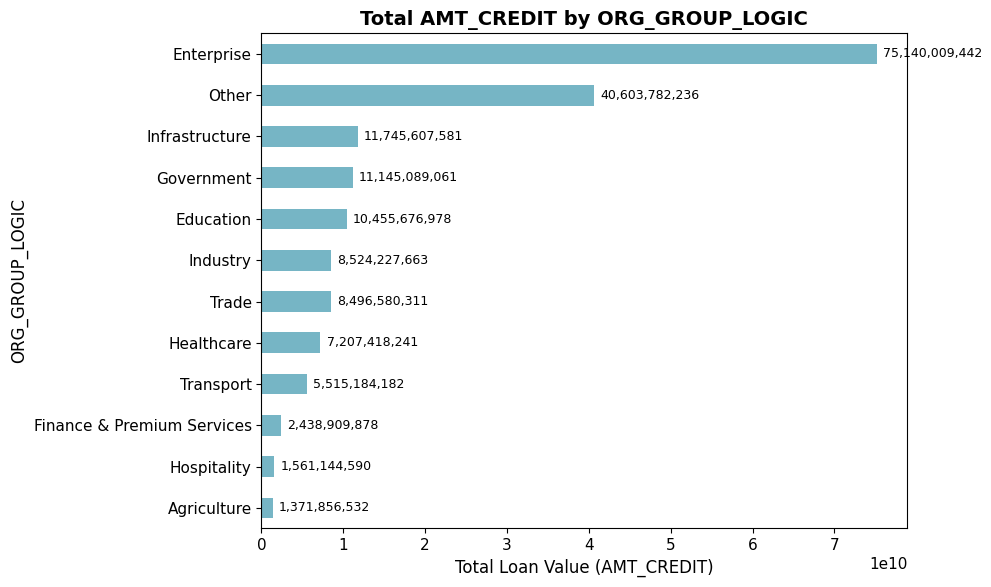

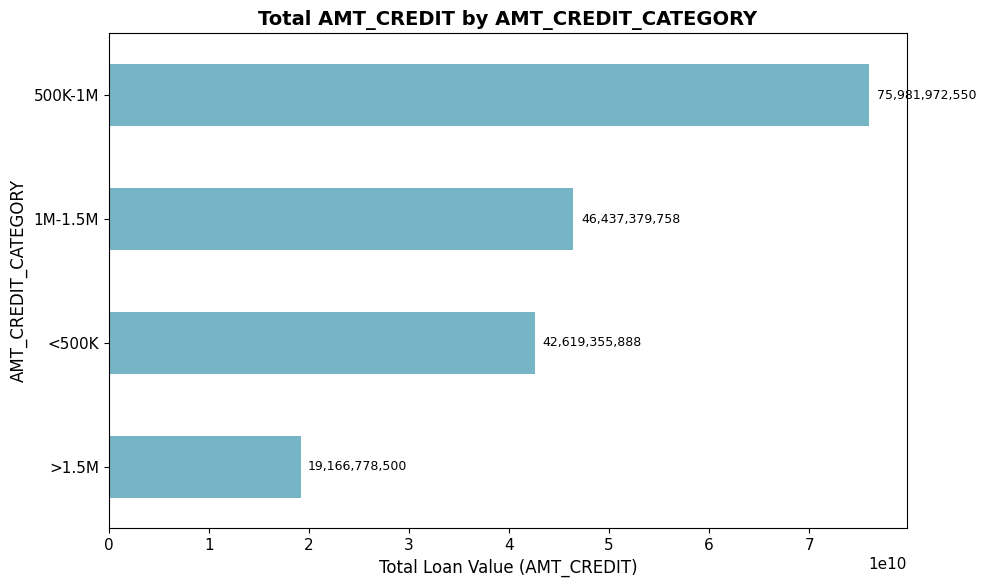

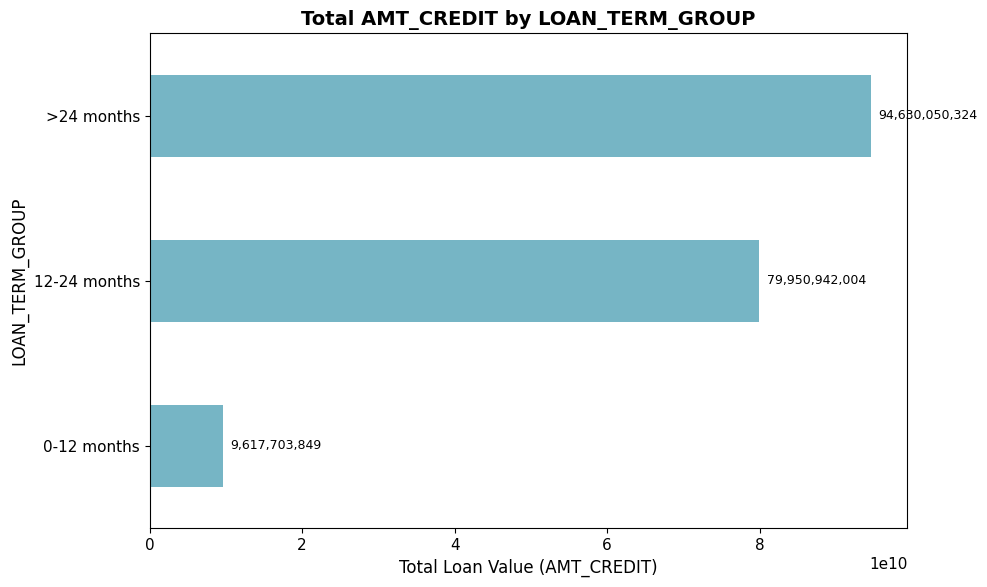

In [36]:
 # @title
# ------------------------------------------------------
# Total‑value analysis of AMT_CREDIT by categorical groups
# ------------------------------------------------------

# Apply feature engineering (includes LOAN_TERM_GROUP)
df_fe = add_engineered_columns(df)

# ------------------------------------------------------
# Function: barh chart of total AMT_CREDIT per category
# ------------------------------------------------------
def plot_amt_credit_total_by_feature(df: pd.DataFrame, feature: str) -> None:
    grouped = df.groupby(feature)["AMT_CREDIT"].sum().sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    ax = grouped.plot(kind="barh", color="#76b5c5")   # sky‑blue tone
    plt.title(f"Total AMT_CREDIT by {feature}", fontsize=14, fontweight="bold")
    plt.xlabel("Total Loan Value (AMT_CREDIT)", fontsize=12)
    plt.ylabel(feature, fontsize=12)

    for i, value in enumerate(grouped.values):
        ax.text(value + grouped.max() * 0.01, i, f"{value:,.0f}", va="center", fontsize=9)

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------
# Feature list for value analysis
# ------------------------------------------------------
value_features = [
    # Demographics
    "CODE_GENDER", "AGE_GROUP", "NAME_EDUCATION_TYPE",
    # Family / housing
    "NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS_GROUP",
    "CNT_CHILDREN_GROUP", "NAME_HOUSING_TYPE",
    # Occupation / income
    "NAME_INCOME_TYPE", "EMPLOYED_YEAR_GROUP",
    "OCCUPATION_TYPE", "ORG_GROUP_LOGIC",
    # Credit specifics
    "AMT_CREDIT_CATEGORY", "LOAN_TERM_GROUP"
]

for feat in value_features:
    plot_amt_credit_total_by_feature(df_fe, feat)


### PHÂN TÍCH RỦI RO VỠ NỢ VÀ TỔN THẤT

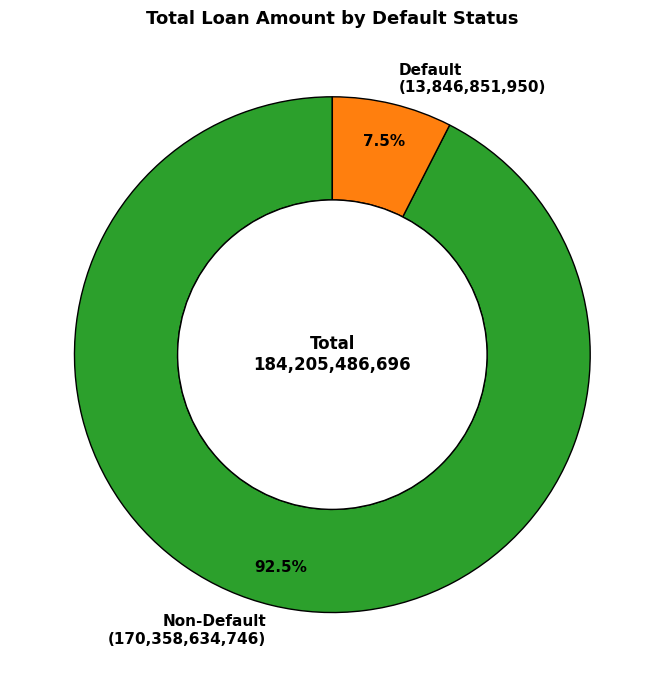

In [37]:
# @title
# ------------------------------------------------------
# Donut Chart: Total Loan Value by Default Status
# ------------------------------------------------------

default_value = df_fe[df_fe["TARGET"] == 1]["AMT_CREDIT"].sum()
non_default_value = df_fe[df_fe["TARGET"] == 0]["AMT_CREDIT"].sum()

# Data and configuration
values = [non_default_value, default_value]
labels = [
    f"Non-Default\n({non_default_value:,.0f})",
    f"Default\n({default_value:,.0f})"
]
colors = ["#2ca02c", "#ff7f0e"]

# Plotting
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={"width": 0.4, "edgecolor": "black"},
    textprops={"fontsize": 11, "fontweight": "bold"}
)

# Center circle for donut
centre_circle = plt.Circle((0, 0), 0.60, fc="white", edgecolor="black", linewidth=1)
ax.add_artist(centre_circle)

# Center label
total = sum(values)
ax.text(
    0, 0,
    f"Total\n{total:,.0f}",
    ha="center", va="center",
    fontsize=12, fontweight="bold"
)

# Title and layout
ax.set_title("Total Loan Amount by Default Status", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()


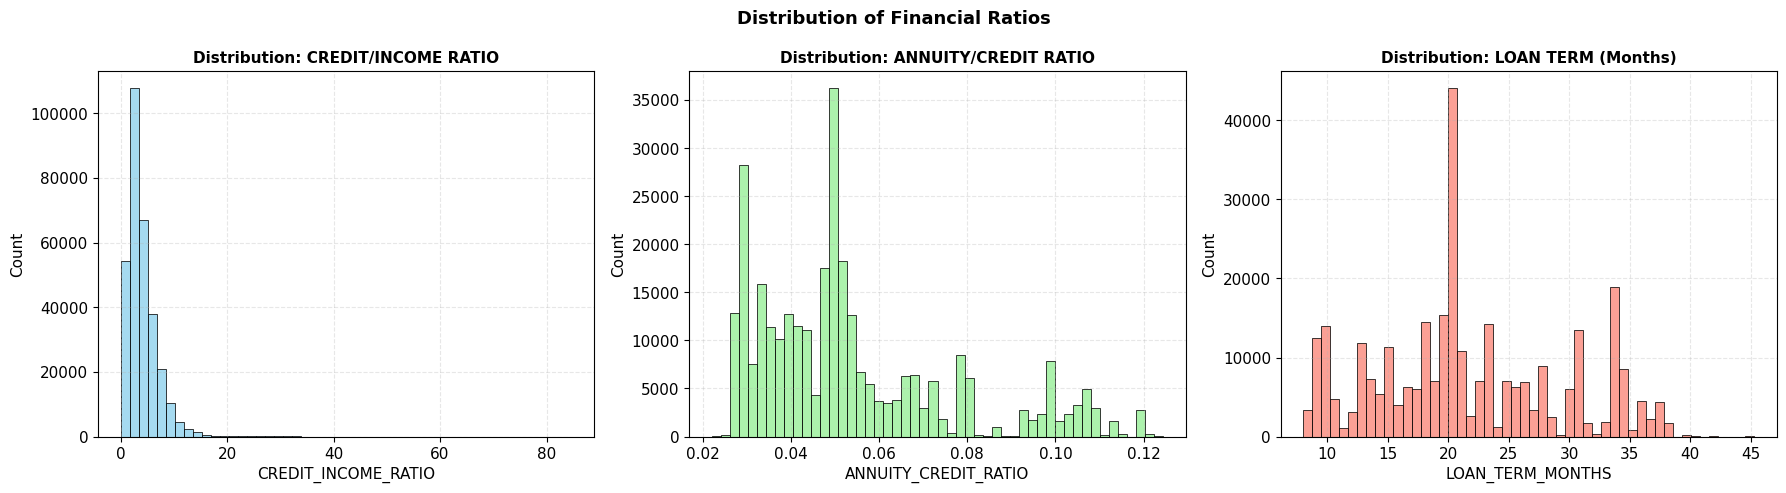

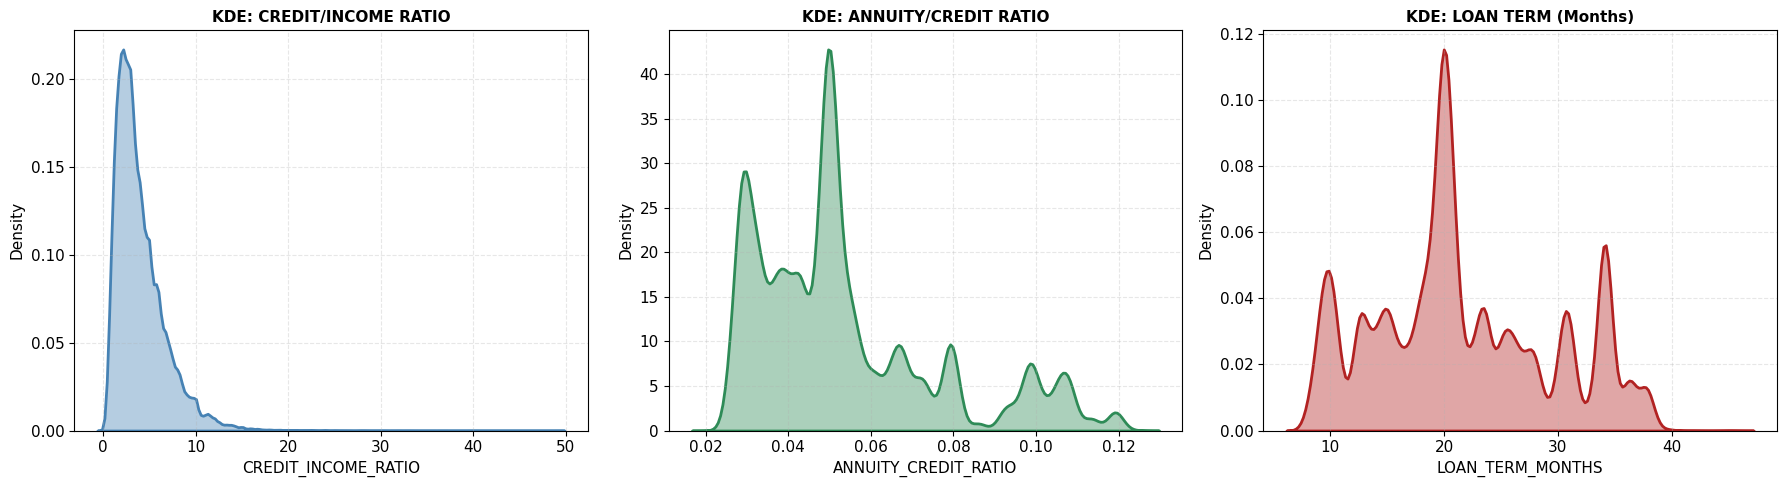

In [38]:
# @title
# ------------------------------------------------------
# Distribution & KDE of Key Financial Ratios
# ------------------------------------------------------

# Compute ratio metrics
df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
df["ANNUITY_CREDIT_RATIO"] = df["AMT_ANNUITY"] / df["AMT_CREDIT"]
df["LOAN_TERM_MONTHS"] = df["AMT_CREDIT"] / df["AMT_ANNUITY"]

# Filter valid data
df_kde = df[
    (df["CREDIT_INCOME_RATIO"].notna()) &
    (df["ANNUITY_CREDIT_RATIO"].notna()) &
    (df["LOAN_TERM_MONTHS"].notna()) &
    (df["CREDIT_INCOME_RATIO"] < 80) &
    (df["ANNUITY_CREDIT_RATIO"] < 0.2) &
    (df["LOAN_TERM_MONTHS"] < 600)
].copy()



# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["CREDIT_INCOME_RATIO"].dropna(), bins=50, color="skyblue", ax=axes[0])
axes[0].set_title("Distribution: CREDIT/INCOME RATIO", fontsize=11, fontweight="bold")
axes[0].set_xlabel("CREDIT_INCOME_RATIO")
axes[0].grid(True, linestyle="--", alpha=0.3)

sns.histplot(df["ANNUITY_CREDIT_RATIO"].dropna(), bins=50, color="lightgreen", ax=axes[1])
axes[1].set_title("Distribution: ANNUITY/CREDIT RATIO", fontsize=11, fontweight="bold")
axes[1].set_xlabel("ANNUITY_CREDIT_RATIO")
axes[1].grid(True, linestyle="--", alpha=0.3)

sns.histplot(df["LOAN_TERM_MONTHS"].dropna(), bins=50, color="salmon", ax=axes[2])
axes[2].set_title("Distribution: LOAN TERM (Months)", fontsize=11, fontweight="bold")
axes[2].set_xlabel("LOAN_TERM_MONTHS")
axes[2].grid(True, linestyle="--", alpha=0.3)

plt.suptitle("Distribution of Financial Ratios", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

# Plot KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(data=df_kde, x="CREDIT_INCOME_RATIO", fill=True, color="steelblue", linewidth=2, alpha=0.4, ax=axes[0])
axes[0].set_title("KDE: CREDIT/INCOME RATIO", fontsize=11, fontweight="bold")
axes[0].set_xlabel("CREDIT_INCOME_RATIO")
axes[0].grid(True, linestyle="--", alpha=0.3)

sns.kdeplot(data=df_kde, x="ANNUITY_CREDIT_RATIO", fill=True, color="seagreen", linewidth=2, alpha=0.4, ax=axes[1])
axes[1].set_title("KDE: ANNUITY/CREDIT RATIO", fontsize=11, fontweight="bold")
axes[1].set_xlabel("ANNUITY_CREDIT_RATIO")
axes[1].grid(True, linestyle="--", alpha=0.3)

sns.kdeplot(data=df_kde, x="LOAN_TERM_MONTHS", fill=True, color="firebrick", linewidth=2, alpha=0.4, ax=axes[2])
axes[2].set_title("KDE: LOAN TERM (Months)", fontsize=11, fontweight="bold")
axes[2].set_xlabel("LOAN_TERM_MONTHS")
axes[2].grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


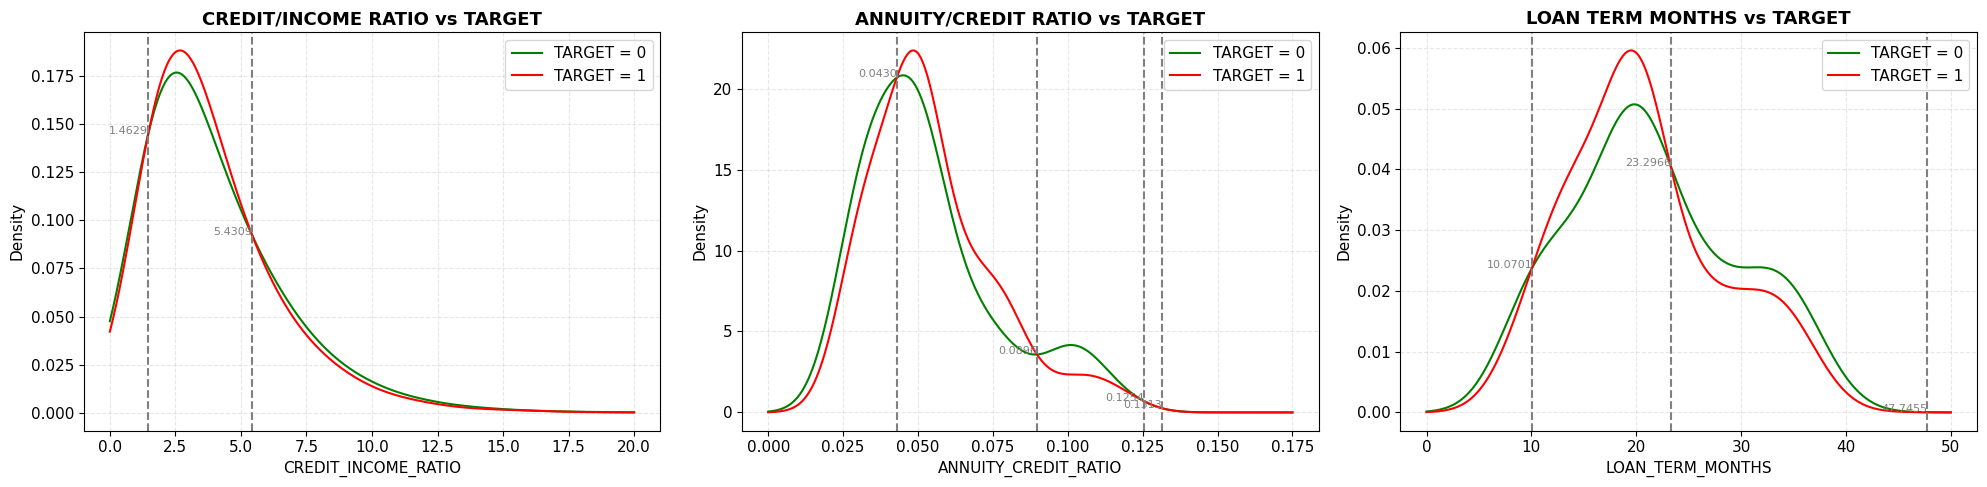


📊 CREDIT_INCOME_RATIO segmentation:
🟢 Low:
   - Range              : < 1.4629
   - Default Rate       : 7.08%
   - Customers          : 38,929
   - Default Exposure   : 609,145,438
🟡 Medium:
   - Range              : 1.4629 → 5.4309
   - Default Rate       : 8.54%
   - Customers          : 198,078
   - Default Exposure   : 8,491,452,574
🔴 High:
   - Range              : > 5.4309
   - Default Rate       : 7.3%
   - Customers          : 70,488
   - Default Exposure   : 4,746,253,936
💥 Total Default Exposure: 13,846,851,950

📊 ANNUITY_CREDIT_RATIO segmentation:
🟢 Low:
   - Range              : < 0.0430
   - Default Rate       : 6.39%
   - Customers          : 114,971
   - Default Exposure   : 6,566,045,242
🟡 Medium:
   - Range              : 0.0430 → 0.0896
   - Default Rate       : 9.92%
   - Customers          : 157,902
   - Default Exposure   : 6,802,560,878
🔴 High:
   - Range              : > 0.0896
   - Default Rate       : 5.28%
   - Customers          : 34,622
   - Default Exposur

In [39]:
# @title
# ------------------------------------------------------
# KDE-based Default Risk Segmentation by Ratio Metrics
# ------------------------------------------------------

# Compute ratio metrics
df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
df["ANNUITY_CREDIT_RATIO"] = df["AMT_ANNUITY"] / df["AMT_CREDIT"]
df["LOAN_TERM_MONTHS"] = df["AMT_CREDIT"] / df["AMT_ANNUITY"]

# Filter valid observations
df_valid = df[
    df["TARGET"].isin([0, 1]) &
    df["CREDIT_INCOME_RATIO"].notna() &
    df["ANNUITY_CREDIT_RATIO"].notna() &
    df["LOAN_TERM_MONTHS"].notna()
].copy()

# KDE-based segmentation function
def kde_target_analysis(data, col, title, xlim):
    r0 = data[data["TARGET"] == 0][col]
    r1 = data[data["TARGET"] == 1][col]
    kde0 = gaussian_kde(r0, bw_method=0.4)
    kde1 = gaussian_kde(r1, bw_method=0.4)

    x_vals = np.linspace(xlim[0], xlim[1], 500)
    y0, y1 = kde0(x_vals), kde1(x_vals)
    diff = y0 - y1
    sign_change = np.where(np.diff(np.sign(diff)))[0]
    intersections = [(x_vals[i] + x_vals[i + 1]) / 2 for i in sign_change]

    x1 = intersections[0] if len(intersections) > 0 else xlim[0] + (xlim[1] - xlim[0]) * 0.33
    x2 = intersections[1] if len(intersections) > 1 else xlim[0] + (xlim[1] - xlim[0]) * 0.66

    low = data[data[col] < x1]
    medium = data[(data[col] >= x1) & (data[col] <= x2)]
    high = data[data[col] > x2]

    def calc_stats(d):
        rate = round(d["TARGET"].mean() * 100, 2)
        count = len(d)
        exposure = d[d["TARGET"] == 1]["AMT_CREDIT"].sum()
        return rate, count, exposure

    a_rate, a_count, a_amt = calc_stats(low)
    b_rate, b_count, b_amt = calc_stats(medium)
    c_rate, c_count, c_amt = calc_stats(high)
    total_amt = data[data["TARGET"] == 1]["AMT_CREDIT"].sum()

    # KDE plot
    plt.plot(x_vals, y0, label="TARGET = 0", color="green")
    plt.plot(x_vals, y1, label="TARGET = 1", color="red")
    for x in intersections:
        plt.axvline(x, color='gray', linestyle='--')
        plt.text(x, max(kde0(x), kde1(x)), f"{x:.4f}", ha='right', fontsize=8, color="gray")
    plt.title(title, fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)

    return {
        "thresholds": (x1, x2),
        "segments": {
            "🟢 Low": {
                "rate": a_rate,
                "count": a_count,
                "exposure": a_amt,
                "range": (float("-inf"), x1)
            },
            "🟡 Medium": {
                "rate": b_rate,
                "count": b_count,
                "exposure": b_amt,
                "range": (x1, x2)
            },
            "🔴 High": {
                "rate": c_rate,
                "count": c_count,
                "exposure": c_amt,
                "range": (x2, float("inf"))
            }
        },
        "total_exposure": total_amt
    }

# Ratio metrics configuration
kde_configs = [
    ("CREDIT_INCOME_RATIO", "CREDIT/INCOME RATIO vs TARGET", (0, 20)),
    ("ANNUITY_CREDIT_RATIO", "ANNUITY/CREDIT RATIO vs TARGET", (0, 0.175)),
    ("LOAN_TERM_MONTHS", "LOAN TERM MONTHS vs TARGET", (0, 50))
]

# Perform segmentation & plot
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
results = {}
for ax, (col, title, xlim) in zip(axes, kde_configs):
    plt.sca(ax)
    res = kde_target_analysis(df_valid, col, title, xlim)
    results[col] = res

plt.tight_layout()
plt.show()

# Print results
for col, res in results.items():
    x1, x2 = res["thresholds"]
    print(f"\n📊 {col} segmentation:")
    for label, info in res["segments"].items():
        rmin, rmax = info["range"]
        range_str = f"{rmin:.4f} → {rmax:.4f}" if rmin != float("-inf") and rmax != float("inf") else \
                    f"< {rmax:.4f}" if rmin == float("-inf") else f"> {rmin:.4f}"
        print(f"{label}:")
        print(f"   - Range              : {range_str}")
        print(f"   - Default Rate       : {info['rate']}%")
        print(f"   - Customers          : {info['count']:,}")
        print(f"   - Default Exposure   : {info['exposure']:,.0f}")
    print(f"💥 Total Default Exposure: {res['total_exposure']:,.0f}")


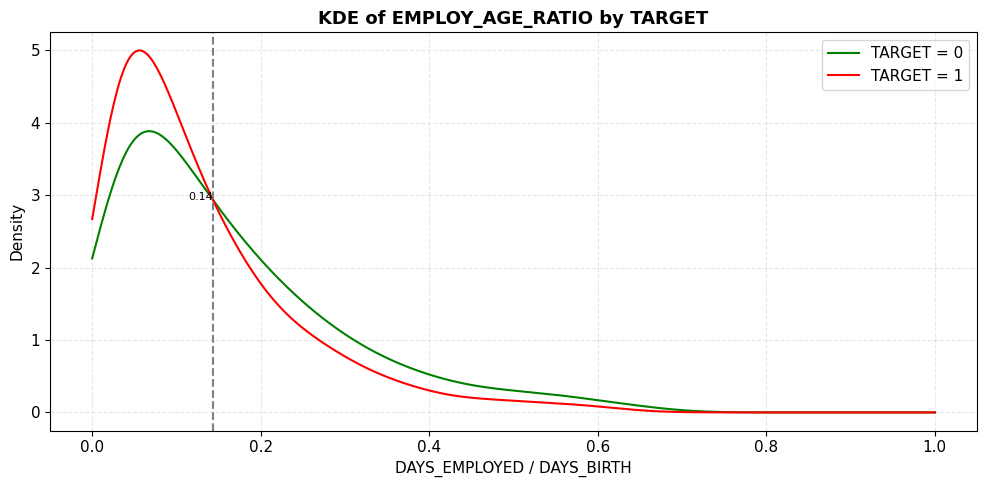


📊 EMPLOY_AGE_RATIO segmentation:
🟢 Low:
   - Range              : < 0.1433
   - Default Rate       : 10.15%
   - Customers          : 144,916
   - Default Exposure   : 7,969,271,067
🟡 Medium:
   - Range              : 0.1433 → 0.6600
   - Default Rate       : 6.67%
   - Customers          : 106,822
   - Default Exposure   : 4,205,907,688
🔴 High:
   - Range              : > 0.6600
   - Default Rate       : 0.76%
   - Customers          : 395
   - Default Exposure   : 2,588,409
💥 Total Default Exposure: 12,177,767,164


In [40]:
# @title
# Prepare and clean data
df["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)
df["EMPLOY_AGE_RATIO"] = df["DAYS_EMPLOYED"].abs() / df["DAYS_BIRTH"].abs()

# Filter valid range
df_ratio = df[
    df["EMPLOY_AGE_RATIO"].between(0, 1) &
    df["EMPLOY_AGE_RATIO"].notna() &
    df["TARGET"].isin([0, 1])
].copy()

# KDE by TARGET
r0 = df_ratio[df_ratio["TARGET"] == 0]["EMPLOY_AGE_RATIO"]
r1 = df_ratio[df_ratio["TARGET"] == 1]["EMPLOY_AGE_RATIO"]
kde0 = gaussian_kde(r0, bw_method=0.3)
kde1 = gaussian_kde(r1, bw_method=0.3)

x_vals = np.linspace(0, 1, 500)
y0, y1 = kde0(x_vals), kde1(x_vals)
diff = y0 - y1
sign_change = np.where(np.diff(np.sign(diff)))[0]
cuts = [(x_vals[i] + x_vals[i + 1]) / 2 for i in sign_change]

x1 = cuts[0] if len(cuts) > 0 else 0.33
x2 = cuts[1] if len(cuts) > 1 else 0.66

# Region segmentation
def calc_segment(subset):
    rate = round(subset["TARGET"].mean() * 100, 2)
    count = len(subset)
    exposure = subset[subset["TARGET"] == 1]["AMT_CREDIT"].sum()
    return rate, count, exposure

low = df_ratio[df_ratio["EMPLOY_AGE_RATIO"] < x1]
medium = df_ratio[(df_ratio["EMPLOY_AGE_RATIO"] >= x1) & (df_ratio["EMPLOY_AGE_RATIO"] <= x2)]
high = df_ratio[df_ratio["EMPLOY_AGE_RATIO"] > x2]

a_rate, a_count, a_amt = calc_segment(low)
b_rate, b_count, b_amt = calc_segment(medium)
c_rate, c_count, c_amt = calc_segment(high)
total_amt = df_ratio[df_ratio["TARGET"] == 1]["AMT_CREDIT"].sum()

# Plot KDE
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y0, label="TARGET = 0", color="green")
plt.plot(x_vals, y1, label="TARGET = 1", color="red")
for c in cuts:
    plt.axvline(c, color="gray", linestyle="--")
    plt.text(c, max(kde0([c])[0], kde1([c])[0]), f"{c:.2f}", ha="right", fontsize=8)
plt.title("KDE of EMPLOY_AGE_RATIO by TARGET", fontsize=13, fontweight="bold")
plt.xlabel("DAYS_EMPLOYED / DAYS_BIRTH")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Format result
results = {
    "EMPLOY_AGE_RATIO": {
        "thresholds": (x1, x2),
        "segments": {
            "🟢 Low": {
                "rate": a_rate,
                "count": a_count,
                "exposure": a_amt,
                "range": (float("-inf"), x1)
            },
            "🟡 Medium": {
                "rate": b_rate,
                "count": b_count,
                "exposure": b_amt,
                "range": (x1, x2)
            },
            "🔴 High": {
                "rate": c_rate,
                "count": c_count,
                "exposure": c_amt,
                "range": (x2, float("inf"))
            },
        },
        "total_exposure": total_amt
    }
}

# Print formatted output
for col, res in results.items():
    x1, x2 = res["thresholds"]
    print(f"\n📊 {col} segmentation:")
    for label, info in res["segments"].items():
        rmin, rmax = info["range"]
        range_str = (
            f"{rmin:.4f} → {rmax:.4f}" if rmin != float("-inf") and rmax != float("inf")
            else f"< {rmax:.4f}" if rmin == float("-inf")
            else f"> {rmin:.4f}"
        )
        print(f"{label}:")
        print(f"   - Range              : {range_str}")
        print(f"   - Default Rate       : {info['rate']}%")
        print(f"   - Customers          : {info['count']:,}")
        print(f"   - Default Exposure   : {info['exposure']:,.0f}")
    print(f"💥 Total Default Exposure: {res['total_exposure']:,.0f}")


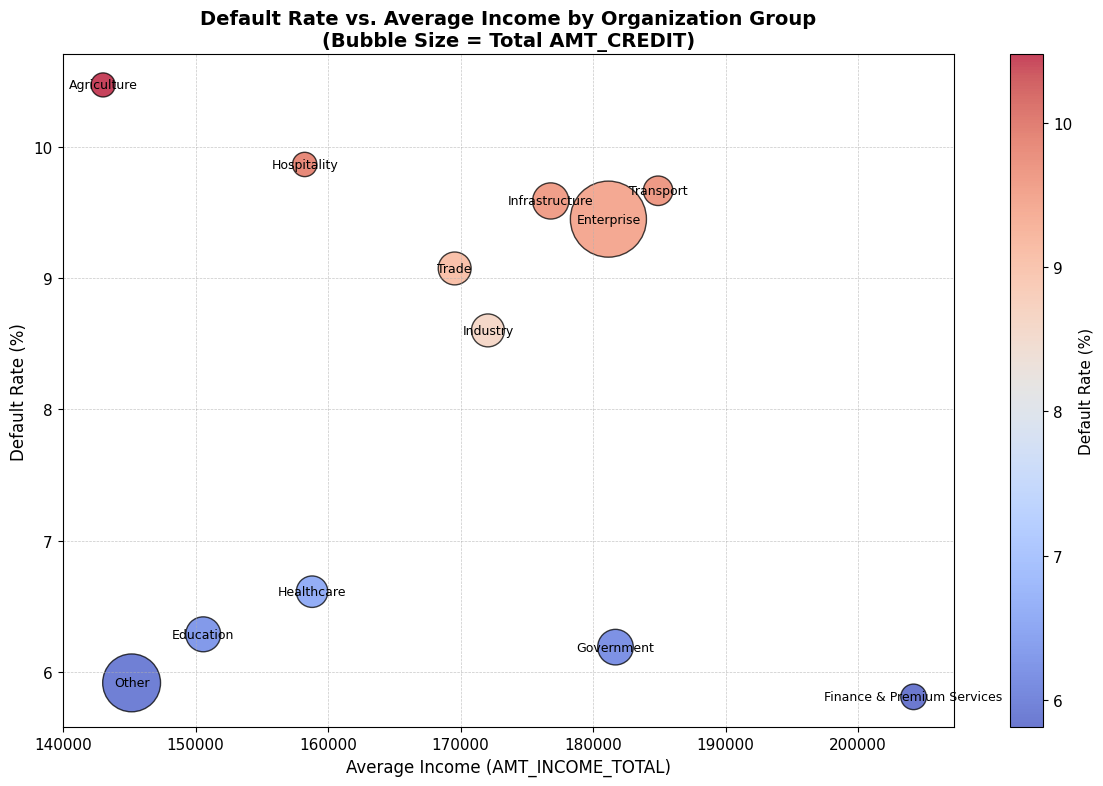

In [41]:
# @title
# ------------------------------------------------------
# Scatter Plot: Risk vs. Income by Organization Group
# ------------------------------------------------------

# Ensure feature-engineered columns exist
df_fe = add_engineered_columns(df)

# Compute statistics by organization group
org_stats = df_fe.groupby("ORG_GROUP_LOGIC").agg({
    "TARGET": "mean",
    "AMT_INCOME_TOTAL": "mean",
    "AMT_CREDIT": "sum"
})
org_stats["RiskPercent"] = org_stats["TARGET"] * 100

# Normalize AMT_CREDIT to scale bubble sizes
min_size = 300
max_size = 3000
credit_norm = (org_stats["AMT_CREDIT"] - org_stats["AMT_CREDIT"].min()) / \
              (org_stats["AMT_CREDIT"].max() - org_stats["AMT_CREDIT"].min())
sizes = credit_norm * (max_size - min_size) + min_size

# Plot scatter
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    org_stats["AMT_INCOME_TOTAL"],
    org_stats["RiskPercent"],
    s=sizes,
    c=org_stats["RiskPercent"],
    cmap="coolwarm",
    alpha=0.75,
    edgecolors="black"
)

# Add text labels at each point
for idx, row in org_stats.iterrows():
    plt.text(
        row["AMT_INCOME_TOTAL"],
        row["RiskPercent"],
        idx,
        fontsize=9,
        ha="center",
        va="center"
    )

# Axis labels and title
plt.xlabel("Average Income (AMT_INCOME_TOTAL)", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.title("Default Rate vs. Average Income by Organization Group\n(Bubble Size = Total AMT_CREDIT)", fontsize=14, fontweight="bold")

# Add colorbar and grid
plt.colorbar(scatter, label="Default Rate (%)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

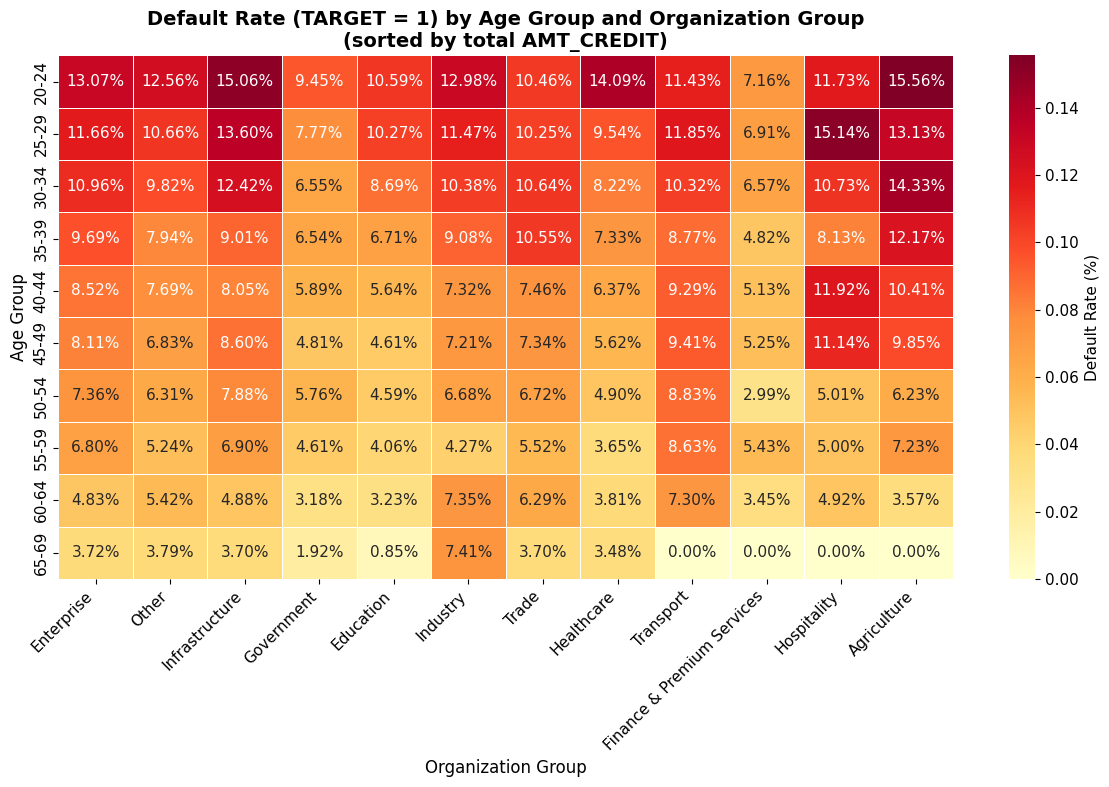

In [42]:
# @title
# ------------------------------------------------------
# Heatmap: Default Rate (TARGET = 1)
# by Age Group and Organization Group
# ------------------------------------------------------

# Ensure feature columns exist
df_fe = add_engineered_columns(df)

# Pivot table: mean default rate (TARGET) by age and organization
pivot_target = df_fe.pivot_table(
    index="AGE_GROUP",
    columns="ORG_GROUP_LOGIC",
    values="TARGET",
    aggfunc="mean"
)

# Sort columns by total AMT_CREDIT descending
pivot_credit = df_fe.pivot_table(
    index="AGE_GROUP",
    columns="ORG_GROUP_LOGIC",
    values="AMT_CREDIT",
    aggfunc="sum"
)
sorted_cols = pivot_credit.sum().sort_values(ascending=False).index
pivot_target_sorted = pivot_target[sorted_cols]

# Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_target_sorted,
    annot=True,
    fmt=".2%",
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Default Rate (%)"}
)

plt.title("Default Rate (TARGET = 1) by Age Group and Organization Group\n(sorted by total AMT_CREDIT)", fontsize=14, fontweight="bold")
plt.xlabel("Organization Group", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


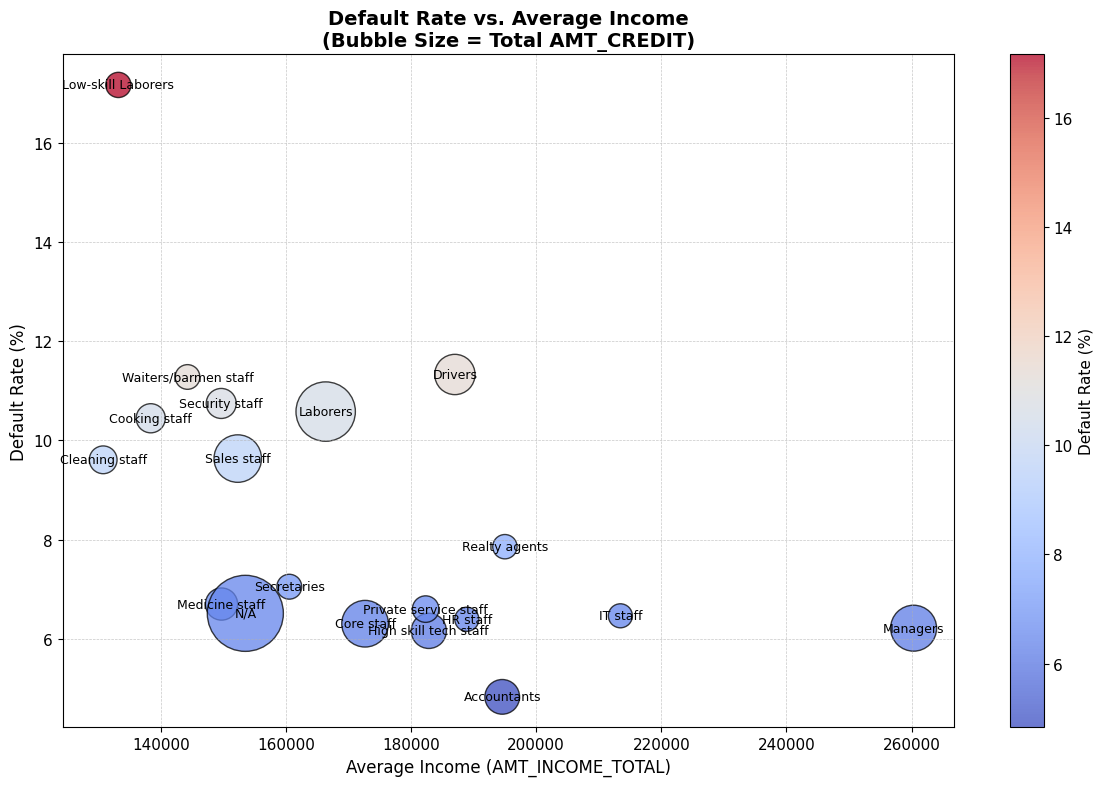

In [43]:
# @title
# ------------------------------------------------------
# Compute occupation-level statistics
# ------------------------------------------------------
occupation_stats = df.groupby("OCCUPATION_TYPE").agg({
    "TARGET": "mean",
    "AMT_INCOME_TOTAL": "mean",
    "AMT_CREDIT": "sum"
})
occupation_stats["RiskPercent"] = occupation_stats["TARGET"] * 100

# Normalize total AMT_CREDIT to scale the bubble sizes
min_size = 300
max_size = 3000
credit_norm = (occupation_stats["AMT_CREDIT"] - occupation_stats["AMT_CREDIT"].min()) / (
    occupation_stats["AMT_CREDIT"].max() - occupation_stats["AMT_CREDIT"].min()
)
sizes = credit_norm * (max_size - min_size) + min_size

# ------------------------------------------------------
# Scatter plot: Default Rate vs. Average Income by Occupation
# (Bubble size represents total AMT_CREDIT)
# ------------------------------------------------------
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    occupation_stats["AMT_INCOME_TOTAL"],
    occupation_stats["RiskPercent"],
    s=sizes,
    c=occupation_stats["RiskPercent"],
    cmap="coolwarm",
    alpha=0.75,
    edgecolors="black"
)

# Annotate each point with the occupation label
for idx, row in occupation_stats.iterrows():
    plt.text(
        row["AMT_INCOME_TOTAL"],
        row["RiskPercent"],
        idx,
        fontsize=9,
        ha="center",
        va="center"
    )

plt.xlabel("Average Income (AMT_INCOME_TOTAL)", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.title("Default Rate vs. Average Income\n(Bubble Size = Total AMT_CREDIT)", fontsize=14, fontweight="bold")
plt.colorbar(scatter, label="Default Rate (%)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


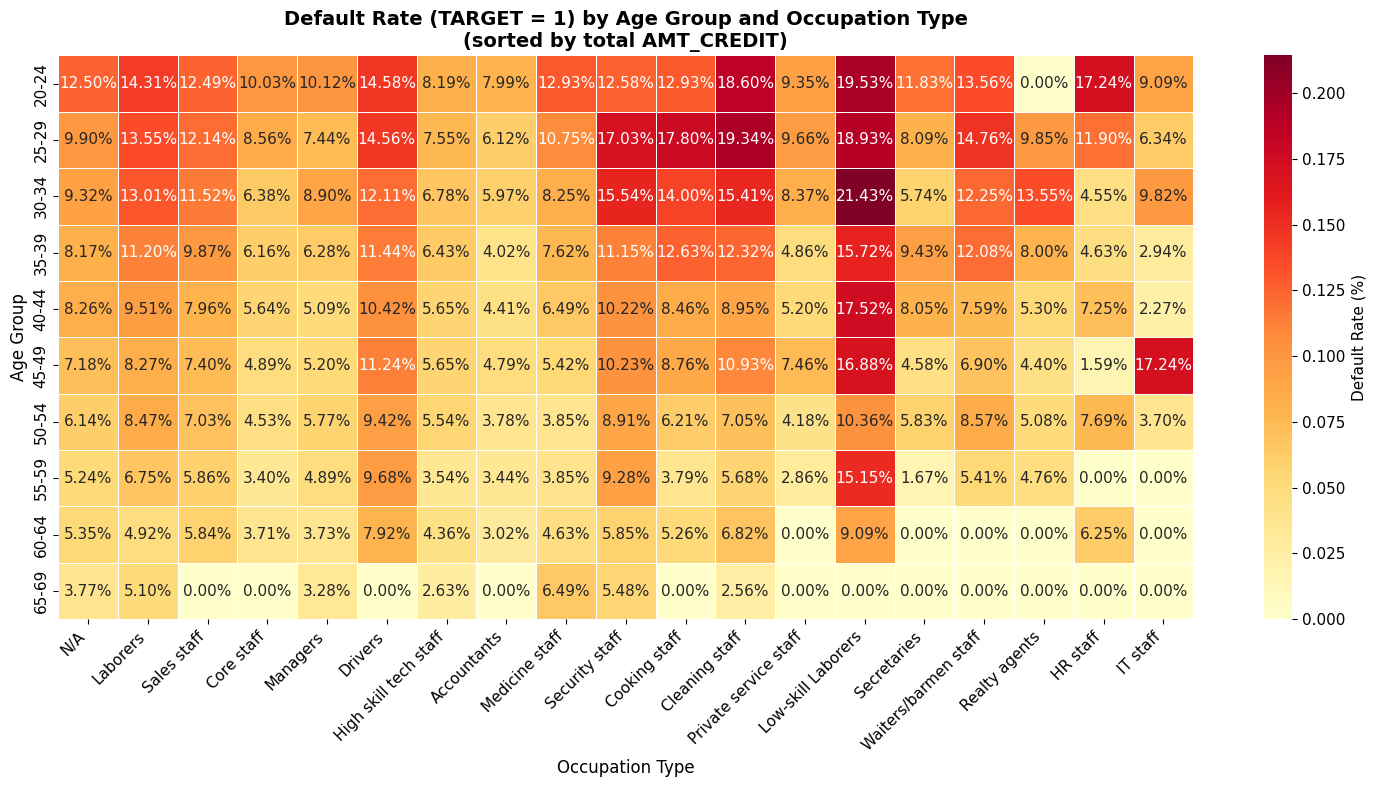

In [44]:
# @title
# ------------------------------------------------------
# Heatmap: Default Rate (TARGET = 1)
# by Age Group and Occupation Type
# ------------------------------------------------------

# Ensure feature-engineered columns exist
df_fe = add_engineered_columns(df)

# Pivot table: mean default rate by AGE_GROUP and OCCUPATION_TYPE
pivot_target = df_fe.pivot_table(
    index="AGE_GROUP",
    columns="OCCUPATION_TYPE",
    values="TARGET",
    aggfunc="mean"
)

# Sort columns by total AMT_CREDIT descending
pivot_credit = df_fe.pivot_table(
    index="AGE_GROUP",
    columns="OCCUPATION_TYPE",
    values="AMT_CREDIT",
    aggfunc="sum"
)
sorted_cols = pivot_credit.sum().sort_values(ascending=False).index
pivot_target_sorted = pivot_target[sorted_cols]

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    pivot_target_sorted,
    annot=True,
    fmt=".2%",
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Default Rate (%)"}
)

plt.title("Default Rate (TARGET = 1) by Age Group and Occupation Type\n(sorted by total AMT_CREDIT)", fontsize=14, fontweight="bold")
plt.xlabel("Occupation Type", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

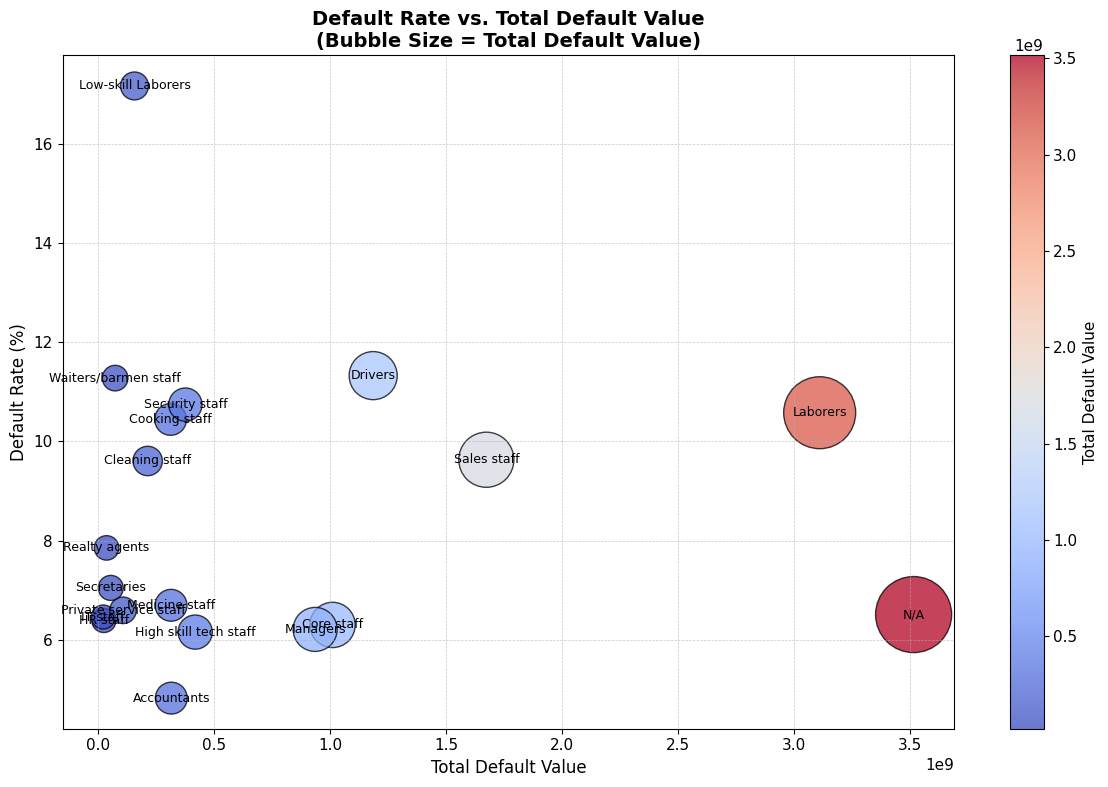

In [45]:
# @title
# ------------------------------------------------------
# Compute occupation-level statistics with default value
# ------------------------------------------------------
df["DEFAULT_VALUE"] = df["TARGET"] * df["AMT_CREDIT"]

occupation_stats = df.groupby("OCCUPATION_TYPE").agg({
    "TARGET": "mean",
    "AMT_INCOME_TOTAL": "mean",
    "DEFAULT_VALUE": "sum"
})
occupation_stats["RiskPercent"] = occupation_stats["TARGET"] * 100

# Normalize total default value to scale the bubble sizes
min_size = 300
max_size = 3000
credit_norm = (occupation_stats["DEFAULT_VALUE"] - occupation_stats["DEFAULT_VALUE"].min()) / (
    occupation_stats["DEFAULT_VALUE"].max() - occupation_stats["DEFAULT_VALUE"].min()
)
sizes = credit_norm * (max_size - min_size) + min_size

# ------------------------------------------------------
# Scatter plot: Default Rate vs. Total Default Value by Occupation
# ------------------------------------------------------
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    occupation_stats["DEFAULT_VALUE"],
    occupation_stats["RiskPercent"],
    s=sizes,
    c=occupation_stats["DEFAULT_VALUE"],
    cmap="coolwarm",
    alpha=0.75,
    edgecolors="black"
)

# Annotate each point with the occupation label
for idx, row in occupation_stats.iterrows():
    plt.text(
        row["DEFAULT_VALUE"],
        row["RiskPercent"],
        idx,
        fontsize=9,
        ha="center",
        va="center"
    )

plt.xlabel("Total Default Value", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.title("Default Rate vs. Total Default Value\n(Bubble Size = Total Default Value)", fontsize=14, fontweight="bold")
plt.colorbar(scatter, label="Total Default Value")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


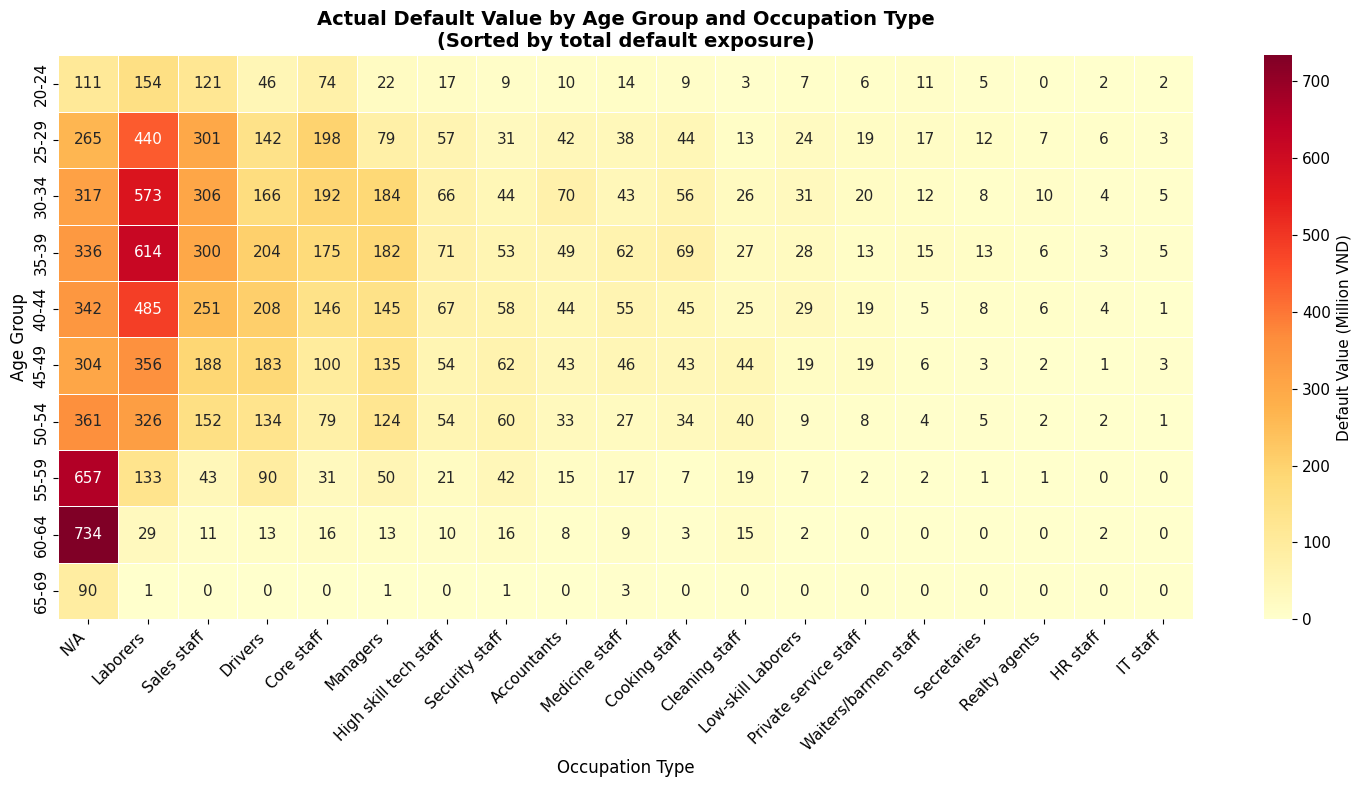

In [46]:
# @title
# ------------------------------------------------------
# Heatmap: Actual Default Value (Sum of AMT_CREDIT where TARGET = 1)
# by Age Group and Occupation Type
# ------------------------------------------------------

# Create pivot table for actual default value
pivot_actual_default = df_fe[df_fe["TARGET"] == 1].pivot_table(
    index="AGE_GROUP",
    columns="OCCUPATION_TYPE",
    values="AMT_CREDIT",
    aggfunc="sum"
)

# Fill NaN with 0 and sort columns by total default value descending
pivot_actual_default = pivot_actual_default.fillna(0)
sorted_cols = pivot_actual_default.sum().sort_values(ascending=False).index
pivot_actual_sorted = pivot_actual_default[sorted_cols]

# Format to millions for easier readability
pivot_display = (pivot_actual_sorted / 1e6).round(0).astype(int)

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    pivot_display,
    annot=True,
    fmt="g",
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Default Value (Million VND)"}
)

plt.title("Actual Default Value by Age Group and Occupation Type\n(Sorted by total default exposure)", fontsize=14, fontweight="bold")
plt.xlabel("Occupation Type", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


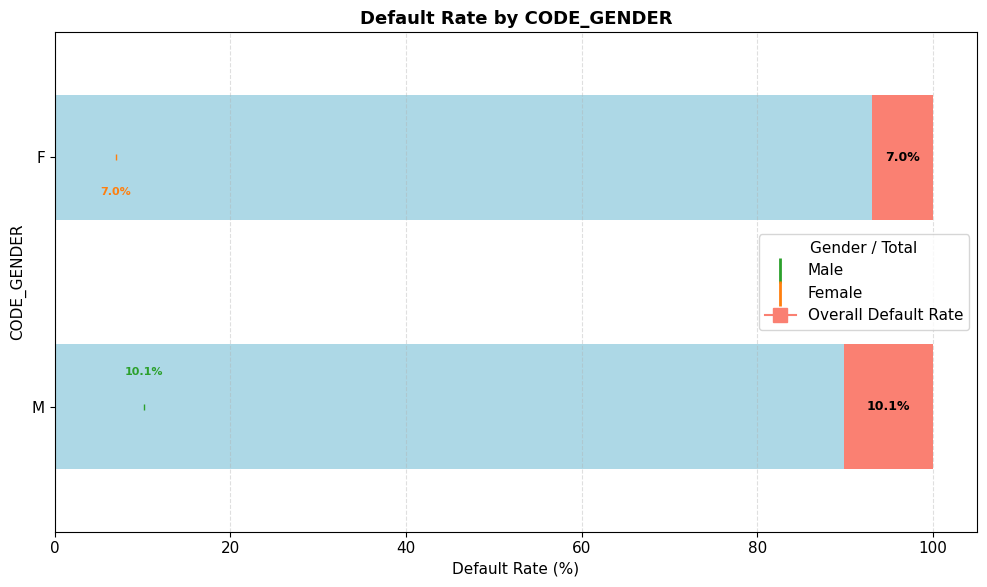

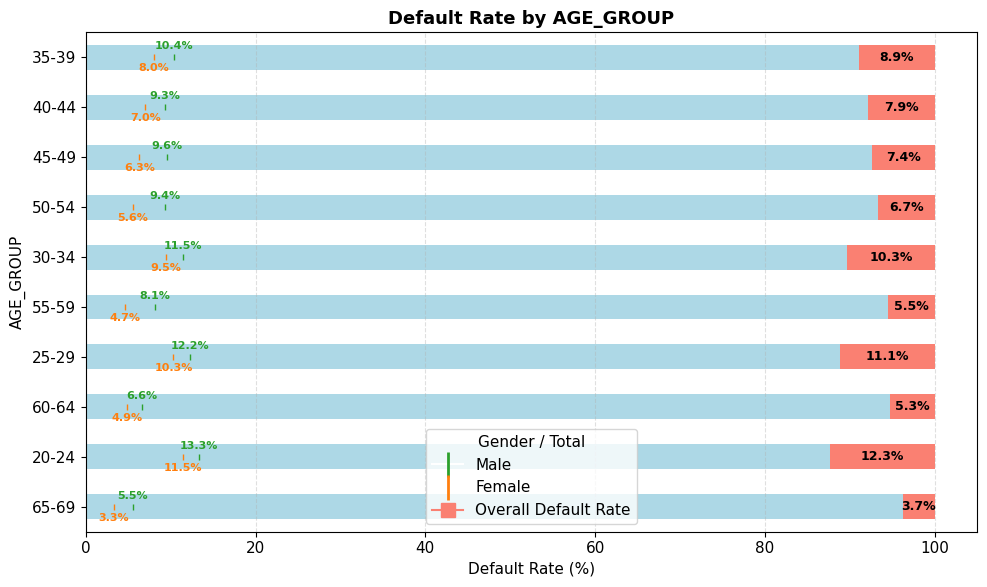

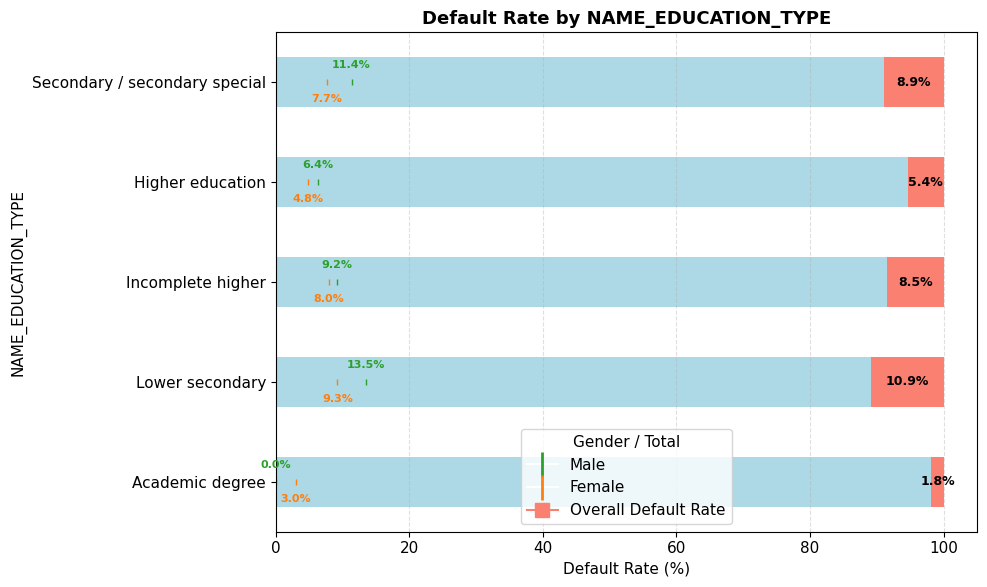

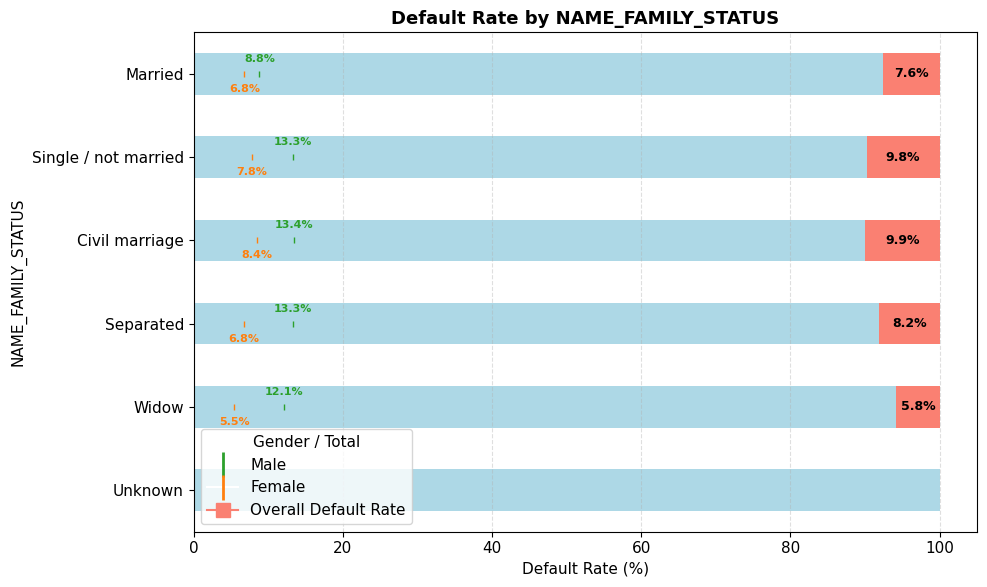

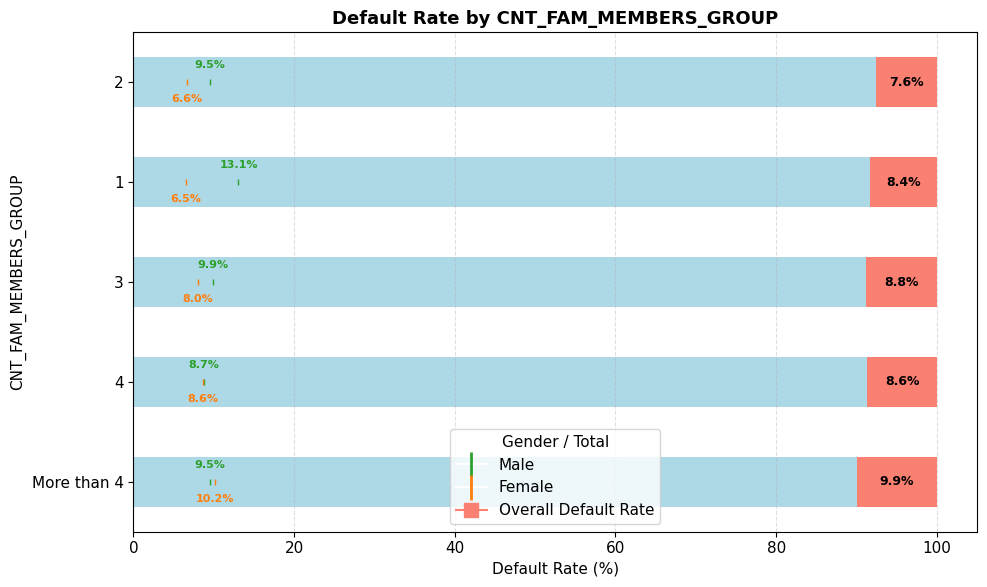

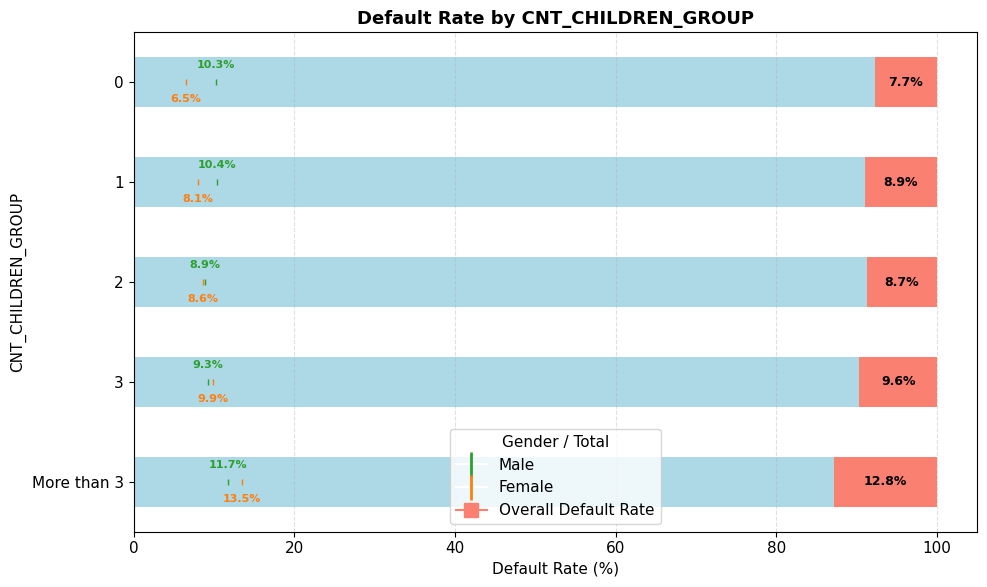

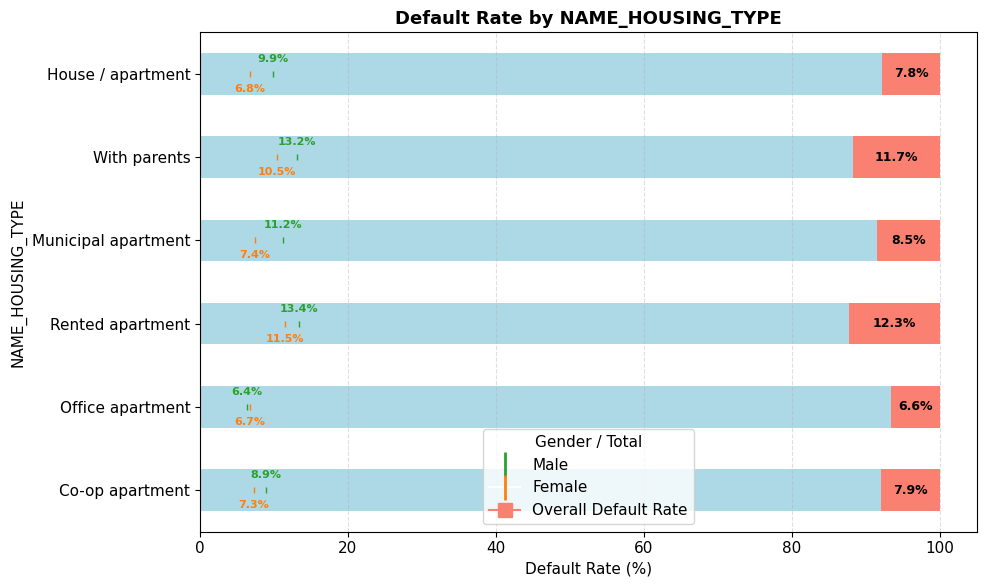

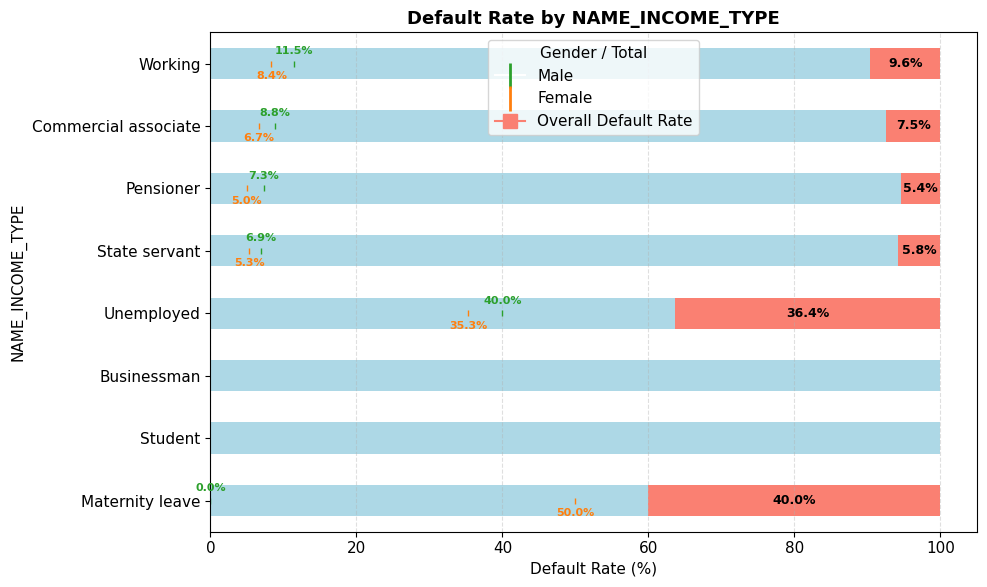

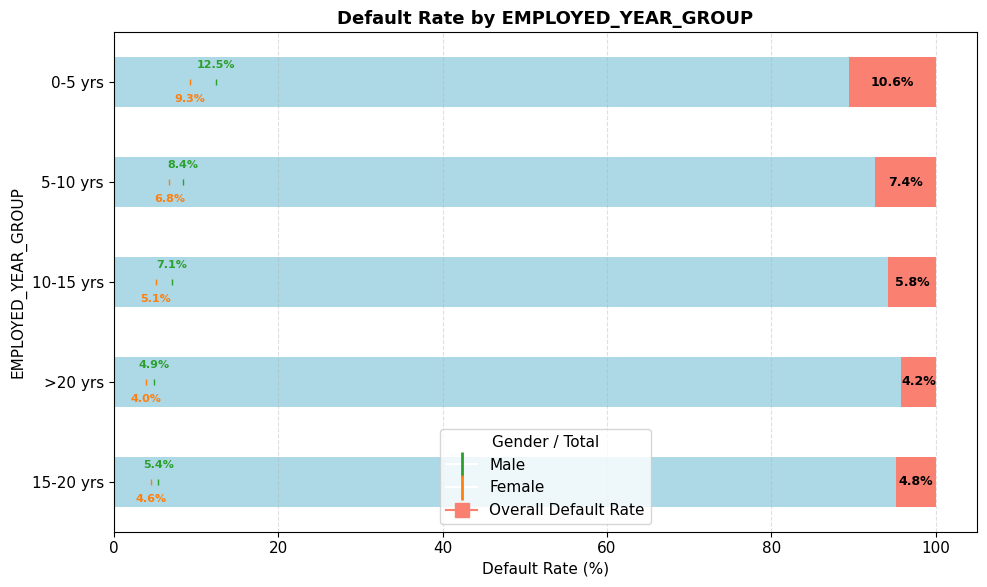

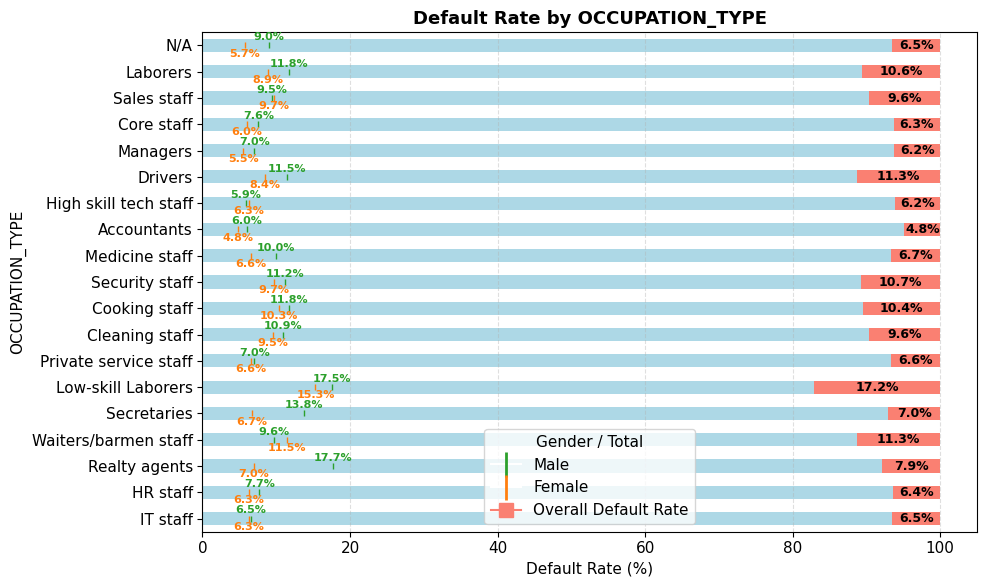

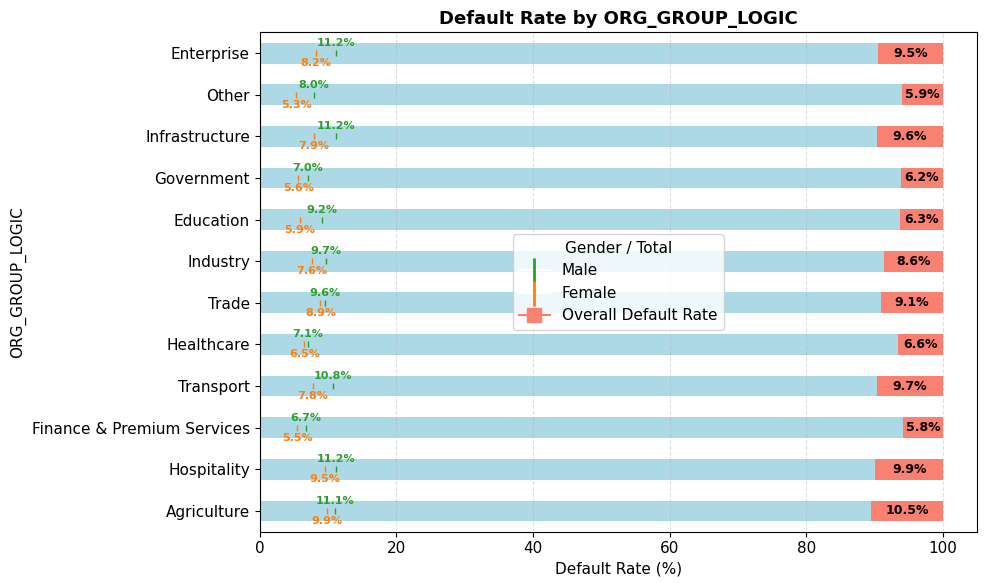

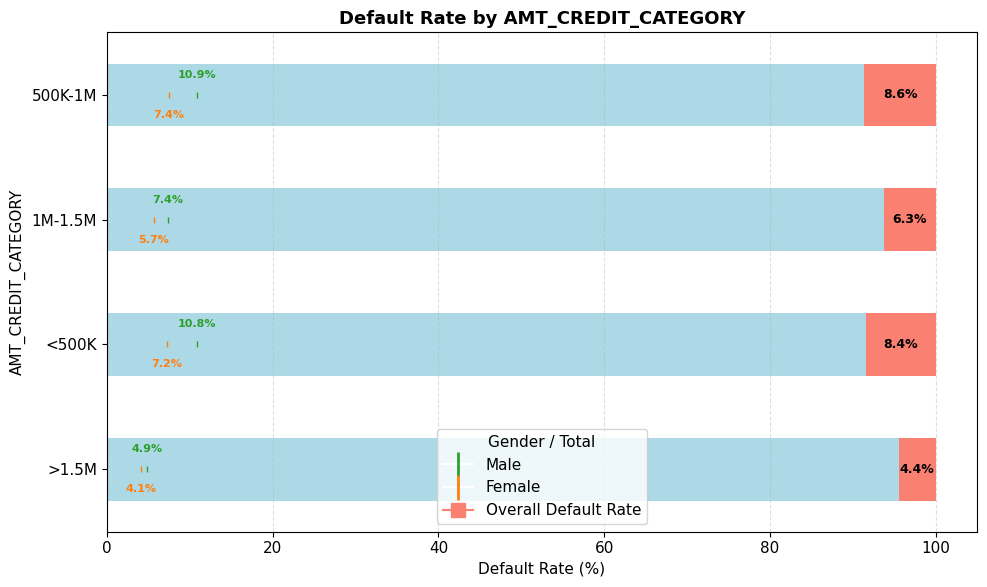

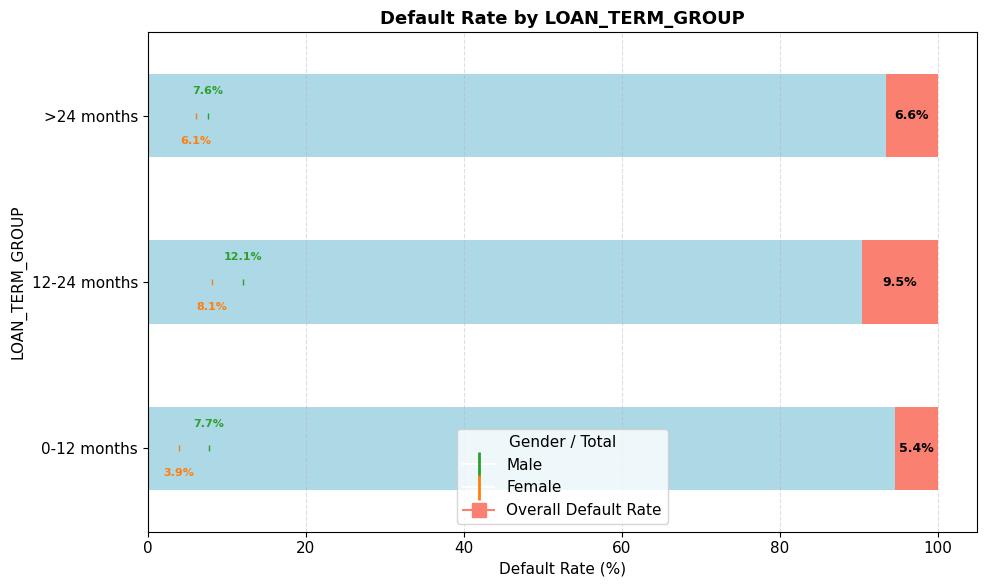

In [47]:
# @title
# ------------------------------------------------------
# Apply feature engineering
# ------------------------------------------------------
df_fe = add_engineered_columns(df)

# ------------------------------------------------------
# Plot: Stacked bar with gender points per feature
# ------------------------------------------------------
def plot_default_rate_by_category(df, feature):

    grouped = df.groupby([feature, "TARGET"]).size().unstack(fill_value=0)
    percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

    sorted_index = df.groupby(feature)["AMT_CREDIT"].sum().sort_values().index
    percent = percent.loc[sorted_index]

    ax = percent.plot(
        kind="barh",
        stacked=True,
        figsize=(10, 6),
        color=["lightblue", "salmon"],
        legend=False
    )


    for i, (_, row) in enumerate(percent.iterrows()):
        val = row.get(1, 0)
        if val > 0:
            ax.text(100 - val / 2, i, f"{val:.1f}%", ha="center", va="center",
                    fontsize=9, fontweight="bold", color="black")

    gender_default = (
        df[df["TARGET"] == 1]
        .groupby([feature, "CODE_GENDER"])
        .size()
        .unstack(fill_value=0)
    )
    gender_total = (
        df.groupby([feature, "CODE_GENDER"])
        .size()
        .unstack(fill_value=0)
    )
    gender_percent = gender_default.div(gender_total) * 100

    gender_cfg = {
        "M": {"color": "#2ca02c", "dy":  0.12, "va": "bottom"},
        "F": {"color": "#ff7f0e", "dy": -0.12, "va": "top"},
    }

    for i, cat in enumerate(sorted_index):
        for g, cfg in gender_cfg.items():
            if cat in gender_percent.index and g in gender_percent.columns:
                p = gender_percent.loc[cat, g]
                if pd.notna(p):
                    # Vẽ ký hiệu |
                    ax.plot(p, i, marker="|", color=cfg["color"],
                            markersize=5, markeredgewidth=1)
                    ax.text(p, i + cfg["dy"], f"{p:.1f}%", ha="center",
                            va=cfg["va"], fontsize=8, fontweight="bold", color=cfg["color"])

    handles = [
        plt.Line2D([0], [0], marker="|", color="w", label="Male",
                   markeredgecolor="#2ca02c", markersize=18, markeredgewidth=2),
        plt.Line2D([0], [0], marker="|", color="w", label="Female",
                   markeredgecolor="#ff7f0e", markersize=18, markeredgewidth=2),
        plt.Line2D([0], [0], marker="s", color="salmon", label="Overall Default Rate",
                   markersize=10)
    ]
    ax.legend(handles=handles, title="Gender / Total", loc="best")

    ax.set_xlabel("Default Rate (%)")
    ax.set_title(f"Default Rate by {feature}", fontsize=13, fontweight="bold")
    ax.grid(axis="x", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()
# ------------------------------------------------------
# Feature list for value analysis (controls plotting order)
# ------------------------------------------------------
value_features = [
    # Demographics
    "CODE_GENDER", "AGE_GROUP", "NAME_EDUCATION_TYPE",
    # Family / housing
    "NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS_GROUP",
    "CNT_CHILDREN_GROUP", "NAME_HOUSING_TYPE",
    # Occupation / income
    "NAME_INCOME_TYPE", "EMPLOYED_YEAR_GROUP",
    "OCCUPATION_TYPE", "ORG_GROUP_LOGIC",
    # Credit specifics
    "AMT_CREDIT_CATEGORY", "LOAN_TERM_GROUP"
]

# ------------------------------------------------------
# Plot all in specified order
# ------------------------------------------------------
for feature in value_features:
    plot_default_rate_by_category(df_fe, feature)


## 🫖One more things

In [48]:
# @title
# ------------------------------------------------------
# Crosstab: Occupation Type vs. Organization Group
# Sorted by Default Risk (rows) and Total Credit (columns)
# ------------------------------------------------------

# Ensure engineered columns are available
df_fe = add_engineered_columns(df)

# Total AMT_CREDIT per organization group (for column sorting)
total_credit = df_fe.groupby("ORG_GROUP_LOGIC")["AMT_CREDIT"].sum()
sorted_columns = total_credit.sort_values(ascending=False).index

# Average default rate per occupation (for row sorting)
risk_by_occupation = df_fe.groupby("OCCUPATION_TYPE")["TARGET"].mean()
sorted_rows = risk_by_occupation.sort_values(ascending=False).index

# Crosstab: count of occupation × organization group
occupation_count = pd.crosstab(
    df_fe["OCCUPATION_TYPE"],
    df_fe["ORG_GROUP_LOGIC"]
)

# Reorder rows and columns
occupation_count = occupation_count.loc[sorted_rows, sorted_columns]

# Display with gradient styling
styled_table = occupation_count.style \
    .background_gradient(cmap="YlOrRd") \
    .format("{:,}") \
    .set_caption("Count of Contracts by Occupation Type and Organization Group\n(Sorted by Default Risk and Total Credit Volume)")

styled_table


In [49]:
# @title
# ------------------------------------------------------
# Occupation Distribution (%) by Organization Group
# Sorted by Default Risk and Total Credit Volume
# ------------------------------------------------------

# Ensure feature-engineered columns are present
df_fe = add_engineered_columns(df)

# Total AMT_CREDIT per organization group → sort columns
total_credit = df_fe.groupby("ORG_GROUP_LOGIC")["AMT_CREDIT"].sum()
sorted_columns = total_credit.sort_values(ascending=False).index

# Average default rate per occupation → sort rows
risk_by_occupation = df_fe.groupby("OCCUPATION_TYPE")["TARGET"].mean()
sorted_rows = risk_by_occupation.sort_values(ascending=False).index

# Compute percentage distribution of occupations within each organization group
occupation_percent = pd.crosstab(
    df_fe["OCCUPATION_TYPE"],
    df_fe["ORG_GROUP_LOGIC"],
    normalize="columns"
) * 100

# Reorder rows and columns
occupation_percent = occupation_percent.loc[sorted_rows, sorted_columns]

# Display styled table
styled_table = occupation_percent.style \
    .format("{:.1f}") \
    .background_gradient(cmap="YlOrRd") \
    .set_caption("Occupation Share (%) by Organization Group\n(Sorted by Credit Volume and Default Risk)")

styled_table


In [50]:
# @title
# ------------------------------------------------------
# Default Rate (%) by Occupation and Organization Group
# Sorted by Credit Volume and Overall Risk
# ------------------------------------------------------

# Ensure feature-engineered columns exist
df_fe = add_engineered_columns(df)

# Total AMT_CREDIT per organization group → for column sorting
total_credit = df_fe.groupby("ORG_GROUP_LOGIC")["AMT_CREDIT"].sum()
sorted_columns = total_credit.sort_values(ascending=False).index

# Pivot table: default rate (%) by OCCUPATION_TYPE × ORG_GROUP_LOGIC
risk_table = pd.pivot_table(
    df_fe,
    index="OCCUPATION_TYPE",
    columns="ORG_GROUP_LOGIC",
    values="TARGET",
    aggfunc="mean"
) * 100

# Round values and reorder columns
risk_table = risk_table[sorted_columns].round(1)

# Sort rows by overall average TARGET (risk)
overall_risk = df_fe.groupby("OCCUPATION_TYPE")["TARGET"].mean()
sorted_rows = overall_risk.sort_values(ascending=False).index
risk_table = risk_table.loc[sorted_rows]

# Display formatted table with background gradient
styled_table = risk_table.style \
    .format("{:.1f}") \
    .background_gradient(cmap="YlOrRd") \
    .set_caption("Default Rate (%) by Occupation and Organization Group\n(Sorted by Credit Volume and Overall Risk)")

styled_table
